Pour se connecter à ce notebook 
Besoin de lancer  l'image singularity de : _Containers/shortcakelight.sif

https://github.com/rnakato/ShortCake/tree/master
Est conçu spécifiquement pour les analyses de données single cell

Pour lancer l'image singularity et pouvoir se connecter aux notebooks jupyter:
srun --pty bash
singularity exec 6_Containers/shortcakelight.sif jupyternotebook.sh

puis faire le lien ssh sur l'ordi avec cette commande  que l'on ecrit dans le terminal local: 
ssh -A -t -t vgoupille@genossh.genouest.org -L 8888:localhost:8888 ssh cl1n030 -L 8888:localhost:8888
modifier le port (numero et noeud si besoin)

si probleme de connection 

ls -a
rm -r .vscode-server
puis se remet sur vscode 
et refait la liaison avec ssh remote (et reinstaller les extensions...)

Library strategy: microSPLiT
The data preprocessing and alignment was performed using a modified SPLiT-seq pipeline (https://github.com/Alex-Rosenberg/split-seq-pipeline). Modifications: using STAR with the splicing isoform detection swiwwe usededt the hioutghoutest-scored multimapping re. We also keptwening a ctional count based on the number igninggood alignments, since bacterial genomes are known to contain overlapping CDSs.
Genome_build: ASM904v1.45 and ASM80076v1.37 from EnsemblBacteria
Supplementary_files_format_and_content: Cell by gene matrix (with cells above threshold 200 UMI/cell); Gene names; Cell annotations (barcode and well for heat shock data, OD for B.subtilis growth curve). For B. Subtilis growth curve, only mRNA are included in the cell-by-gene matrix.
Supplementary_files_format_and_content: For the heat-shock data, barcodes in wells 1-24 belong to heat-shocked cells and in wells 25-48 belong to control cells.
 	

Ce texte décrit les stratégies et les méthodes utilisées pour traiter et aligner les données issues de l’expérience scRNA-seq réalisée avec la méthode microSPLiT.
	1.	Stratégie de séquençage (Library strategy) :
	•	La méthode utilisée est microSPLiT, qui est une adaptation de la technique SPLiT-seq, permettant de réaliser du scRNA-seq sans nécessiter d’isolation physique des cellules.
	2.	Prétraitement et alignement des données :
	•	L’alignement des séquences a été effectué avec une version modifiée du pipeline SPLiT-seq disponible sur GitHub (https://github.com/Alex-Rosenberg/split-seq-pipeline).
	•	Modifications apportées :
	•	Utilisation de STAR (un logiciel d’alignement des lectures RNA-seq) avec une détection des isoformes d’épissage.
	•	Sélection des meilleurs alignements multimapping selon un critère de score élevé.
	•	Conservation d’un compte fonctionnel basé sur le nombre d’alignements de bonne qualité, ce qui est pertinent pour les génomes bactériens où plusieurs CDSs (séquences codantes) peuvent se chevaucher.
	3.	Références génomiques utilisées :
	•	Les génomes de référence utilisés pour l’alignement sont :
	•	ASM904v1.45
	•	ASM80076v1.37
	•	Ces versions proviennent de la base de données EnsemblBacteria.
	4.	Fichiers supplémentaires et leur contenu :
	•	Les fichiers supplémentaires fournis incluent :
	•	Matrice cellule-gène (contenant uniquement les cellules ayant un minimum de 200 UMI/cellule).
	•	Noms des gènes.
	•	Annotations des cellules :
	•	Pour les données du stress thermique (heat-shock) : les cellules sont annotées par code-barres et puits.
	•	Pour la courbe de croissance de Bacillus subtilis : les cellules sont annotées selon leur densité optique (OD). Seuls les ARNm (mRNA) sont inclus dans la matrice cellule-gène.
	5.	Organisation des cellules dans l’expérience de stress thermique :
	•	Les cellules sont disposées dans 48 puits, avec une distinction entre conditions :
	•	Puits 1-24 : cellules soumises au stress thermique.
	•	Puits 25-48 : cellules témoins (non soumises au stress thermique).

replica 2 : M14 => B. subtilis PY79 (OD0.5-OD3.2)

replica 1 : M15 => B. subtilis PY79 (OD0.5-OD6.0)

other plate : M11 =>	B. subtilis PY79 + E. coli MW1255

# Telechargement des données preocessées  de l'article de Kuchina et al: 
Microbial single-cell RNA sequencing by split-pool barcoding
https://doi.org/10.1126/science.aba5257

protocole 2024: 
https://doi.org/10.1038/s41596-024-01007-w

les données de séquençage brute sont disponible sur SRA : 
The raw sequencing files are available at the Sequence Read Archive:
    - GSM4594094 : https://www.ncbi.nlm.nih.gov/sra/SRX8485151%5baccn%5d
    - GSM4594095 : https://www.ncbi.nlm.nih.gov/sra/SRX8485152%5baccn%5d
    - GSM4594096 : https://www.ncbi.nlm.nih.gov/sra/SRX8485153%5baccn%5d

Processed data were submitted to Gene Expression Omnibus, with accession number GSE151940.

#Les données processées sont disponibles sur le site de GEO:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE151940


SUPPLEMENTARY MATERIALS 
https://www.science.org/doi/10.1126/science.aba5257


NOUS N'ALLONS PAS UTILISER C'EST DONNEES QUI NE SONT PAS OBTENUE AVEC STARsolo 



Un autre article a analysé les données de scRNA-seq de la même expérience.
"Single-cell heterogeneity in ribosome content and the  consequences for the growth laws" par Brettner et al. (2024).

https://pmc.ncbi.nlm.nih.gov/articles/PMC11185559/

Récuperation des données et divers script sur la page :
    https://osf.io/kjfbz/
    
    - donnée Raw Data : obtenue avec STARsolo
    GEO060 => M14
    GEO061 => M15
    


# import the R script with other functions

source("7_Article/script/utile_bact/convert_gene_names.R")


source("7_Article/script/utile_bact/assign_cell_wells.R")


source("7_Article/script/utile_bact/randomhex_polyT_condense.R")



In [38]:
getwd()

[1] "/home/genouest/cnrs_umr6553/vgoupille/DOL_scRNAseq"

In [39]:
# Chargement des librairies

library(reticulate)
library(dplyr)
library(cowplot)
library(Seurat) ##Note this code was written for a previous version of Seurat (4.1.1)
library(ggplot2)
library(Matrix)
library(forcats)
library(RColorBrewer)

library(dplyr)

# library(akmedoids) # on ne peut pas charger le pac-kages ici car il n'est pas installé sur le serveur et aussi n'est plus compatible avec la version de R





Plusieurs fonctions utiles pour les analyses de single cell RNA-seq 

In [40]:


# Ce code R définit une fonction nommée `assign_cell_wells` qui associe des codes-barres (barcodes) à des positions spécifiques dans une plaque de laboratoire (puits ou "wells").

# Voici ce que fait cette fonction :

# 1. Elle prend en entrée un vecteur de codes-barres (`barcodes`)
# 2. Elle initialise un dataframe vide `cell_wells` avec deux colonnes (barcode et well)
# 3. Pour chaque code-barre dans le vecteur d'entrée :
#    - Elle extrait la dernière partie du code-barre en le divisant par le caractère "_"
#    - Elle vérifie cette séquence (BC1) par rapport à une longue liste de séquences connues
#    - Selon la séquence identifiée, elle attribue le code-barre à un puits spécifique (A1, A2, B1, etc.)
#    - Si aucune correspondance n'est trouvée, elle attribue "unknown" au puits
#    - Elle affiche le numéro d'itération (i) pour suivre la progression
# 4. À la fin, elle renvoie le dataframe complet avec les associations code-barre/puits

# Cette fonction est typiquement utilisée dans des analyses de séquençage à haut débit où les échantillons sont identifiés par des codes-barres et disposés dans une plaque de 96 puits (format 8×12, d'où les désignations A1-H12).




assign_cell_wells <- function(barcodes){

  cell_wells <- data.frame(barcode <- c(), well <- c())
  
  for (i in 1:length(barcodes)){
    
    BC1 <- last(unlist(strsplit(barcodes[i], "_")))
    
    if (BC1 == 'ACTCGTAA' | BC1 == 'CTGCTTTG'){
      temp <- data.frame(barcode = barcodes[i], well = "A1")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AAACGATA' | BC1 == 'CATGATCA'){
      temp <- data.frame(barcode = barcodes[i], well = "A2")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTACCTCG' | BC1 == 'GGGTAGCG'){
      temp <- data.frame(barcode = barcodes[i], well = "A3")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GCCTGCAA' | BC1 == 'CCGAGAAA'){
      temp <- data.frame(barcode = barcodes[i], well = "A4")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TGGTATAC' | BC1 == 'ACGGACTC'){
      temp <- data.frame(barcode = barcodes[i], well = "A5")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGTTCGAG' | BC1 == 'ACTTACGA'){
      temp <- data.frame(barcode = barcodes[i], well = "A6")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TCTATTAC' | BC1 == 'TATTTAAG'){
      temp <- data.frame(barcode = barcodes[i], well = "A7")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ATAAGCTC' | BC1 == 'ACCGTACG'){
      temp <- data.frame(barcode = barcodes[i], well = "A8")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ATTCATGG' | BC1 == 'TATAGTCG'){
      temp <- data.frame(barcode = barcodes[i], well = "A9")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ATCCGCGA' | BC1 == 'TGGGCATC'){
      temp <- data.frame(barcode = barcodes[i], well = "A10")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ATCGCATA' | BC1 == 'TACCTAGA'){
      temp <- data.frame(barcode = barcodes[i], well = "A11")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CCGTTCTA' | BC1 == 'GCTGCATG'){
      temp <- data.frame(barcode = barcodes[i], well = "A12")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TGGCGCGC' | BC1 == 'GTCATATG'){
      temp <- data.frame(barcode = barcodes[i], well = "B1")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TGTCTGAA' | BC1 == 'ATATTGGC'){
      temp <- data.frame(barcode = barcodes[i], well = "B2")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CTGTCCCG' | BC1 == 'CTAAGGGA'){
      temp <- data.frame(barcode = barcodes[i], well = "B3")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AATTTCTC' | BC1 == 'TCGTTTCG'){
      temp <- data.frame(barcode = barcodes[i], well = "B4")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGCGACTA' | BC1 == 'GAATAATG'){
      temp <- data.frame(barcode = barcodes[i], well = "B5")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GGGATCGG' | BC1 == 'ACTGCGCA'){
      temp <- data.frame(barcode = barcodes[i], well = "B6")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTATTCTG' | BC1 == 'GCTTATAG'){
      temp <- data.frame(barcode = barcodes[i], well = "B7")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AGGCGGCA' | BC1 == 'ATCATGCA'){
      temp <- data.frame(barcode = barcodes[i], well = "B8")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ACGCCGGC' | BC1 == 'ACGTTAAC'){
      temp <- data.frame(barcode = barcodes[i], well = "B9")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTGTCTTA' | BC1 == 'CCATCTTG'){
      temp <- data.frame(barcode = barcodes[i], well = "B10")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TACGGTTA' | BC1 == 'CATAGCTA'){
      temp <- data.frame(barcode = barcodes[i], well = "B11")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTGGGAGA' | BC1 == 'GAGGTTGA'){
      temp <- data.frame(barcode = barcodes[i], well = "B12")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TGCTTGGG' | BC1 == 'GCACTGAC'){
      temp <- data.frame(barcode = barcodes[i], well = "C1")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TAAATATC' | BC1 == 'TTCATCGC'){
      temp <- data.frame(barcode = barcodes[i], well = "C2")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CACAATTG' | BC1 == 'GAAATTAG'){
      temp <- data.frame(barcode = barcodes[i], well = "C3")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GTGCTAGC' | BC1 == 'AGGATTAA'){
      temp <- data.frame(barcode = barcodes[i], well = "C4")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGCCCGGA' | BC1 == 'AATAGAAC'){
      temp <- data.frame(barcode = barcodes[i], well = "C5")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GCTCGCGG' | BC1 == 'TCTTAATC'){
      temp <- data.frame(barcode = barcodes[i], well = "C6")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CTTTGGTC' | BC1 == 'TAATACGC'){
      temp <- data.frame(barcode = barcodes[i], well = "C7")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTCCGATC' | BC1 == 'GTTTGTGA'){
      temp <- data.frame(barcode = barcodes[i], well = "C8")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTCGCTAC' | BC1 == 'CGAACGTC'){
      temp <- data.frame(barcode = barcodes[i], well = "C9")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AGCGAAAC' | BC1 == 'GGTTCTTC'){
      temp <- data.frame(barcode = barcodes[i], well = "C10")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AAATAGCA' | BC1 == 'GCAAATTC'){
      temp <- data.frame(barcode = barcodes[i], well = "C11")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGTCTAGG' | BC1 == 'GCTATGCG'){
      temp <- data.frame(barcode = barcodes[i], well = "C12")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GCCGTGTA' | BC1 == 'CTACCCTA'){
      temp <- data.frame(barcode = barcodes[i], well = "D1")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGCTTAAA' | BC1 == 'GTGGGTTC'){
      temp <- data.frame(barcode = barcodes[i], well = "D2")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GACCTTTC' | BC1 == 'GTCCGTAG'){
      temp <- data.frame(barcode = barcodes[i], well = "D3")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GGTGGAGC' | BC1 == 'TGCGATCG'){
      temp <- data.frame(barcode = barcodes[i], well = "D4")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TACTCGAA' | BC1 == 'TATCCGGG'){
      temp <- data.frame(barcode = barcodes[i], well = "D5")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CATTTGGA' | BC1 == 'AGGTAATA'){
      temp <- data.frame(barcode = barcodes[i], well = "D6")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GACGGGAC' | BC1 == 'CGTGGTTG'){
      temp <- data.frame(barcode = barcodes[i], well = "D7")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GTCGCGCG' | BC1 == 'GACAAAGC'){
      temp <- data.frame(barcode = barcodes[i], well = "D8")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GTTACGTA' | BC1 == 'GGGCGATG'){
      temp <- data.frame(barcode = barcodes[i], well = "D9")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CTATTTCA' | BC1 == 'ATCTATAA'){
      temp <- data.frame(barcode = barcodes[i], well = "D10")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ACTATATA' | BC1 == 'GCCCATGA'){
      temp <- data.frame(barcode = barcodes[i], well = "D11")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TCACTTTA' | BC1 == 'CTGAAAGG'){
      temp <- data.frame(barcode = barcodes[i], well = "D12")
      cell_wells <- rbind(cell_wells, temp)
    } else {
      temp <- data.frame(barcode = barcodes[i], well = "unknown")
      cell_wells <- rbind(cell_wells, temp) 
    }
    #print(i)
  }

  return(cell_wells)
}

In [41]:

# Ce code convertit les noms de gènes bactériens en utilisant une table de conversion stockée dans un fichier CSV. 

convert_gene_names_bacteria <- function(genes){
  
  conversion_table <- read.csv('7_Article/script/utile_bact/bacteria_gene_conversion.csv')
  new.features <- c()
  
  for (i in 1:length(genes)){
    
    if (genes[i] %in% conversion_table$genecode){
    
        genename <- conversion_table$genename[which(conversion_table$genecode == genes[i])]
        
    } else {
      
        genename <- genes[i]
        
    }
    
    new.features <- c(new.features, genename)
  }
  
  return(new.features)
  
}

In [42]:
round_one_bc_collapse <- function(data, threshold){
  
  r6pt <- read.csv('7_Article/script/utile_bact/r6ptorderedbcs.csv')
  r6pt <- r6pt$x
  
  temp <- data[,r6pt]
 
  temp <- temp[,which(c(1:length(r6pt))%%2==1)] + temp[,which(c(1:length(r6pt))%%2==0)]
 
 colnames(temp) <- r6pt[which(c(1:length(r6pt))%%2==1)]
 rownames(temp) <- rownames(data)
 
 temp <- temp[,which(colSums(temp) > 0)]
 
 y = as.numeric(log(colSums(temp)[order(colSums(temp), decreasing = TRUE)]))
 x = log(c(1:length(y)))
 plot(x,y)

 slope = as.numeric((y[length(y)]-y[1])/(x[length(x)]-x[1]))
 yline = slope*x + y[1]
 lines(x,yline, col = 2)

 d = sqrt((y-yline)^2)
 plot(x,d)
 d2 = d[which(d >= d[which.max(d)]*threshold)]
 x2 = x[which(d >= d[which.max(d)]*threshold)]
 points(x2,d2, col = 3)
 
 temp <- temp[,which(colSums(temp) >= exp(y[which(x == x2[which.max(x2)])]))]
 #dim(temp)
 
 return(temp)
}



# Cette fonction traite des données de séquençage à haut débit, en particulier pour consolider et filtrer les codes-barres selon leur abondance. Voici son fonctionnement étape par étape:

# 1. **Chargement des codes-barres organisés**: La fonction commence par charger un fichier CSV prédéfini qui contient une liste ordonnée de codes-barres (au format BC3_BC2_BC1).

# 2. **Réorganisation des données**: Elle sélectionne les colonnes de l'ensemble de données d'entrée qui correspondent aux codes-barres du fichier CSV.

# 3. **Consolidation des paires**: La fonction additionne les données des colonnes paires et impaires. Ceci combine les lectures provenant de paires de codes-barres qui correspondent au même puits physique (comme visible dans votre premier script où chaque puits a deux codes-barres alternatifs).

# 4. **Nettoyage des données**:
#    - Elle renomme les colonnes pour n'utiliser que les codes-barres impairs
#    - Elle préserve les noms des lignes du jeu de données original
#    - Elle supprime les colonnes dont la somme est zéro (codes-barres sans lectures)

# 5. **Analyse statistique pour déterminer un seuil de filtrage**:
#    - Elle calcule le logarithme de la somme des lectures pour chaque code-barre
#    - Elle trace un graphique log-log du rang des codes-barres vs leur abondance
#    - Elle calcule une ligne de tendance linéaire sur ce graphique
#    - Elle mesure la distance entre chaque point et cette ligne de tendance
#    - Elle identifie les points dont la distance dépasse un certain pourcentage (`threshold`) de la distance maximale

# 6. **Filtrage final**: La fonction ne conserve que les codes-barres dont le nombre de lectures dépasse le seuil déterminé statistiquement.

# 7. **Retour des résultats**: Elle renvoie le jeu de données filtré et consolidé.

# Cette approche utilise une méthode statistique appelée "knee point detection" (détection du point d'inflexion) pour déterminer automatiquement le seuil optimal de filtrage des codes-barres. Cela permet d'éliminer les codes-barres de faible qualité ou peu abondants tout en conservant ceux qui sont statistiquement significatifs, ce qui est crucial dans les analyses de séquençage à cellule unique.

# Le code commenté (plus long) semble être une version antérieure qui effectuait manuellement l'attribution des codes-barres aux puits, similaire à la fonction `assign_cell_wells` que vous avez partagée précédemment. La version actuelle simplifie ce processus en utilisant un fichier CSV préexistant.










In [43]:
find_neighbors_clusters <- function(integratedSO, dims, resolution){
  
  integrated <- FindNeighbors(integratedSO, dims = 1:dims)
  clustered <- FindClusters(integrated, resolution = resolution)
  clustered <- RunUMAP(clustered, dims = 1:dims)
  
  return(clustered)
}

In [44]:
differentially_expressed_genes <- function(clusteredSO) {
  
  markers <- FindAllMarkers(clusteredSO, only.pos = TRUE)
  
  for (j in 0:(length(levels(markers$cluster))-1))
  {
    cluster.genes <- markers[which(markers$cluster == j),]
    cluster.genes <- cluster.genes[which(cluster.genes$p_val_adj < 0.05),]
    print(head(cluster.genes[order(-cluster.genes$avg_log2FC),], n = 100))
  }
}

In [45]:

#Fonction pour associé les metadonnnées (ici la densité optique et le numéro des puits) puis les données de séquençage de B. subtilis

assign_metadata_bacteria_M15 <- function(raw.genefull) {
  print(sum(duplicated(rownames(raw.genefull@meta.data))))  # Vérifie les doublons avant fusion

  # Vérifier si l'objet `raw.genefull` est un SeuratObject
  if (!inherits(raw.genefull, "Seurat")) {
    stop("Erreur : L'objet fourni n'est pas un objet Seurat.")
  }

  # Vérifier la présence de la colonne "well" dans les métadonnées
  if (!"well" %in% colnames(raw.genefull@meta.data)) {
    raw.genefull@meta.data$well <- rownames(raw.genefull@meta.data)  # Utilise les noms des cellules
  }

  # Définition des conditions basées sur les puits (wells)
  conditions <- list(
    'OD0.5' = paste0('A', 1:6),
    'OD1.0' = paste0('A', 7:12),
    'OD1.3' = paste0('B', 1:6),
    'OD1.6' = paste0('B', 7:12),
    'OD2.8' = paste0('C', 1:6),
    'OD3.6' = paste0('C', 7:12),
    'OD5.3' = paste0('D', 1:6),
    'OD6.0' = paste0('D', 7:12)
  )

  # Assigner la condition à chaque cellule
  raw.genefull@meta.data <- raw.genefull@meta.data %>%
    mutate(cond = case_when(
      well %in% conditions$OD0.5 ~ "OD0.5",
      well %in% conditions$OD1.0 ~ "OD1.0",
      well %in% conditions$OD1.3 ~ "OD1.3",
      well %in% conditions$OD1.6 ~ "OD1.6",
      well %in% conditions$OD2.8 ~ "OD2.8",
      well %in% conditions$OD3.6 ~ "OD3.6",
      well %in% conditions$OD5.3 ~ "OD5.3",
      well %in% conditions$OD6.0 ~ "OD6.0",
      TRUE ~ NA_character_
    ))

  print(sum(duplicated(rownames(raw.genefull@meta.data))))  # Vérifie les doublons après fusion
  return(raw.genefull)
}

# # Application de la fonction sur GEO660
# print("Assigning metadata to cells M15: ")
# growcurvb.m15 <- assign_metadata_bacteria_M15(GEO660)

# # Vérifications
# head(growcurvb.m15@meta.data)
# dim(growcurvb.m15@meta.data)
# colnames(growcurvb.m15@meta.data)

In [46]:
assign_metadata_bacteria_M14 <- function(raw.genefull) {
  print(sum(duplicated(rownames(raw.genefull@meta.data))))  # Vérifie les doublons avant fusion

  # Vérification que `raw.genefull` est un objet Seurat
  if (!inherits(raw.genefull, "Seurat")) {
    stop("Erreur : L'objet fourni n'est pas un objet Seurat.")
  }

  # Vérification et ajout de la colonne `well` si absente
  if (!"well" %in% colnames(raw.genefull@meta.data)) {
    raw.genefull@meta.data$well <- rownames(raw.genefull@meta.data)
  }

  # Définition des conditions avec `paste0`
  conditions <- list(
    'OD0.5' = paste0('A', 1:8),
    'OD1.0' = c(paste0('A', 9:12), paste0('B', 1:4)),
    'OD1.7' = paste0('B', 5:12),
    'OD2.0' = paste0('C', 1:8),
    'OD2.8' = c(paste0('C', 9:12), paste0('D', 1:4)),
    'OD3.2' = paste0('D', 5:12)
  )

  # Assigner les conditions directement aux métadonnées
  raw.genefull@meta.data <- raw.genefull@meta.data %>%
    mutate(cond = case_when(
      well %in% conditions$OD0.5 ~ "OD0.5",
      well %in% conditions$OD1.0 ~ "OD1.0",
      well %in% conditions$OD1.7 ~ "OD1.7",
      well %in% conditions$OD2.0 ~ "OD2.0",
      well %in% conditions$OD2.8 ~ "OD2.8",
      well %in% conditions$OD3.2 ~ "OD3.2",
      TRUE ~ NA_character_
    ))

  print(sum(duplicated(rownames(raw.genefull@meta.data))))  # Vérifie les doublons après fusion
  return(raw.genefull)
}

# # Exécution de la fonction
# print("Assigning metadata to cells M14: ")
# growcurvb.m14 <- assign_metadata_bacteria_M14(GEO660)

# # Vérifications
# head(growcurvb.m14@meta.data)
# dim(growcurvb.m14@meta.data)
# colnames(growcurvb.m14@meta.data)



#--bacteria data processing-----------------------------------------------------------------------------

#function to create Seurat Object for downstream analysis from counts, features, barcodes, and other metadata
create_seurat_object_from_seq_files <- function(data_dir, sublibrary, ribosome_removal, threshold){
  
  setwd(list.dirs(data_dir))

  
  data <- readMM('UniqueAndMult-Uniform.mtx')
  genes <- read.table('features.tsv')
  genes <- genes$V1
  genes <- convert_gene_names_bacteria(genes)
  barcodes <- read.table('barcodes.tsv')
  barcodes <- barcodes$V1 # est le nom automatique de la première colonne
  
  rownames(data) <- genes
  colnames(data) <- barcodes
  


# remonter de 3 niveaux pour revenir au répertoire de travail
  setwd("../../../") 

  
  #use filtered cells

  filteredData <- round_one_bc_collapse(data, threshold)

  #deal with ribosomal reads
  
  if (ribosome_removal == 'rRNA') {
    ribosomes <- read.csv('7_Article/script/utile_bact/bacteria.ribosomes.csv')
    colnames(ribosomes) <- c('gene','type')
    rRNA <- ribosomes[which(ribosomes$type == 'rRNA'),]
    mRNA <- filteredData[which(!(rownames(filteredData) %in% rRNA$gene)),]
    
    #convert to Seurat object
    SO <- CreateSeuratObject(counts = mRNA)
  } else {
    #convert to Seurat object
    SO <- CreateSeuratObject(counts = filteredData, min.cells = 15, min.features = 5)
  }
  
  #add metadata
  wells <- assign_cell_wells(colnames(SO@assays$RNA))
  celldata <- wells$well
  celldata <- as.data.frame(celldata)
  row.names(celldata) <- wells$barcode
  
  SO$well <- celldata$celldata
  SO$sublibrary <- sublibrary
  
  return(SO)
}

# 1. Fonction create_seurat_object_from_seq_files()

# Cette fonction prend en entrée :
# 	•	data_dir : Répertoire contenant les fichiers de données de séquençage.
# 	•	sublibrary : Nom d’une sous-bibliothèque (sublibrary), utilisé pour l’annotation des cellules.
# 	•	ribosome_removal : Option pour filtrer les ARN ribosomiques ('none' = ne pas filtrer, 'rRNA' = enlever les gènes ribosomiques).
# 	•	threshold : Seuil utilisé dans round_one_bc_collapse() pour filtrer les cellules (probablement en fonction du nombre de lectures).

In [7]:
# Fonction pour créer un objet Seurat à partir de fichiers de séquençage
create_seurat_object_from_seq_files <- function(data_dir, sublibrary, ribosome_removal, threshold) {
  
  # Vérifier si le répertoire de données existe
  if (!dir.exists(data_dir)) {
    stop("Le répertoire spécifié n'existe pas : ", data_dir)
  }
  
  # Construire les chemins des fichiers
  matrix_file <- file.path(data_dir, "UniqueAndMult-Uniform.mtx")
  features_file <- file.path(data_dir, "features.tsv")
  barcodes_file <- file.path(data_dir, "barcodes.tsv")

  # Vérifier si les fichiers existent
  if (!file.exists(matrix_file) || !file.exists(features_file) || !file.exists(barcodes_file)) {
    stop("Un ou plusieurs fichiers de données sont introuvables dans : ", data_dir)
  }

  # Lecture des fichiers de comptage
  data <- readMM(matrix_file)
  genes <- read.table(features_file, sep = "\t", header = FALSE, stringsAsFactors = FALSE)$V1
  genes <- convert_gene_names_bacteria(genes)
  barcodes <- read.table(barcodes_file, sep = "\t", header = FALSE, stringsAsFactors = FALSE)$V1
  
  # Structuration des données
  rownames(data) <- genes
  colnames(data) <- barcodes

  # Filtrage des cellules
  filteredData <- round_one_bc_collapse(data, threshold)

  # Gestion des reads ribosomiques si nécessaire
  if (ribosome_removal == 'rRNA') {
    # Déterminer le chemin du fichier de ribosomes
    ribosome_file <- file.path("7_Article/script/utile_bact/bacteria.ribosomes.csv")
    
    if (!file.exists(ribosome_file)) {
      stop("Le fichier de ribosomes est introuvable : ", ribosome_file)
    }
    
    ribosomes <- read.csv(ribosome_file, stringsAsFactors = FALSE)
    colnames(ribosomes) <- c('gene', 'type')
    rRNA <- ribosomes[ribosomes$type == 'rRNA', ]
    mRNA <- filteredData[!(rownames(filteredData) %in% rRNA$gene), ]
    
    # Création de l'objet Seurat
    SO <- CreateSeuratObject(counts = mRNA)
  } else {
    # Création de l'objet Seurat sans suppression des reads ribosomiques
    SO <- CreateSeuratObject(counts = filteredData, min.cells = 15, min.features = 5)
  }
  
  # Ajout de métadonnées
  wells <- assign_cell_wells(colnames(SO@assays$RNA))
  celldata <- as.data.frame(wells$well)
  row.names(celldata) <- wells$barcode
  
  SO$well <- celldata$V1
  SO$sublibrary <- sublibrary
  
  return(SO)
}

In [8]:
# Fonction pour créer un objet Seurat à partir de fichiers de séquençage
create_seurat_object_from_seq_files <- function(data_dir, sublibrary, ribosome_removal, threshold) {
  
  # Vérifier si le répertoire de données existe
  if (!dir.exists(data_dir)) {
    stop("Le répertoire spécifié n'existe pas : ", data_dir)
  }
  
  # Construire les chemins des fichiers
  matrix_file <- file.path(data_dir, "UniqueAndMult-Uniform.mtx")
  features_file <- file.path(data_dir, "features.tsv")
  barcodes_file <- file.path(data_dir, "barcodes.tsv")

  # Vérifier si les fichiers existent
  if (!file.exists(matrix_file) || !file.exists(features_file) || !file.exists(barcodes_file)) {
    stop("Un ou plusieurs fichiers de données sont introuvables dans : ", data_dir)
  }

  # Lecture des fichiers de comptage
  data <- readMM(matrix_file)
  genes <- read.table(features_file)
  genes <- genes$V1
  genes <- convert_gene_names_bacteria(genes)
  barcodes <- read.table(barcodes_file)
    barcodes <- barcodes$V1
  
  # Structuration des données
  rownames(data) <- genes
  colnames(data) <- barcodes

  # Filtrage des cellules
  filteredData <- round_one_bc_collapse(data, threshold)

    # Vérifier s'il y a des doublons et les supprimer
if (any(duplicated(rownames(filteredData)))) {
  warning("Des gènes en double ont été trouvés et seront supprimés.")
  duplicated_genes <- rownames(filteredData)[duplicated(rownames(filteredData))]
  print(duplicated_genes)
  filteredData <- filteredData[!duplicated(rownames(filteredData)), ]
}


  # Gestion des reads ribosomiques si nécessaire
  if (ribosome_removal == 'rRNA') {
    # Déterminer le chemin du fichier de ribosomes
    ribosome_file <- file.path("7_Article/script/utile_bact/bacteria.ribosomes.csv")
    
    if (!file.exists(ribosome_file)) {
      stop("Le fichier de ribosomes est introuvable : ", ribosome_file)
    }
    
    ribosomes <- read.csv(ribosome_file, stringsAsFactors = FALSE)
    colnames(ribosomes) <- c('gene', 'type')
    rRNA <- ribosomes[ribosomes$type == 'rRNA', ]
    mRNA <- filteredData[!(rownames(filteredData) %in% rRNA$gene), ]
    

    # Création de l'objet Seurat
    SO <- CreateSeuratObject(counts = mRNA)
  } else {
    # Création de l'objet Seurat sans suppression des reads ribosomiques
    SO <- CreateSeuratObject(counts = filteredData, min.cells = 15, min.features = 5)
  }
  
  #add metadata
  wells <- assign_cell_wells(colnames(SO@assays$RNA))
  celldata <- wells$well
  celldata <- as.data.frame(celldata)
  row.names(celldata) <- wells$barcode
  
  SO$well <- celldata$celldata
  SO$sublibrary <- sublibrary
  
  return(SO)
}

In [9]:
# voir le repertoire de travail 
getwd()

[1] "/home/genouest/cnrs_umr6553/vgoupille/DOL_scRNAseq"

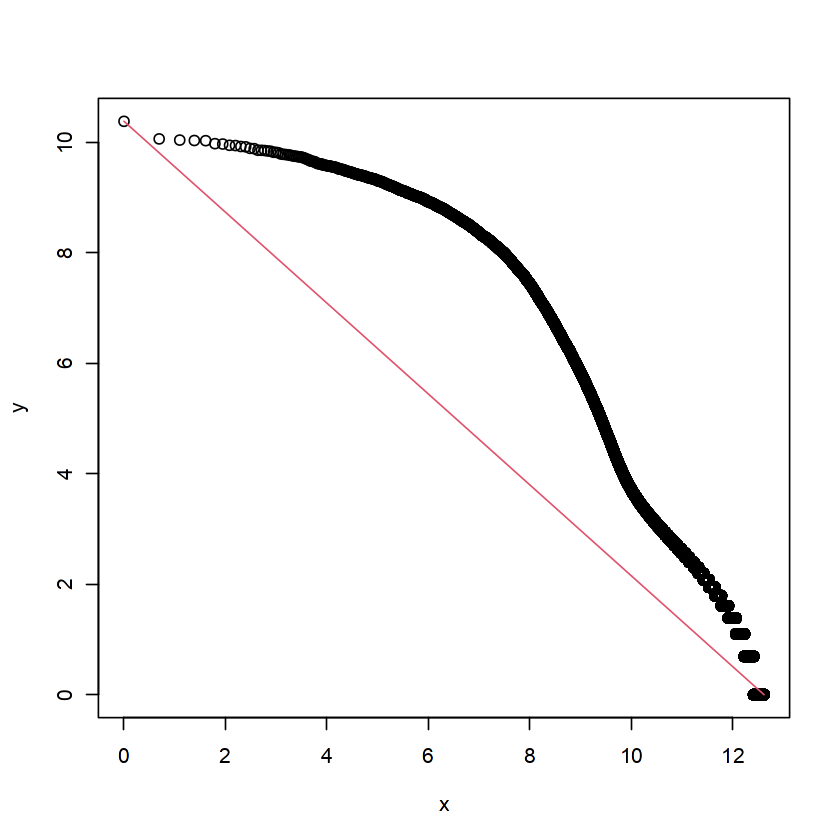

Warning message in create_seurat_object_from_seq_files("7_Article/data/data_osf/GEO061", :
“Des gènes en double ont été trouvés et seront supprimés.”


 [1] "bs-ydzT" "bs-ydzT" "bs-ydzW" "bs-yetI" "bs-panE" "bs-yoyK" "bs-gswA"
 [8] "bs-ypuC" "bs-ispA" "bs-estA" "bs-epsK" "bs-epsJ" "bs-spsC"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


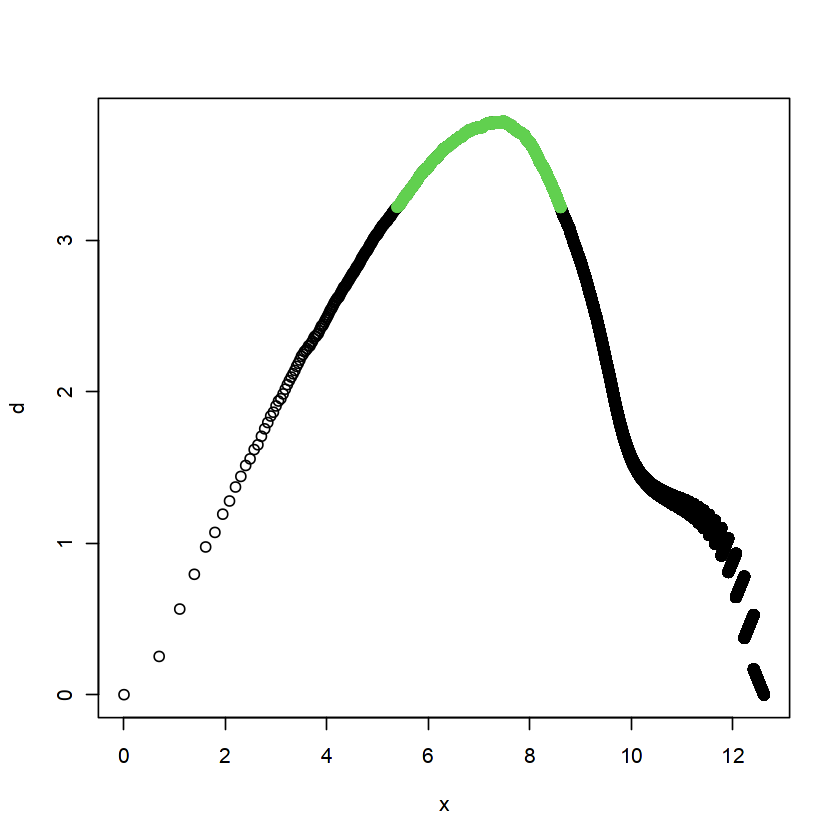

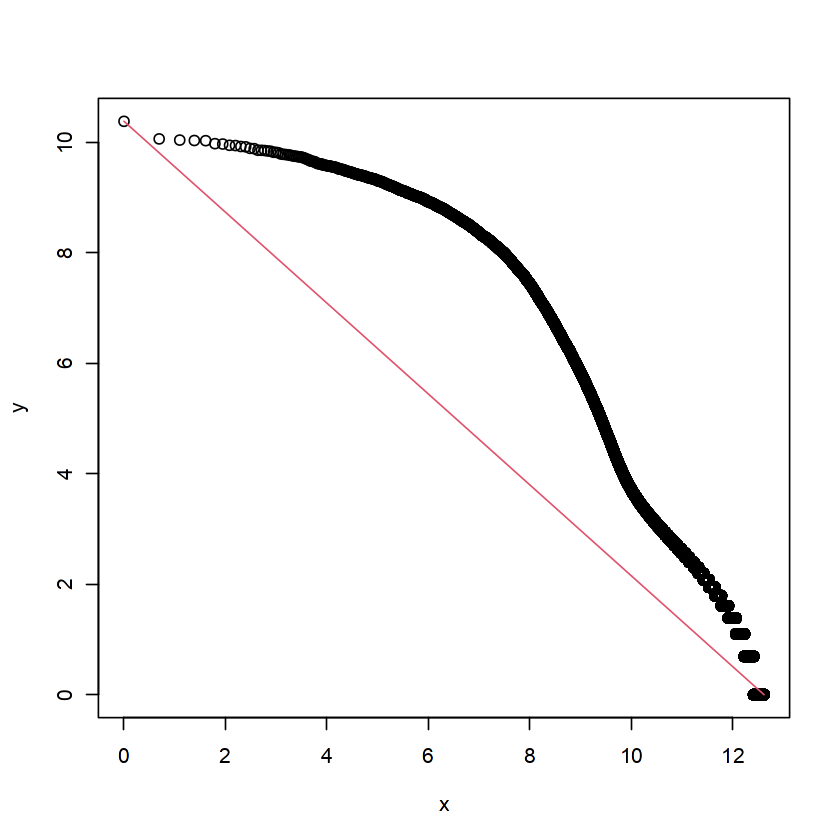

Warning message in create_seurat_object_from_seq_files("7_Article/data/data_osf/GEO061", :
“Des gènes en double ont été trouvés et seront supprimés.”


 [1] "bs-ydzT" "bs-ydzT" "bs-ydzW" "bs-yetI" "bs-panE" "bs-yoyK" "bs-gswA"
 [8] "bs-ypuC" "bs-ispA" "bs-estA" "bs-epsK" "bs-epsJ" "bs-spsC"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


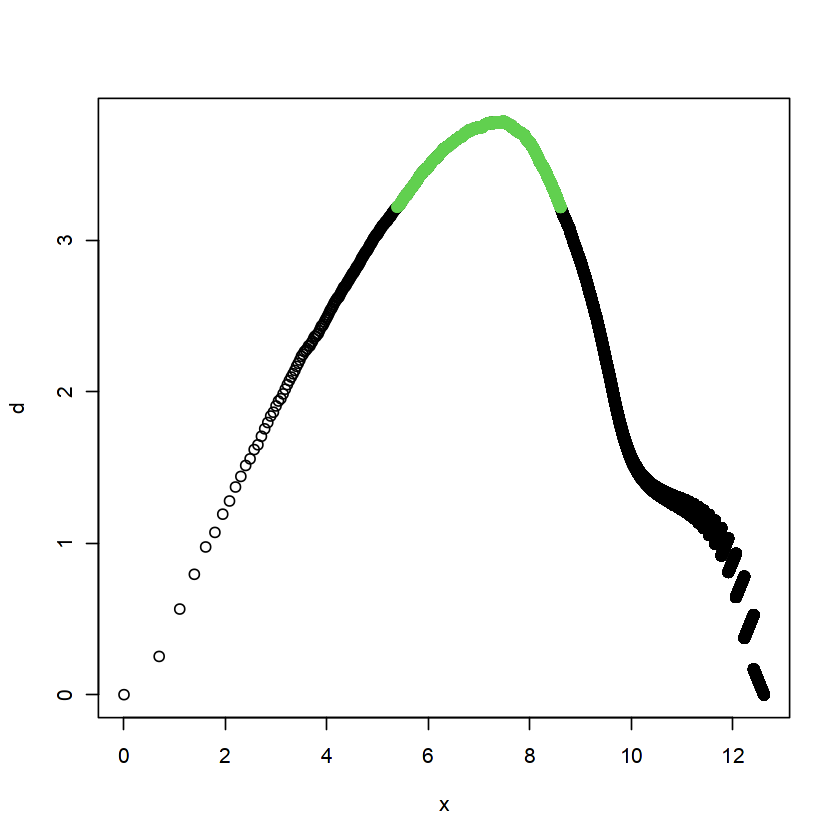

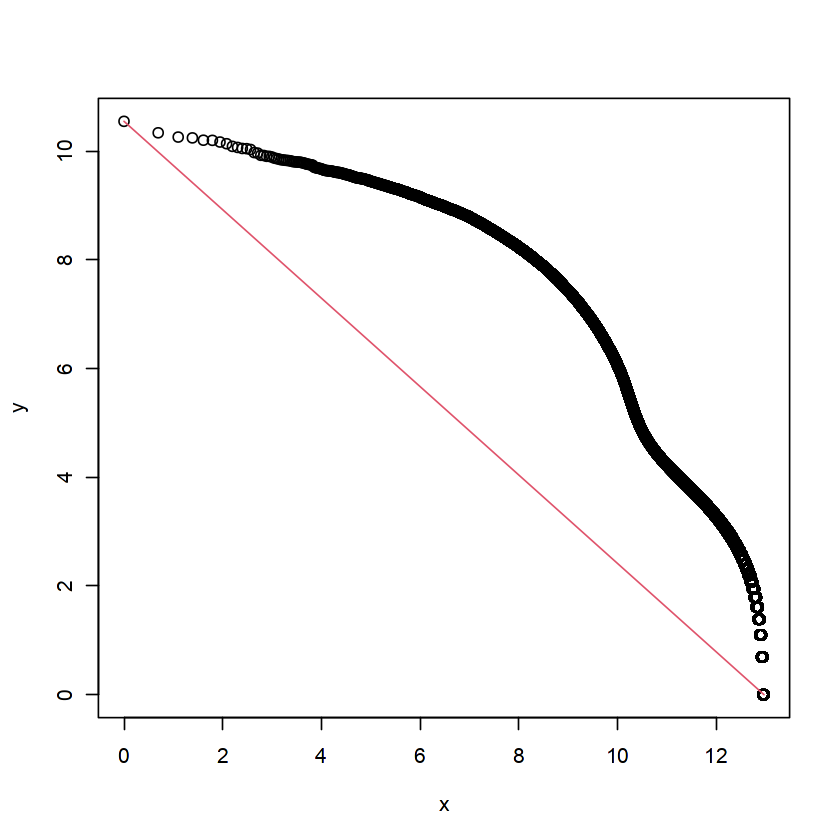

Warning message in create_seurat_object_from_seq_files("7_Article/data/data_osf/GEO660", :
“Des gènes en double ont été trouvés et seront supprimés.”


 [1] "bs-ydzT" "bs-ydzT" "bs-ydzW" "bs-yetI" "bs-panE" "bs-yoyK" "bs-gswA"
 [8] "bs-ypuC" "bs-ispA" "bs-estA" "bs-epsK" "bs-epsJ" "bs-spsC"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


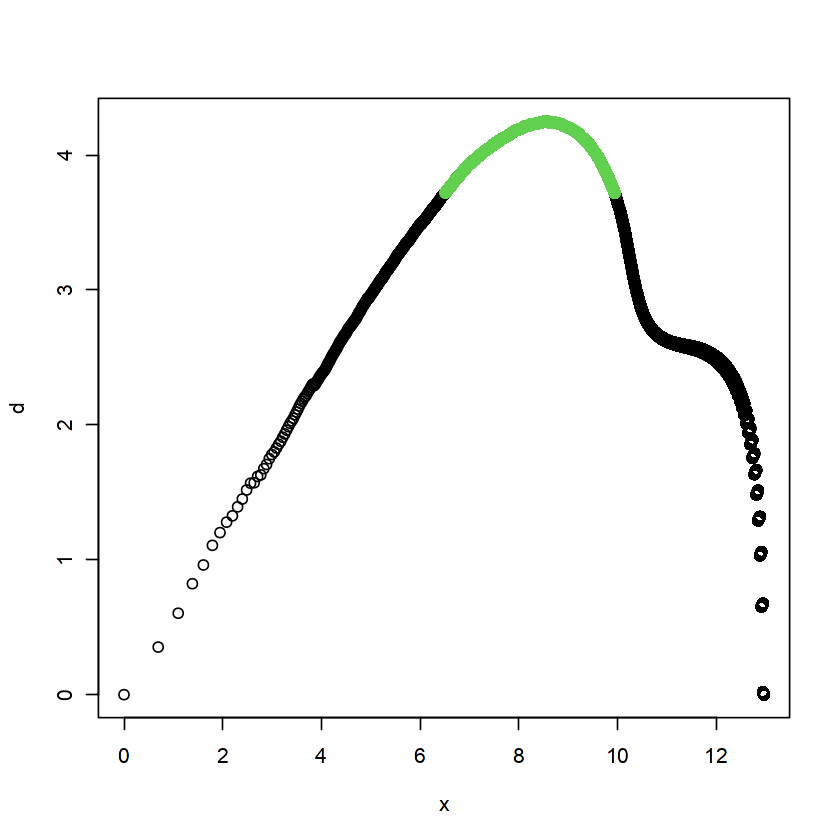

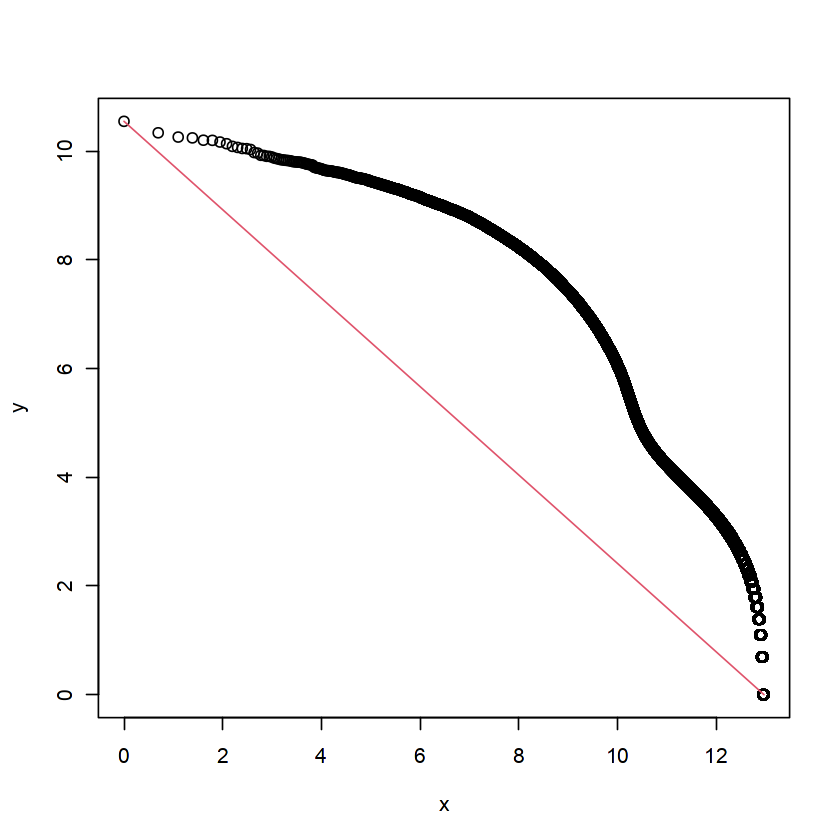

Warning message in create_seurat_object_from_seq_files("7_Article/data/data_osf/GEO660", :
“Des gènes en double ont été trouvés et seront supprimés.”


 [1] "bs-ydzT" "bs-ydzT" "bs-ydzW" "bs-yetI" "bs-panE" "bs-yoyK" "bs-gswA"
 [8] "bs-ypuC" "bs-ispA" "bs-estA" "bs-epsK" "bs-epsJ" "bs-spsC"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


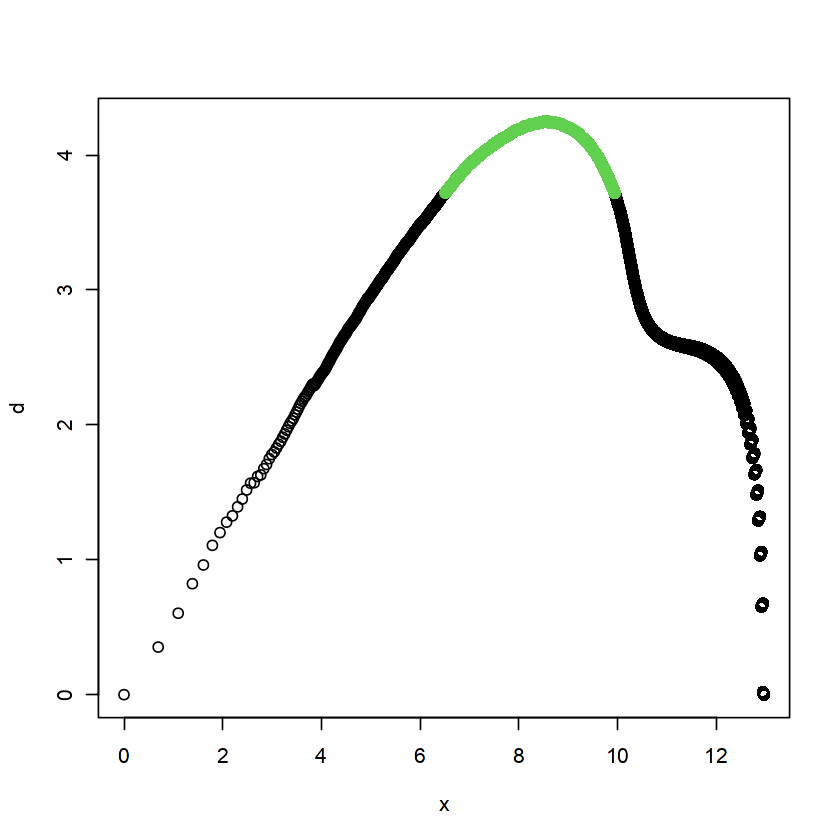

In [10]:

### Création des objets Seurat pour les données de séquençage de B. subtilis

#GEO661 <- create_seurat_object_from_seq_files('C:/Users/lbrettne/Desktop/GEO661 Solo.out/bacillus_only/GeneFull/raw/','M15','none',0.85) # avec ribosome 


#B. subtilis replicate 1 
GEO661 <- create_seurat_object_from_seq_files('7_Article/data/data_osf/GEO061','M15','none',0.85) # avec ribosome 
GEO661.nr <- create_seurat_object_from_seq_files('7_Article/data/data_osf/GEO061','M15','rRNA',0.85) # sans ribosome

#B. subtilis replicate 2
GEO660 <- create_seurat_object_from_seq_files('7_Article/data/data_osf/GEO660','M14','none',0.875)
GEO660.nr <- create_seurat_object_from_seq_files('7_Article/data/data_osf/GEO660','M14','rRNA',0.875)


In [11]:
print ("GEO661 results : ")
GEO661 
head(GEO661@meta.data)
dim(GEO661@meta.data)  # Vérifie le nombre de cellules et de colonnes
colnames(GEO661@meta.data)  # Liste les colonnes disponibles


GEO661.nr 
head(GEO661.nr@meta.data)
dim(GEO661.nr@meta.data)  # Vérifie le nombre de cellules et de colonnes
colnames(GEO661.nr@meta.data)  # Liste les colonnes disponibles


print ("GEO660 results : ")
GEO660 
head(GEO660@meta.data)
dim(GEO660@meta.data)  # Vérifie le nombre de cellules et de colonnes
colnames(GEO660@meta.data)  # Liste les colonnes disponibles


GEO660.nr 
head(GEO660.nr@meta.data)
dim(GEO660.nr@meta.data)  # Vérifie le nombre de cellules et de colonnes
colnames(GEO660.nr@meta.data)  # Liste les colonnes disponibles




[1] "GEO661 results : "


An object of class Seurat 
4402 features across 5461 samples within 1 assay 
Active assay: RNA (4402 features, 0 variable features)
 1 layer present: counts

,orig.ident,nCount_RNA,nFeature_RNA,well,sublibrary
,<fct>,<dbl>,<int>,<chr>,<chr>
AACAACCA_CCGACAAC_ACTCGTAA,AACAACCA,4001.667,356,A1,M15
AACCGAGA_GTGTTCTA_ACTCGTAA,AACCGAGA,14979.004,830,A1,M15
AACGTGAT_TATCAGCA_ACTCGTAA,AACGTGAT,2013.501,197,A1,M15
AACTCACC_GACTAGTA_ACTCGTAA,AACTCACC,1622.667,169,A1,M15
AACTCACC_GTACGCAA_ACTCGTAA,AACTCACC,8802.000,582,A1,M15
AAGAGATC_CGCATACA_ACTCGTAA,AAGAGATC,1077.417,140,A1,M15


[1] 5461    5

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "well"         "sublibrary"

An object of class Seurat 
4493 features across 5461 samples within 1 assay 
Active assay: RNA (4493 features, 0 variable features)
 1 layer present: counts

,orig.ident,nCount_RNA,nFeature_RNA,well,sublibrary
,<fct>,<dbl>,<int>,<chr>,<chr>
AACAACCA_CCGACAAC_ACTCGTAA,AACAACCA,402.2537,336,A1,M15
AACCGAGA_GTGTTCTA_ACTCGTAA,AACCGAGA,1492.1321,801,A1,M15
AACGTGAT_TATCAGCA_ACTCGTAA,AACGTGAT,183.7611,177,A1,M15
AACTCACC_GACTAGTA_ACTCGTAA,AACTCACC,155.4886,150,A1,M15
AACTCACC_GTACGCAA_ACTCGTAA,AACTCACC,907.3934,553,A1,M15
AAGAGATC_CGCATACA_ACTCGTAA,AAGAGATC,109.6639,121,A1,M15


[1] 5461    5

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "well"         "sublibrary"

[1] "GEO660 results : "


An object of class Seurat 
4521 features across 20871 samples within 1 assay 
Active assay: RNA (4521 features, 0 variable features)
 1 layer present: counts

,orig.ident,nCount_RNA,nFeature_RNA,well,sublibrary
,<fct>,<dbl>,<int>,<chr>,<chr>
AAACATCG_AGCAGGAA_ACTCGTAA,AAACATCG,3910.0015,408,A1,M14
AAACATCG_CGAACTTA_ACTCGTAA,AAACATCG,6883.8572,578,A1,M14
AAACATCG_TCTTCACA_ACTCGTAA,AAACATCG,2105.9994,250,A1,M14
AAACATCG_TGGCTTCA_ACTCGTAA,AAACATCG,848.9996,142,A1,M14
AACAACCA_AAGACGGA_ACTCGTAA,AACAACCA,5214.9994,482,A1,M14
AACAACCA_ACATTGGC_ACTCGTAA,AACAACCA,3331.0000,356,A1,M14


[1] 20871     5

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "well"         "sublibrary"

An object of class Seurat 
4493 features across 20871 samples within 1 assay 
Active assay: RNA (4493 features, 0 variable features)
 1 layer present: counts

,orig.ident,nCount_RNA,nFeature_RNA,well,sublibrary
,<fct>,<dbl>,<int>,<chr>,<chr>
AAACATCG_AGCAGGAA_ACTCGTAA,AAACATCG,549.4310,379,A1,M14
AAACATCG_CGAACTTA_ACTCGTAA,AAACATCG,814.7206,548,A1,M14
AAACATCG_TCTTCACA_ACTCGTAA,AAACATCG,253.0189,229,A1,M14
AAACATCG_TGGCTTCA_ACTCGTAA,AAACATCG,118.4298,122,A1,M14
AACAACCA_AAGACGGA_ACTCGTAA,AACAACCA,796.8236,462,A1,M14
AACAACCA_ACATTGGC_ACTCGTAA,AACAACCA,451.6707,336,A1,M14


[1] 20871     5

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "well"         "sublibrary"

In [14]:
# assigne les metadonnées de densité optique aux cellules

print ("Assigning metadata to cells M15: ")
growcurvb.m15 <- assign_metadata_bacteria_M15(GEO661)
print ("Assigning metadata to cells M15 without rRNA: ")
growcurvb.nr.m15 <- assign_metadata_bacteria_M15(GEO661.nr)

#repeat for replicate 2
print ("Assigning metadata to cells M14: ")
growcurvb.m14 <- assign_metadata_bacteria_M14(GEO660)
print ("Assigning metadata to cells M14 without rRNA: ")
growcurvb.nr.m14 <- assign_metadata_bacteria_M14(GEO660.nr)



[1] "Assigning metadata to cells M15: "
[1] 0
[1] 0
[1] "Assigning metadata to cells M15 without rRNA: "
[1] 0
[1] 0
[1] "Assigning metadata to cells M14: "
[1] 0
[1] 0
[1] "Assigning metadata to cells M14 without rRNA: "
[1] 0
[1] 0


In [15]:

#subset data into individual timepoints
OD0.5.m15 <- subset(growcurvb.m15, subset = cond == "OD0.5")
OD1.0.m15 <- subset(growcurvb.m15, subset = cond == "OD1.0")
OD1.3.m15 <- subset(growcurvb.m15, subset = cond == "OD1.3")
OD1.6.m15 <- subset(growcurvb.m15, subset = cond == "OD1.6")
OD2.8.m15 <- subset(growcurvb.m15, subset = cond == "OD2.8")
OD3.6.m15 <- subset(growcurvb.m15, subset = cond == "OD3.6")
OD5.3.m15 <- subset(growcurvb.m15, subset = cond == "OD5.3")
OD6.0.m15 <- subset(growcurvb.m15, subset = cond == "OD6.0")

#subset data minus rRNA into individual timepoints
OD0.5.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD0.5")
OD1.0.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD1.0")
OD1.3.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD1.3")
OD1.6.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD1.6")
OD2.8.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD2.8")
OD3.6.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD3.6")
OD5.3.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD5.3")
OD6.0.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD6.0")



#subset data into individual timepoints
OD0.5.m14 <- subset(growcurvb.m14, subset = cond == "OD0.5")
OD1.0.m14 <- subset(growcurvb.m14, subset = cond == "OD1.0")
OD1.7.m14 <- subset(growcurvb.m14, subset = cond == "OD1.7")
OD2.0.m14 <- subset(growcurvb.m14, subset = cond == "OD2.0")
OD2.8.m14 <- subset(growcurvb.m14, subset = cond == "OD2.8")
OD3.2.m14 <- subset(growcurvb.m14, subset = cond == "OD3.2")


#subset data minus rRNA into individual timepoints
OD0.5.nr.m14 <- subset(growcurvb.nr.m14, subset = cond == "OD0.5")
OD1.0.nr.m14 <- subset(growcurvb.nr.m14, subset = cond == "OD1.0")
OD1.7.nr.m14 <- subset(growcurvb.nr.m14, subset = cond == "OD1.7")
OD2.0.nr.m14 <- subset(growcurvb.nr.m14, subset = cond == "OD2.0")
OD2.8.nr.m14 <- subset(growcurvb.nr.m14, subset = cond == "OD2.8")
OD3.2.nr.m14 <- subset(growcurvb.nr.m14, subset = cond == "OD3.2")





In [16]:
#Test d'affichage des données

growcurvb.m15 
head(growcurvb.m15@meta.data)
dim(growcurvb.m15@meta.data)  # Vérifie le nombre de cellules et de colonnes
colnames(growcurvb.m15@meta.data)  # Liste les colonnes disponibles



growcurvb.m14 
head(growcurvb.m14@meta.data)
dim(growcurvb.m14@meta.data)  # Vérifie le nombre de cellules et de colonnes
colnames(growcurvb.m14@meta.data)  # Liste les colonnes disponibles


An object of class Seurat 
4402 features across 5461 samples within 1 assay 
Active assay: RNA (4402 features, 0 variable features)
 1 layer present: counts

,orig.ident,nCount_RNA,nFeature_RNA,well,sublibrary,cond
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
AACAACCA_CCGACAAC_ACTCGTAA,AACAACCA,4001.667,356,A1,M15,OD0.5
AACCGAGA_GTGTTCTA_ACTCGTAA,AACCGAGA,14979.004,830,A1,M15,OD0.5
AACGTGAT_TATCAGCA_ACTCGTAA,AACGTGAT,2013.501,197,A1,M15,OD0.5
AACTCACC_GACTAGTA_ACTCGTAA,AACTCACC,1622.667,169,A1,M15,OD0.5
AACTCACC_GTACGCAA_ACTCGTAA,AACTCACC,8802.000,582,A1,M15,OD0.5
AAGAGATC_CGCATACA_ACTCGTAA,AAGAGATC,1077.417,140,A1,M15,OD0.5


[1] 5461    6

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "well"         "sublibrary"  
[6] "cond"

An object of class Seurat 
4521 features across 20871 samples within 1 assay 
Active assay: RNA (4521 features, 0 variable features)
 1 layer present: counts

,orig.ident,nCount_RNA,nFeature_RNA,well,sublibrary,cond
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
AAACATCG_AGCAGGAA_ACTCGTAA,AAACATCG,3910.0015,408,A1,M14,OD0.5
AAACATCG_CGAACTTA_ACTCGTAA,AAACATCG,6883.8572,578,A1,M14,OD0.5
AAACATCG_TCTTCACA_ACTCGTAA,AAACATCG,2105.9994,250,A1,M14,OD0.5
AAACATCG_TGGCTTCA_ACTCGTAA,AAACATCG,848.9996,142,A1,M14,OD0.5
AACAACCA_AAGACGGA_ACTCGTAA,AACAACCA,5214.9994,482,A1,M14,OD0.5
AACAACCA_ACATTGGC_ACTCGTAA,AACAACCA,3331.0000,356,A1,M14,OD0.5


[1] 20871     6

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "well"         "sublibrary"  
[6] "cond"

In [17]:


#fonction pour normaliser 


#normalize and scale mRNA datasets
scale_normalize_seurat_data <- function(seuratobject, nvariableFeatures, npcs, features){
  
  integrated <- NormalizeData(seuratobject, verbose = FALSE)
  integrated <- FindVariableFeatures(integrated, selection.method = "vst", 
                                     nfeatures = nvariableFeatures, verbose = FALSE)
  
  integrated <- ScaleData(integrated, verbose = FALSE)
  integrated <- RunPCA(integrated, npcs = npcs, verbose = FALSE, features = features)
  #integrated <- JackStraw(integrated)
  #integrated <- ScoreJackStraw(integrated, dims = 1:npcs)
  #p <- plot_grid(ElbowPlot(integrated), JackStrawPlot(integrated, dims = 1:npcs))
  p <- ElbowPlot(integrated)
  print(p)
  return(integrated)
}


# La fonction scale_normalize_seurat_data() effectue les étapes suivantes sur un objet Seurat :
# 	1.	Normalisation des données → NormalizeData()
# 	•	Transforme les valeurs d’expression des gènes en CPM (Counts Per Million).
# 	•	Applique une normalisation logarithmique (LogNormalize par défaut).
# 	2.	Identification des gènes les plus variables → FindVariableFeatures()
# 	•	Sélectionne les nvariableFeatures gènes les plus variables avec la méthode vst (Variance Stabilizing Transformation).
# 	3.	Mise à l’échelle des données → ScaleData()
# 	•	Centre chaque gène sur une moyenne de 0.
# 	•	Met à l’échelle les valeurs d’expression avec un écart-type de 1.
# 	4.	Analyse en Composantes Principales (PCA) → RunPCA()
# 	•	Effectue une PCA sur npcs composantes principales.
# 	•	Utilise les features spécifiés ou, si features = NULL, les gènes variables détectés.
# 	5.	Affichage d’un Elbow Plot → ElbowPlot()
# 	•	Génère un Elbow Plot pour visualiser le nombre optimal de composantes à conserver.
# 	6.	Retourne l’objet Seurat modifié contenant les résultats de la normalisation, du scaling et de la PCA.

# 💡 Résumé :
# 👉 Normalise les données → Sélectionne les gènes variables → Met à l’échelle → Effectue une PCA → Affiche un Elbow Plot.




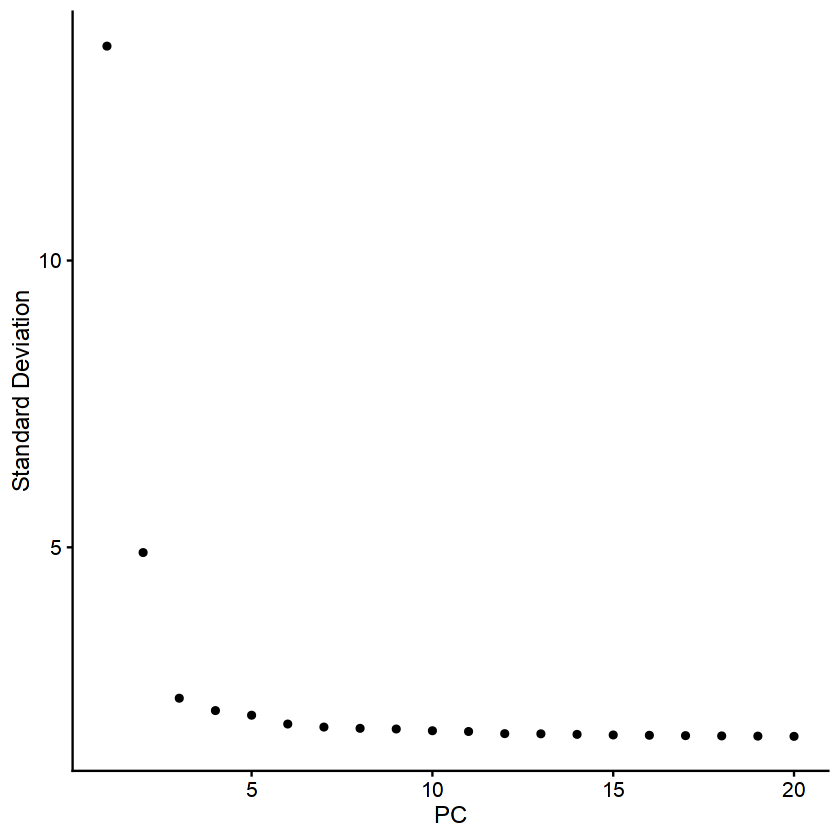

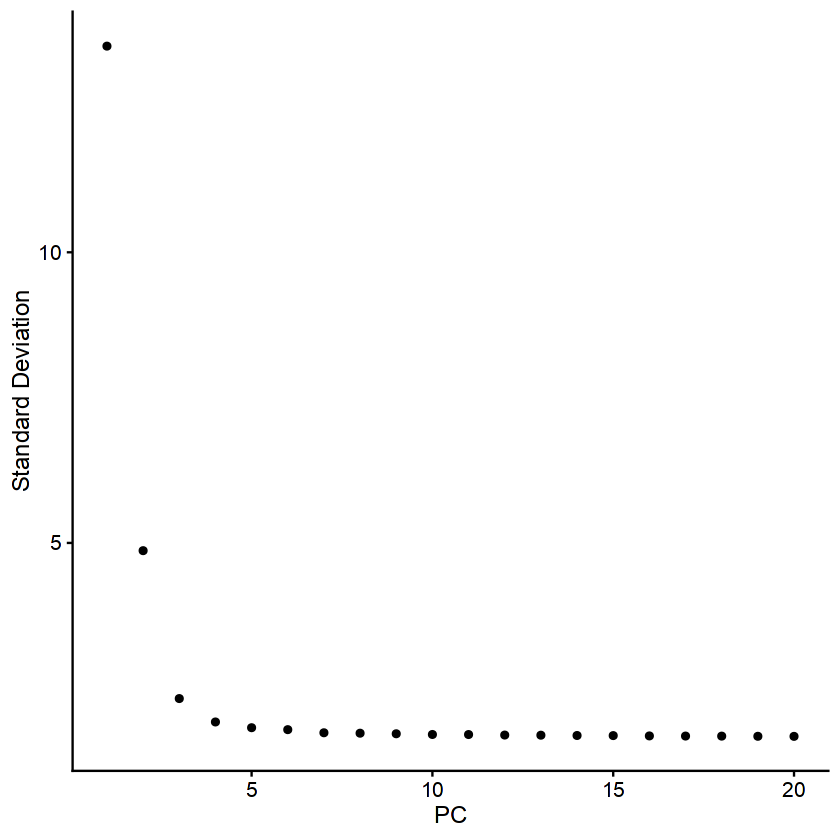

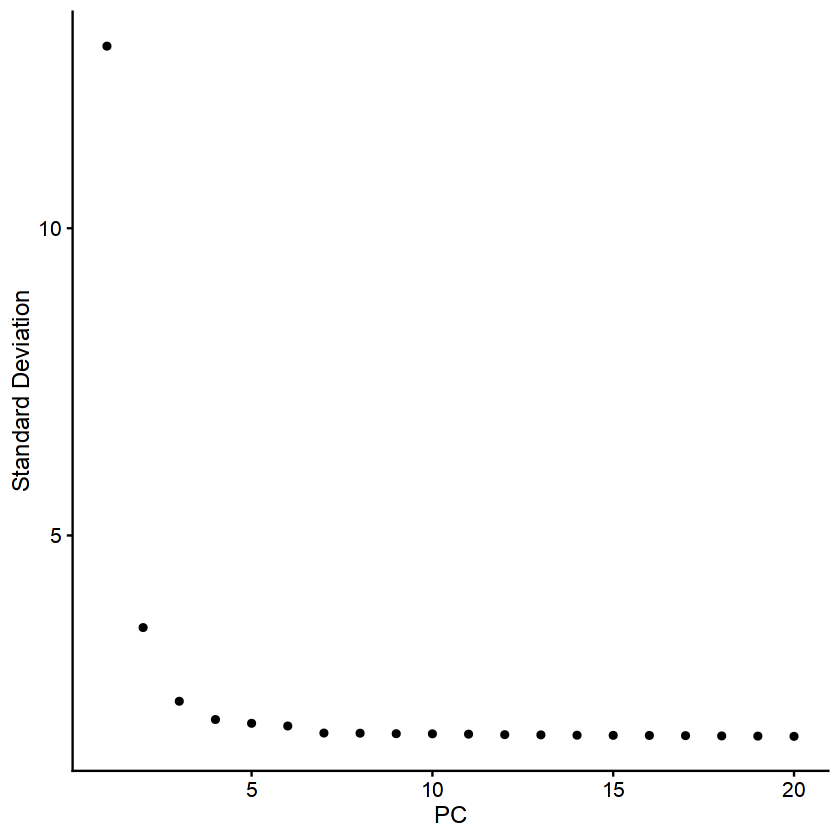

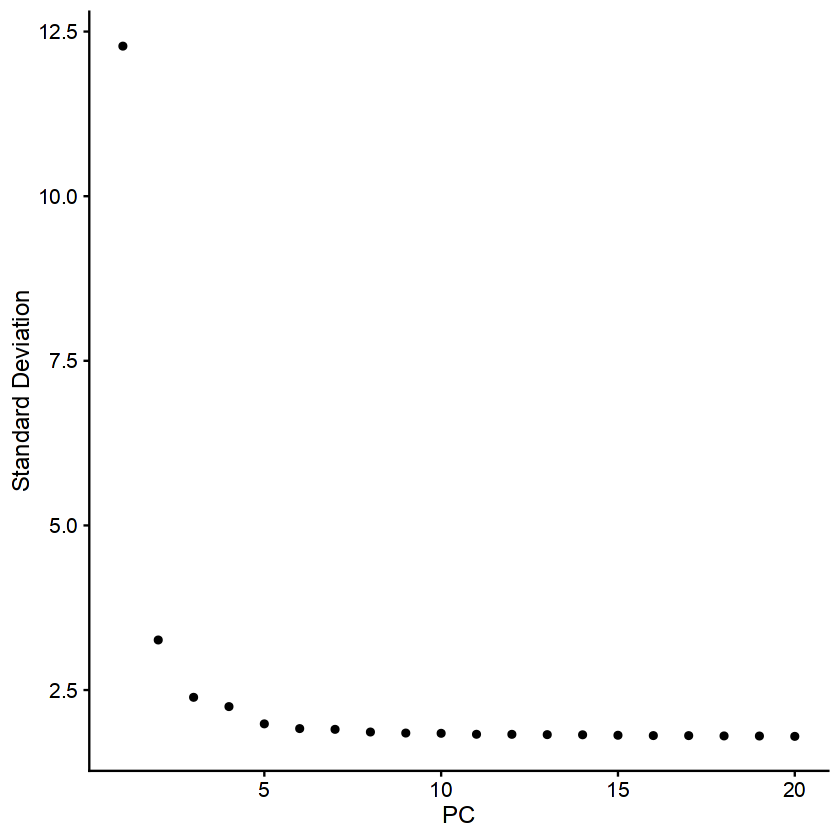

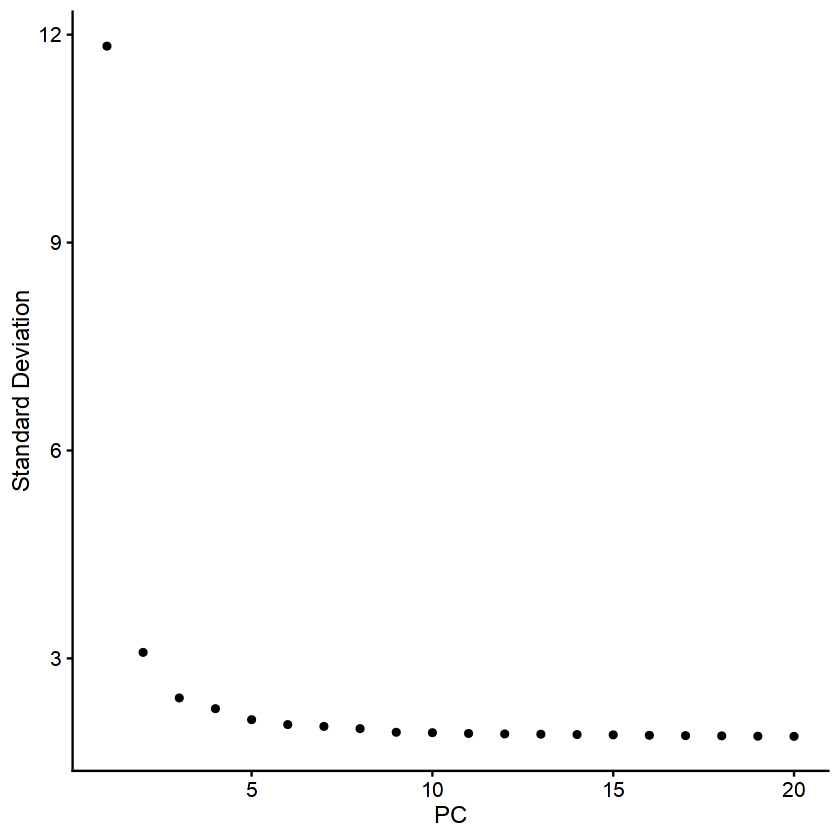

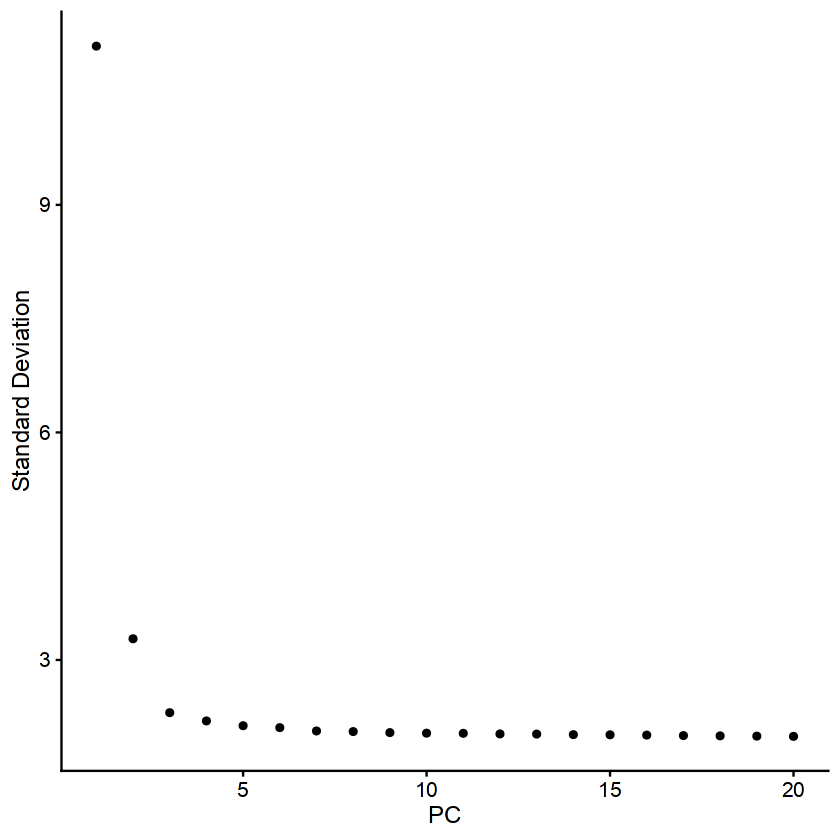

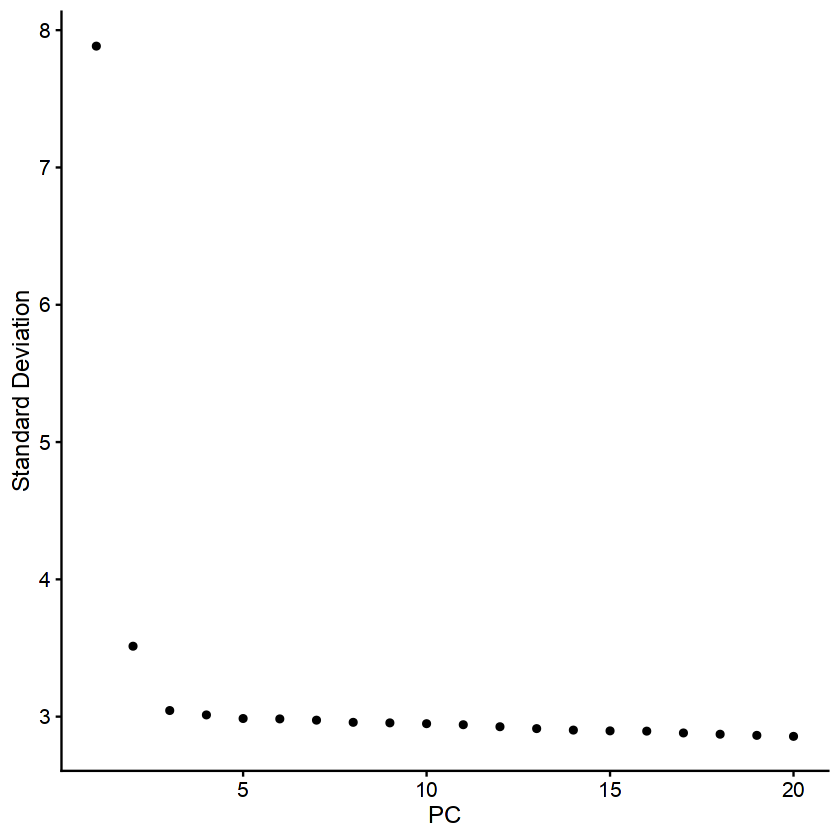

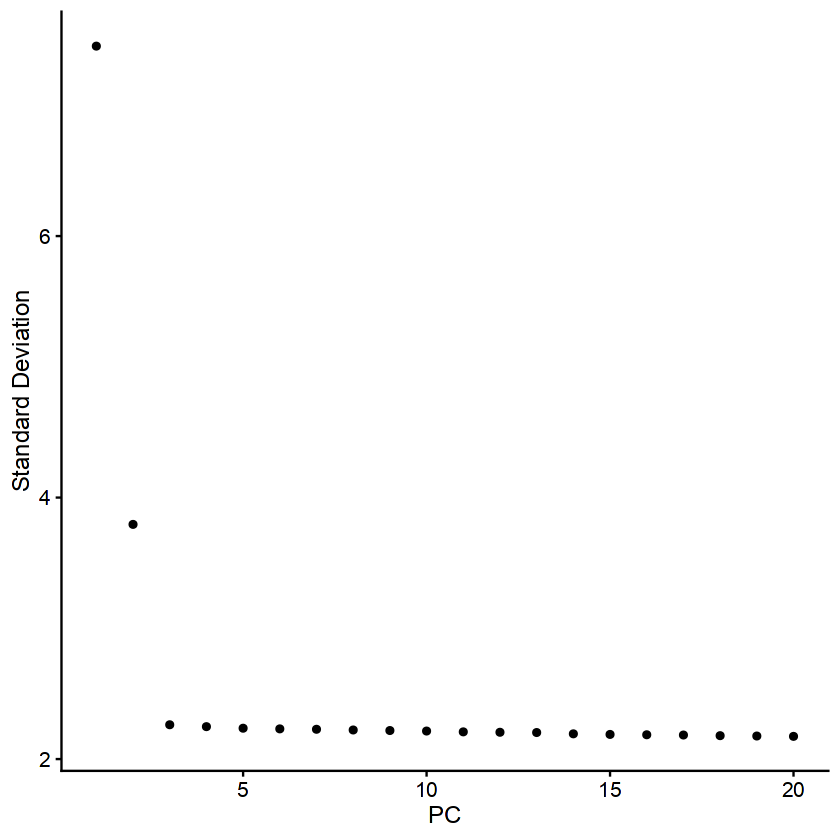

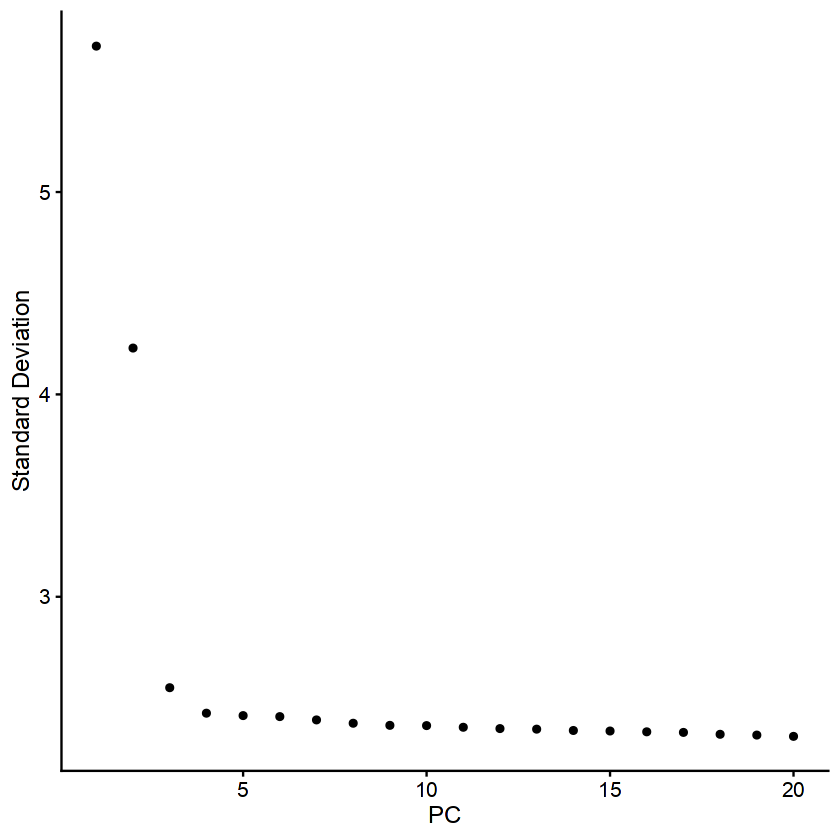

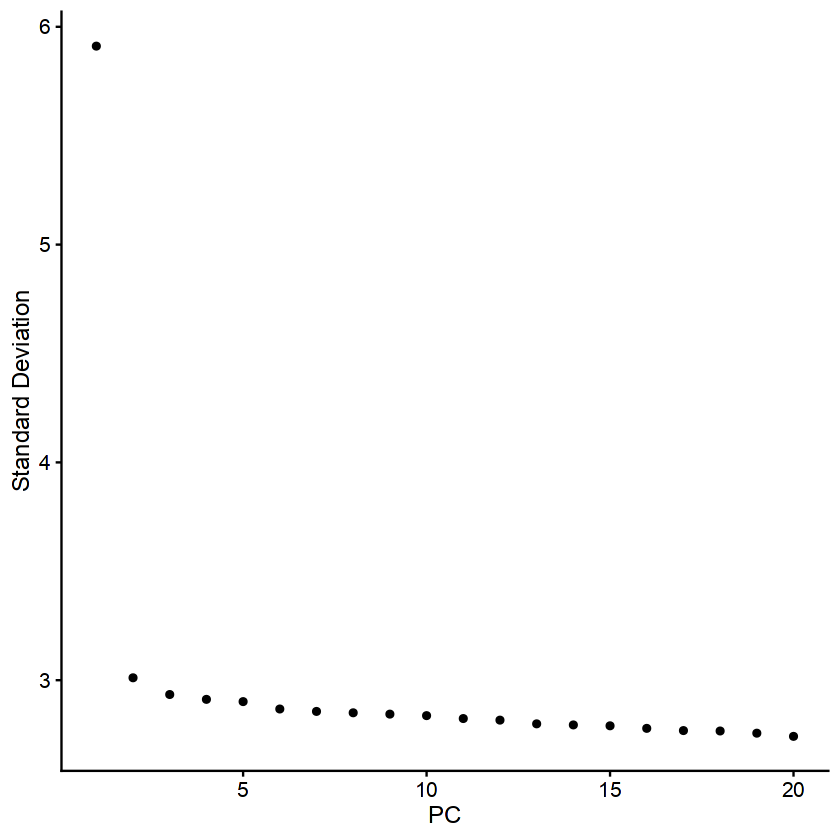

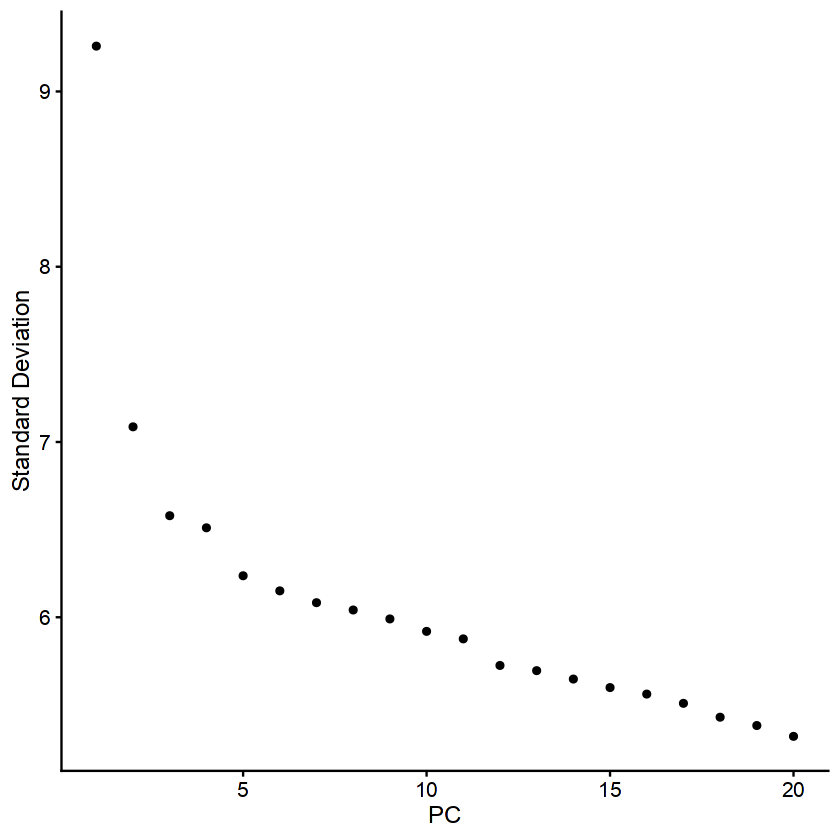

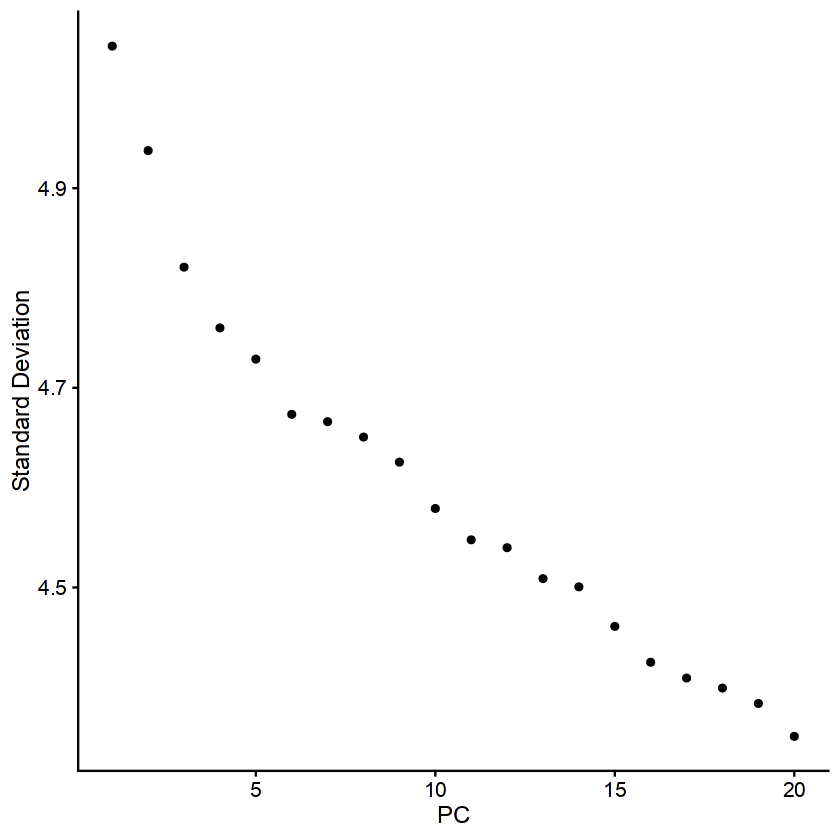

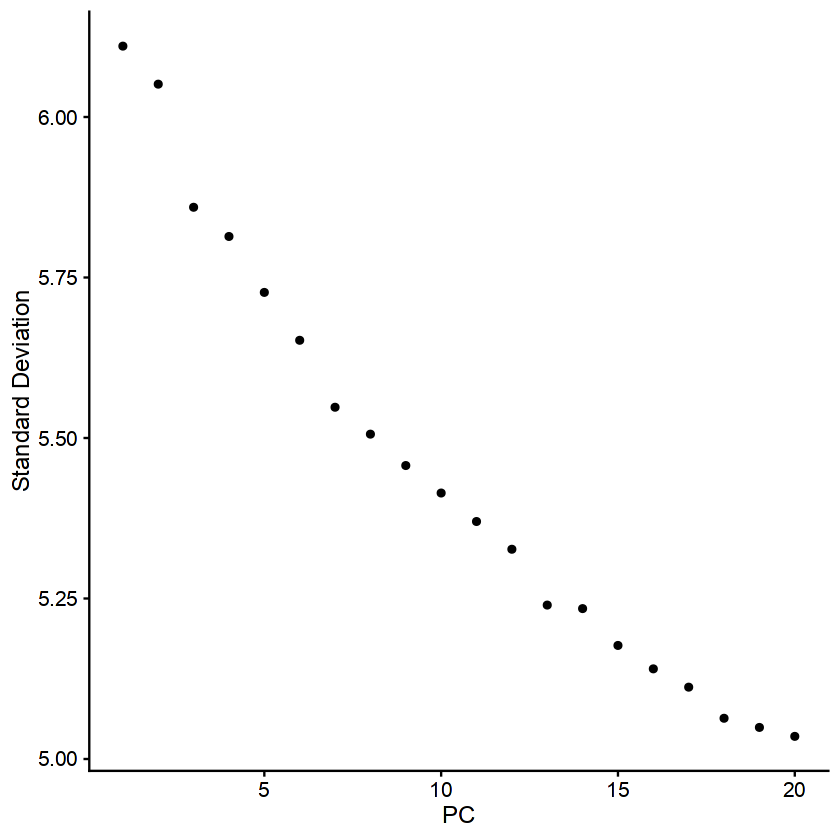

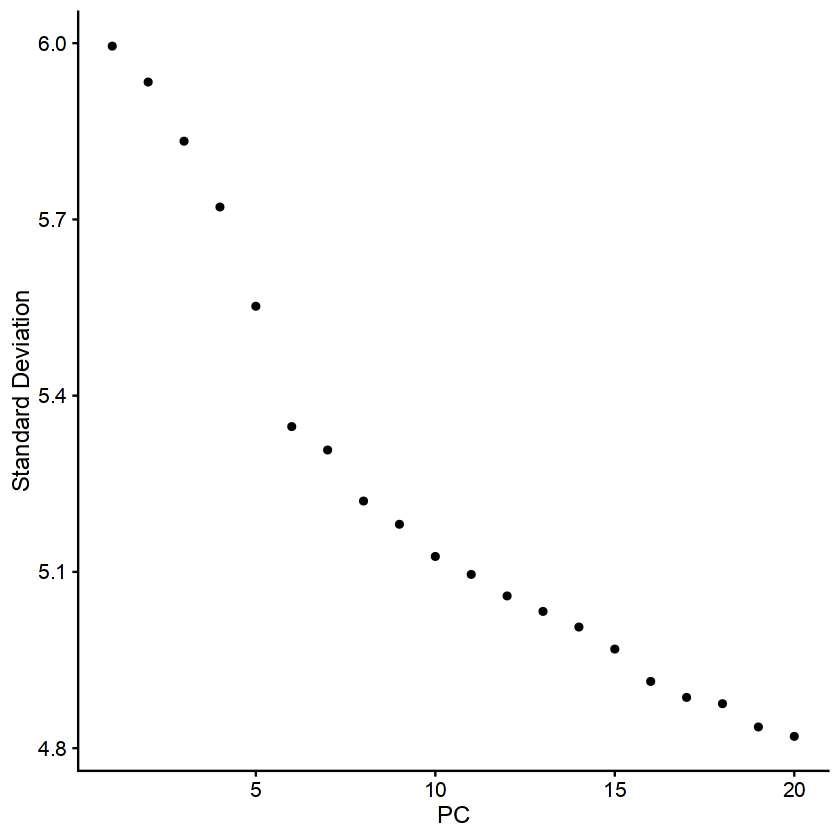

In [18]:


#Utilisation de la focnrtion scale_normalize_seurat_data pour normaliser et mettre à l'échelle les données de séquençage de B. subtilis

OD0.5.nr.m14.int <- scale_normalize_seurat_data(OD0.5.nr.m14, 3000, 20, NULL)
OD1.0.nr.m14.int <- scale_normalize_seurat_data(OD1.0.nr.m14, 3000, 20, NULL)
OD1.7.nr.m14.int <- scale_normalize_seurat_data(OD1.7.nr.m14, 3000, 20, NULL)
OD2.0.nr.m14.int <- scale_normalize_seurat_data(OD2.0.nr.m14, 3000, 20, NULL)
OD2.8.nr.m14.int <- scale_normalize_seurat_data(OD2.8.nr.m14, 3000, 20, NULL)
OD3.2.nr.m14.int <- scale_normalize_seurat_data(OD3.2.nr.m14, 3000, 20, NULL)

OD0.5.nr.m15.int <- scale_normalize_seurat_data(OD0.5.nr.m15, 3000, 20, NULL)
OD1.0.nr.m15.int <- scale_normalize_seurat_data(OD1.0.nr.m15, 3000, 20, NULL)
OD1.3.nr.m15.int <- scale_normalize_seurat_data(OD1.3.nr.m15, 3000, 20, NULL)
OD1.6.nr.m15.int <- scale_normalize_seurat_data(OD1.6.nr.m15, 3000, 20, NULL)
OD2.8.nr.m15.int <- scale_normalize_seurat_data(OD2.8.nr.m15, 3000, 20, NULL)
OD3.6.nr.m15.int <- scale_normalize_seurat_data(OD3.6.nr.m15, 3000, 20, NULL)
OD5.3.nr.m15.int <- scale_normalize_seurat_data(OD5.3.nr.m15, 3000, 20, NULL)
OD6.0.nr.m15.int <- scale_normalize_seurat_data(OD6.0.nr.m15, 3000, 20, NULL)




In [19]:

OD0.5.nr.m14.int 
head(OD0.5.nr.m14.int@meta.data)
dim(OD0.5.nr.m14.int@meta.data)  # Vérifie le nombre de cellules et de colonnes
colnames(OD0.5.nr.m14.int@meta.data)  # Liste les colonnes disponibles



OD0.5.m14
head(OD0.5.m14@meta.data)
dim(OD0.5.m14@meta.data)  # Vérifie le nombre de cellules et de colonnes
colnames(OD0.5.m14@meta.data)  # Liste les colonnes disponibles

An object of class Seurat 
4493 features across 4667 samples within 1 assay 
Active assay: RNA (4493 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 dimensional reduction calculated: pca

,orig.ident,nCount_RNA,nFeature_RNA,well,sublibrary,cond
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
AAACATCG_AGCAGGAA_ACTCGTAA,AAACATCG,549.4310,379,A1,M14,OD0.5
AAACATCG_CGAACTTA_ACTCGTAA,AAACATCG,814.7206,548,A1,M14,OD0.5
AAACATCG_TCTTCACA_ACTCGTAA,AAACATCG,253.0189,229,A1,M14,OD0.5
AAACATCG_TGGCTTCA_ACTCGTAA,AAACATCG,118.4298,122,A1,M14,OD0.5
AACAACCA_AAGACGGA_ACTCGTAA,AACAACCA,796.8236,462,A1,M14,OD0.5
AACAACCA_ACATTGGC_ACTCGTAA,AACAACCA,451.6707,336,A1,M14,OD0.5


[1] 4667    6

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "well"         "sublibrary"  
[6] "cond"

An object of class Seurat 
4521 features across 4667 samples within 1 assay 
Active assay: RNA (4521 features, 0 variable features)
 1 layer present: counts

,orig.ident,nCount_RNA,nFeature_RNA,well,sublibrary,cond
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
AAACATCG_AGCAGGAA_ACTCGTAA,AAACATCG,3910.0015,408,A1,M14,OD0.5
AAACATCG_CGAACTTA_ACTCGTAA,AAACATCG,6883.8572,578,A1,M14,OD0.5
AAACATCG_TCTTCACA_ACTCGTAA,AAACATCG,2105.9994,250,A1,M14,OD0.5
AAACATCG_TGGCTTCA_ACTCGTAA,AAACATCG,848.9996,142,A1,M14,OD0.5
AACAACCA_AAGACGGA_ACTCGTAA,AACAACCA,5214.9994,482,A1,M14,OD0.5
AACAACCA_ACATTGGC_ACTCGTAA,AACAACCA,3331.0000,356,A1,M14,OD0.5


[1] 4667    6

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "well"         "sublibrary"  
[6] "cond"

In [20]:
diagnose_seurat_objects <- function(SO1, SO2) {
  # Fonction pour extraire des informations sur un objet Seurat
  diagnose_seurat_object <- function(SO, name) {
    cat("Objet Seurat", name, "- Détails:\n")
    
    # Dimensions totales
    cat("Dimensions totales:", dim(SO), "\n")
    
    # Informations sur l'assay RNA
    RNA_assay <- SO@assays$RNA
    
    # Méthodes spécifiques à Seurat v4+
    tryCatch({
      # Utiliser GetAssayData() pour extraire les données
      counts_matrix <- GetAssayData(SO, slot = "counts")
      
      cat("Informations sur l'assay RNA:\n")
      cat("  Nombre de gènes:", nrow(counts_matrix), "\n")
      cat("  Nombre d'échantillons:", ncol(counts_matrix), "\n")
      
      # Afficher les premiers noms de gènes
      cat("  Premiers 5 noms de gènes:", 
          head(rownames(counts_matrix), 5), "\n")
      
      # Informations supplémentaires
      cat("  Nombre de features variables:", 
          length(VariableFeatures(SO)), "\n")
    }, error = function(e) {
      cat("Erreur lors de l'extraction des informations:", e$message, "\n")
    })
    
    cat("\n")
  }
  
  # Diagnostiquer chaque objet Seurat
  diagnose_seurat_object(SO1, "1")
  diagnose_seurat_object(SO2, "2")
  
  # Vérification du chevauchement des gènes
  tryCatch({
    # Utiliser GetAssayData() pour obtenir les noms de gènes
    genes_so1 <- rownames(GetAssayData(SO1, slot = "counts"))
    genes_so2 <- rownames(GetAssayData(SO2, slot = "counts"))
    
    common_genes <- intersect(genes_so1, genes_so2)
    cat("Analyse des gènes communs:\n")
    cat("  Nombre de gènes communs:", length(common_genes), "\n")
    cat("  Pourcentage de gènes communs (SO1):", 
        round(length(common_genes) / length(genes_so1) * 100, 2), "%\n")
    cat("  Pourcentage de gènes communs (SO2):", 
        round(length(common_genes) / length(genes_so2) * 100, 2), "%\n")
  }, error = function(e) {
    cat("Impossible de comparer les gènes:", e$message, "\n")
  })
}

# Exécuter la fonction de diagnostic
diagnose_seurat_objects(OD0.5.m14, OD0.5.nr.m14.int)

Objet Seurat 1 - Détails:
Dimensions totales: 4521 4667 


Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


Informations sur l'assay RNA:
  Nombre de gènes: 4521 
  Nombre d'échantillons: 4667 
  Premiers 5 noms de gènes: bs-dnaA bs-dnaN bs-rlbA bs-recF bs-remB 
  Nombre de features variables: 0 

Objet Seurat 2 - Détails:
Dimensions totales: 4493 4667 
Informations sur l'assay RNA:
  Nombre de gènes: 4493 
  Nombre d'échantillons: 4667 
  Premiers 5 noms de gènes: bs-dnaA bs-dnaN bs-rlbA bs-recF bs-remB 
  Nombre de features variables: 3000 

Analyse des gènes communs:
  Nombre de gènes communs: 4491 
  Pourcentage de gènes communs (SO1): 99.34 %
  Pourcentage de gènes communs (SO2): 99.96 %


In [21]:
assign_RNA_types_b <- function(SO, SO2, group_name, timepoint) {
  # Charger les fichiers de classification des gènes
  ribosomes <- read.csv('7_Article/script/utile_bact/bacteria.ribosomes.csv')
  colnames(ribosomes) = c("name","type")
  rRNA.genes <- ribosomes[which(ribosomes$type == 'rRNA'),]
  tRNA.genes <- ribosomes[which(ribosomes$type == 'tRNA'),]
  rProt.genes <- ribosomes[which(ribosomes$type == 'rProtein'),]
  
  class <- read.csv('7_Article/script/utile_bact/bacteria_RP_iESR_RiBi.csv')
  RP.genes <- class[which(class$class == 'RP'),]
  iESR.genes <- class[which(class$class == 'iESR'),]
  RiBi.genes <- class[which(class$class == 'RiBi'),]
  
  # Extraction des matrices de comptage 
  counts_matrix <- GetAssayData(SO, layer = "counts")
  counts_matrix_so2 <- GetAssayData(SO2, layer = "counts")
  
  # Débogage : Afficher les dimensions des matrices
  cat("SO Counts Matrix Dims:", dim(counts_matrix), "\n")
  cat("SO2 Counts Matrix Dims:", dim(counts_matrix_so2), "\n")
  
  # Vérifier si les noms de gènes correspondent
  cat("Premiers noms de gènes (SO):", head(rownames(counts_matrix)), "\n")
  cat("Premiers noms de gènes (SO2):", head(rownames(counts_matrix_so2)), "\n")
  
  # Somme des comptages par type de gène
  # Ajout de vérification pour les noms de colonnes
  tryCatch({
    RP <- colSums(counts_matrix_so2[rownames(counts_matrix_so2) %in% RP.genes$gene, ])
    iESR <- colSums(counts_matrix_so2[rownames(counts_matrix_so2) %in% iESR.genes$gene, ])
    RiBi <- colSums(counts_matrix_so2[rownames(counts_matrix_so2) %in% RiBi.genes$gene, ])
    
    rpcv <- sd(RP[which(RP>0)])/mean(RP[which(RP>0)])
    
    totalmRNA <- colSums(counts_matrix_so2)
    
    # Initialisation des nouvelles colonnes
    SO2$rsect <- rep(0, ncol(SO2))
    SO2$psect <- rep(0, ncol(SO2))
    
    # Calcul des secteurs
    for (i in 1:ncol(SO2)) {
      SO2$rsect[i] <- (RP[i]+RiBi[i])/(RP[i]+RiBi[i]+iESR[i])
      SO2$psect[i] <- (iESR[i])/(RP[i]+RiBi[i]+iESR[i])
    }
    
    # Vecteur de temps
    dt <- c(0,1.3509309,1.2972221,1.2699011,1.2351942,1.2072780,1.1572952,1.1383160,1.0740787,0.9988778,0.9714859,0.8519719,0.7547571,0.6883084,0.3290760,0.1606523)
    
    # Calculs des différents types d'ARN
    rRNA <- colSums(counts_matrix[rownames(counts_matrix) %in% rRNA.genes$name, ])
    tRNA <- colSums(counts_matrix[rownames(counts_matrix) %in% tRNA.genes$name, ])
    mRNA <- counts_matrix[!(rownames(counts_matrix) %in% rRNA.genes$name), ]
    mRNA <- colSums(mRNA)
    
    rProt <- colSums(counts_matrix[rownames(counts_matrix) %in% rProt.genes$name, ])
    rProt.ratio <- rProt/mRNA
    
    totalRNA <- colSums(counts_matrix)
    rRNA.ratio <- rRNA/totalRNA
    mRNA.ratio <- mRNA/totalRNA
    mRNA.rRNA <- mRNA/rRNA
    
    bulkrr <- sum(rRNA)/sum(totalRNA)
    bulkrp <- log10(sum(rProt)/sum(totalRNA)*10^6)
    
    rcv <- sd(rRNA)/mean(rRNA)
    rrcv <- sd(rRNA.ratio)/mean(rRNA.ratio)
    
    rr.med.dev.med <- median(abs(rRNA - median(rRNA)))
    
    # Création du dataframe de résultats
    temp <- data.frame(
      group_name = group_name,
      rRNA = rRNA,
      tRNA = tRNA,
      mRNA = mRNA,
      rProt = rProt,
      totalRNA = totalRNA,
      rProt.ratio = rProt.ratio,
      rRNA.ratio = rRNA.ratio,
      mRNA.ratio = mRNA.ratio,
      mRNA.rRNA = mRNA.rRNA,
      bulkrr = bulkrr,
      GpH = dt[timepoint],
      bulkrp = bulkrp,
      rcv = rcv,
      rpcv = rpcv,
      rrcv = rrcv,
      rsd = sd(rRNA),
      rrsd = sd(rRNA.ratio),
      rpsd = sd(rProt),
      rprsd = sd(rProt.ratio),
      rrm = mean(rRNA),
      rr.med.dev.med = rr.med.dev.med,
      rsect = SO2$rsect,
      psect = SO2$psect
    )
    
    return(temp)
  }, error = function(e) {
    cat("Erreur dans le calcul :", e$message, "\n")
    return(NULL)
  })
}

In [22]:
# Calcul des statistiques pour les différents types d'ARN



#Pour le replicate 1

m15OD0.5.RNA <- assign_RNA_types_b(OD0.5.m15, OD0.5.nr.m15.int, "0.5", 4)
m15OD1.0.RNA <- assign_RNA_types_b(OD1.0.m15, OD1.0.nr.m15.int, "1.0", 5)
m15OD1.3.RNA <- assign_RNA_types_b(OD1.3.m15, OD1.3.nr.m15.int, "1.3", 8)
m15OD1.6.RNA <- assign_RNA_types_b(OD1.6.m15, OD1.6.nr.m15.int, "1.6", 9)
m15OD2.8.RNA <- assign_RNA_types_b(OD2.8.m15, OD2.8.nr.m15.int, "2.8", 12)
m15OD3.6.RNA <- assign_RNA_types_b(OD3.6.m15, OD3.6.nr.m15.int, "3.6", 14)
m15OD5.3.RNA <- assign_RNA_types_b(OD5.3.m15, OD5.3.nr.m15.int, "5.3", 15)
m15OD6.0.RNA <- assign_RNA_types_b(OD6.0.m15, OD6.0.nr.m15.int, "6.0", 16)

odRNAb.m15 <- rbind(m15OD0.5.RNA,m15OD1.0.RNA,m15OD1.3.RNA,m15OD1.6.RNA,m15OD2.8.RNA,m15OD3.6.RNA,m15OD5.3.RNA,m15OD6.0.RNA)



# Pour le replicate 2

m14OD0.5.RNA <- assign_RNA_types_b(OD0.5.m14, OD0.5.nr.m14.int, "0.5", 4)
m14OD1.0.RNA <- assign_RNA_types_b(OD1.0.m14, OD1.0.nr.m14.int, "1.0", 5)
m14OD1.7.RNA <- assign_RNA_types_b(OD1.7.m14, OD1.7.nr.m14.int, "1.7", 10)
m14OD2.0.RNA <- assign_RNA_types_b(OD2.0.m14, OD2.0.nr.m14.int, "2.0", 11)
m14OD2.8.RNA <- assign_RNA_types_b(OD2.8.m14, OD2.8.nr.m14.int, "2.8", 12)
m14OD3.2.RNA <- assign_RNA_types_b(OD3.2.m14, OD3.2.nr.m14.int, "3.2", 13)

odRNAb.m14 <- rbind(m14OD0.5.RNA,m14OD1.0.RNA,m14OD1.7.RNA,m14OD2.0.RNA,m14OD2.8.RNA,m14OD3.2.RNA)



SO Counts Matrix Dims: 4402 766 
SO2 Counts Matrix Dims: 4493 766 
Premiers noms de gènes (SO): bs-dnaA bs-dnaN bs-rlbA bs-recF bs-remB bs-gyrB 
Premiers noms de gènes (SO2): bs-dnaA bs-dnaN bs-rlbA bs-recF bs-remB bs-gyrB 
SO Counts Matrix Dims: 4402 1817 
SO2 Counts Matrix Dims: 4493 1817 
Premiers noms de gènes (SO): bs-dnaA bs-dnaN bs-rlbA bs-recF bs-remB bs-gyrB 
Premiers noms de gènes (SO2): bs-dnaA bs-dnaN bs-rlbA bs-recF bs-remB bs-gyrB 
SO Counts Matrix Dims: 4402 1404 
SO2 Counts Matrix Dims: 4493 1404 
Premiers noms de gènes (SO): bs-dnaA bs-dnaN bs-rlbA bs-recF bs-remB bs-gyrB 
Premiers noms de gènes (SO2): bs-dnaA bs-dnaN bs-rlbA bs-recF bs-remB bs-gyrB 
SO Counts Matrix Dims: 4402 840 
SO2 Counts Matrix Dims: 4493 840 
Premiers noms de gènes (SO): bs-dnaA bs-dnaN bs-rlbA bs-recF bs-remB bs-gyrB 
Premiers noms de gènes (SO2): bs-dnaA bs-dnaN bs-rlbA bs-recF bs-remB bs-gyrB 
SO Counts Matrix Dims: 4402 118 
SO2 Counts Matrix Dims: 4493 118 
Premiers noms de gènes (SO): bs-d

In [23]:
odRNAb.m15 
odRNAb.m14

# Sauvegarde des résultats
write.csv(odRNAb.m15, "7_Article/results/odRNAb.m15.csv", row.names = FALSE)
write.csv(odRNAb.m14, "7_Article/results/odRNAb.m14.csv", row.names = FALSE)

,group_name,rRNA,tRNA,mRNA,rProt,totalRNA,rProt.ratio,rRNA.ratio,mRNA.ratio,mRNA.rRNA,⋯,rpcv,rrcv,rsd,rrsd,rpsd,rprsd,rrm,rr.med.dev.med,rsect,psect
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AACAACCA_CCGACAAC_ACTCGTAA,0.5,3599.7470,8.666662,401.92036,65.58334,4001.6674,0.16317496,0.8995618,0.10043822,0.11165239,⋯,0.9753037,0.01956638,3321.116,0.01737693,48.36665,0.03490072,3395.141,1341.06,0.9436205,0.05637954
AACCGAGA_GTGTTCTA_ACTCGTAA,0.5,13486.8718,27.474242,1492.13209,196.40949,14979.0039,0.13163010,0.9003851,0.09961491,0.11063589,⋯,0.9753037,0.01956638,3321.116,0.01737693,48.36665,0.03490072,3395.141,1341.06,0.9062246,0.09377545
AACGTGAT_TATCAGCA_ACTCGTAA,0.5,1829.7394,5.450000,183.76109,24.45000,2013.5005,0.13305318,0.9087355,0.09126449,0.10043020,⋯,0.9753037,0.01956638,3321.116,0.01737693,48.36665,0.03490072,3395.141,1341.06,0.9499165,0.05008348
AACTCACC_GACTAGTA_ACTCGTAA,0.5,1467.5116,0.400000,155.15528,20.60000,1622.6669,0.13277021,0.9043825,0.09561746,0.10572678,⋯,0.9753037,0.01956638,3321.116,0.01737693,48.36665,0.03490072,3395.141,1341.06,0.9489368,0.05106316
AACTCACC_GTACGCAA_ACTCGTAA,0.5,7894.6067,9.399998,907.39340,94.40000,8802.0001,0.10403426,0.8969105,0.10308946,0.11493839,⋯,0.9753037,0.01956638,3321.116,0.01737693,48.36665,0.03490072,3395.141,1341.06,0.9097937,0.09020634
AAGAGATC_CGCATACA_ACTCGTAA,0.5,968.0028,1.650000,109.41388,9.50000,1077.4167,0.08682628,0.8984479,0.10155205,0.11303054,⋯,0.9753037,0.01956638,3321.116,0.01737693,48.36665,0.03490072,3395.141,1341.06,0.8770492,0.12295082
AAGGACAC_GAGTTAGC_ACTCGTAA,0.5,9641.8914,13.783331,1137.82435,154.87623,10779.7158,0.13611611,0.8944476,0.10555235,0.11800842,⋯,0.9753037,0.01956638,3321.116,0.01737693,48.36665,0.03490072,3395.141,1341.06,0.9313206,0.06867938
AATCCGTC_GCTAACGA_ACTCGTAA,0.5,2141.2493,0.000000,297.75062,36.20953,2438.9999,0.12161025,0.8779210,0.12207898,0.13905463,⋯,0.9753037,0.01956638,3321.116,0.01737693,48.36665,0.03490072,3395.141,1341.06,0.8494084,0.15059164
ACAAGCTA_CTAAGGTC_ACTCGTAA,0.5,8725.0358,13.477777,930.96867,96.38526,9656.0045,0.10353223,0.9035866,0.09641345,0.10670084,⋯,0.9753037,0.01956638,3321.116,0.01737693,48.36665,0.03490072,3395.141,1341.06,0.8537740,0.14622598


,group_name,rRNA,tRNA,mRNA,rProt,totalRNA,rProt.ratio,rRNA.ratio,mRNA.ratio,mRNA.rRNA,⋯,rpcv,rrcv,rsd,rrsd,rpsd,rprsd,rrm,rr.med.dev.med,rsect,psect
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACATCG_AGCAGGAA_ACTCGTAA,0.5,3360.5705,18.150004,549.4310,79.28333,3910.0015,0.14430079,0.8594806,0.1405194,0.1634934,⋯,1.002598,0.1775846,2682.886,0.138545,63.84762,0.05182723,2582.94,1040.36,0.9356195,0.06438055
AAACATCG_CGAACTTA_ACTCGTAA,0.5,6069.1366,26.819049,814.7206,80.95001,6883.8572,0.09935922,0.8816477,0.1183523,0.1342400,⋯,1.002598,0.1775846,2682.886,0.138545,63.84762,0.05182723,2582.94,1040.36,0.8977734,0.10222658
AAACATCG_TCTTCACA_ACTCGTAA,0.5,1852.9804,18.633334,253.0189,14.33333,2105.9994,0.05664926,0.8798580,0.1201420,0.1365470,⋯,1.002598,0.1775846,2682.886,0.138545,63.84762,0.05182723,2582.94,1040.36,0.8157444,0.18425562
AAACATCG_TGGCTTCA_ACTCGTAA,0.5,730.5698,4.990909,118.4298,13.60000,848.9996,0.11483598,0.8605067,0.1394933,0.1621060,⋯,1.002598,0.1775846,2682.886,0.138545,63.84762,0.05182723,2582.94,1040.36,0.9215525,0.07844755
AACAACCA_AAGACGGA_ACTCGTAA,0.5,4418.1758,24.633332,796.8236,85.00476,5214.9994,0.10667952,0.8472054,0.1527946,0.1803513,⋯,1.002598,0.1775846,2682.886,0.138545,63.84762,0.05182723,2582.94,1040.36,0.8933820,0.10661798
AACAACCA_ACATTGGC_ACTCGTAA,0.5,2879.3292,27.499995,451.6707,63.26666,3331.0000,0.14007254,0.8644039,0.1355961,0.1568666,⋯,1.002598,0.1775846,2682.886,0.138545,63.84762,0.05182723,2582.94,1040.36,0.8733269,0.12667309
AACAACCA_CCAGTTCA_ACTCGTAA,0.5,2581.4209,19.133329,547.5799,65.46666,3129.0007,0.11955637,0.8249985,0.1750015,0.2121234,⋯,1.002598,0.1775846,2682.886,0.138545,63.84762,0.05182723,2582.94,1040.36,0.9108875,0.08911254
AACAACCA_CCGACAAC_ACTCGTAA,0.5,992.7980,10.383335,208.2017,16.15000,1200.9998,0.07756900,0.8266430,0.1733570,0.2097121,⋯,1.002598,0.1775846,2682.886,0.138545,63.84762,0.05182723,2582.94,1040.36,0.9358041,0.06419586
AACAACCA_CGACTGGA_ACTCGTAA,0.5,868.1336,6.583333,132.8667,20.03334,1001.0002,0.15077777,0.8672661,0.1327339,0.1530486,⋯,1.002598,0.1775846,2682.886,0.138545,63.84762,0.05182723,2582.94,1040.36,0.9260173,0.07398271


In [24]:

#--Figure 1-----------------------------------------------------------------------------


#fonction pour calculer le taux de croissance
doublingrate <- function(fit, x, t){
  drs <- c()
  for (i in 2:length(fit)){
    dr <- log2(fit[i]/fit[i-1])/(x[i]-x[i-1])
    drs <- c(drs,dr)
  }
  
  grs <- c()
  for (j in 2:length(t)){
    k <- which.min(abs(x - t[j]))
    gr <- drs[k]
    grs <- c(grs, gr)
  }
  return(grs)
}



#bacteria
hour  <- c(0.00,1.10,2.13,2.45,2.75,2.90,3.18,3.28,3.60,3.93,4.0,4.42,4.67,4.95,6.12,6.97) #Kuchina and Brettner et al. 2021 (Science)
OD600 <- c(0.02,0.04,0.27,0.49,0.94,0.93,1.16,1.34,1.58,1.76,2.0,2.87,3.20,3.56,5.31,6.34)



fitb <- nls(OD600 ~ L/(1+exp(-k*(hour - x0))), start = list(L = 6, k = 0.5, x0 = 3))
Lb  <- summary(fitb)$parameters[1,1]
kb  <- summary(fitb)$parameters[2,1]
x0b <- summary(fitb)$parameters[3,1]
xb <- seq(from = 0, to = 8, by = 0.1)
fitb <- Lb/(1+exp(-kb*(xb - x0b)))



GpHb <- doublingrate(fitb,xb,xb)
GpHb <- data.frame(t = xb[-1], gph = GpHb)
GpHb_data <- doublingrate(fitb,xb,hour)
GpHb_data <- data.frame(t = hour[c(4,5,8,9,12,13,14,15)], gph = GpHb_data[c(3,4,7,8,11,12,13,14)])

cell_density <- data.frame(t = xb, cpml = fitb)
cell_dens_data <- data.frame(t = hour[c(4,5,8,9,12,13,14,15)], cpml = OD600[c(4,5,8,9,12,13,14,15)] )


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_line()`).”


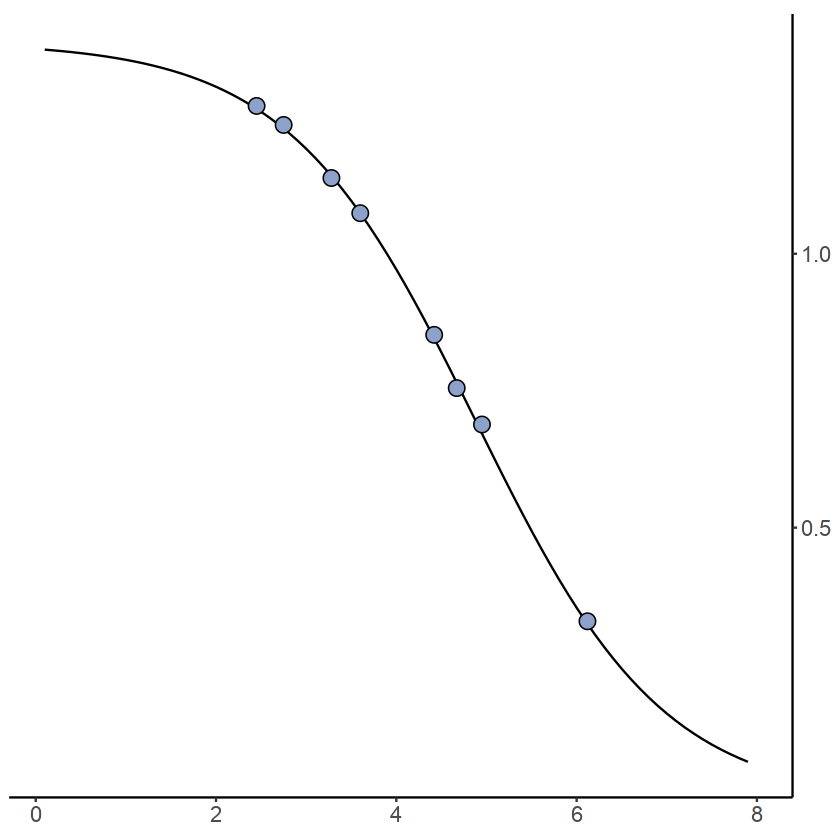

In [25]:
# 	1.	Graphique b1.1.1 :
# 	•	Titre : Taux de croissance en fonction du temps.
# 	•	Ce graphique montre le taux de croissance (générations par heure, gph) calculé par la fonction doublingrate en fonction du temps (t), avec une courbe lissée de ce taux de croissance. Des points sont ajoutés pour les valeurs observées à certains moments spécifiques (heure hour).


b1.1.1 <- ggplot(GpHb, aes(x = t, y = gph)) +
  geom_line() +
  geom_point(data = GpHb_data, aes(x = t, y = gph), size = 4, fill = "#8CA2CB", shape = 21) +
  ylab("growth rate (generations/hour)") +
  xlab("time (hours)") +
  scale_y_continuous(position = "right") +
  theme(
    panel.background = element_rect(fill = 'transparent'),
    plot.background = element_rect(fill = 'transparent', color = NA),
    panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
    axis.line = element_line(size = 0.5, color = "black"),
    aspect.ratio = 1,
    text = element_text(size=16),
    axis.title = element_blank()
  ) +
  NoLegend()
b1.1.1

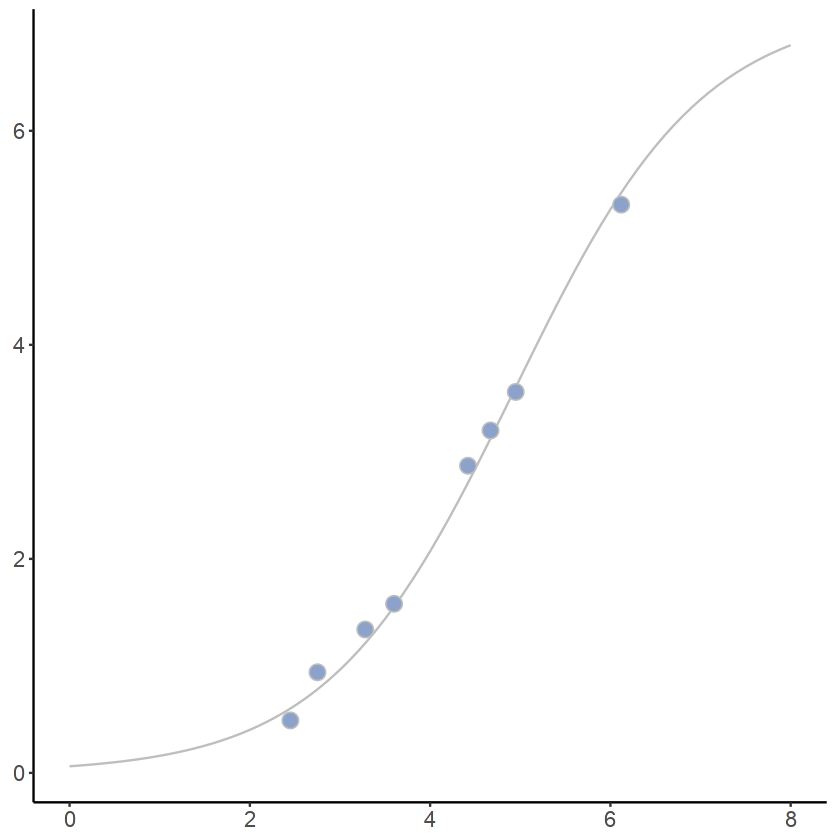

In [26]:
# 	2.	Graphique b1.1.2 :
# 	•	Titre : Densité cellulaire en fonction du temps.
# 	•	Ce graphique montre la densité cellulaire (mesurée par OD600), qui représente l’absorbance à 600 nm, en fonction du temps (t). Les valeurs ajustées à partir du modèle sigmoïde sont tracées, avec des points indiquant les valeurs réelles mesurées à certains moments du temps.

b1.1.2 <- ggplot(cell_density, aes(x = t, y = cpml)) +
  geom_line(color = "gray") +
  geom_point(data = cell_dens_data, aes(x = t, y = cpml), size = 4, fill = "#8CA2CB", shape = 21, color = "gray") +
  ylab("growth rate (generations/hour)") +
  xlab("time (hours)") +
  theme(
    panel.background = element_rect(fill = 'transparent'),
    plot.background = element_rect(fill = 'transparent', color = NA),
    panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
    axis.line = element_line(size = 0.5, color = "black"),
    aspect.ratio = 1,
    text = element_text(size=16),
    axis.title = element_blank()
  ) +
  NoLegend()
b1.1.2


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


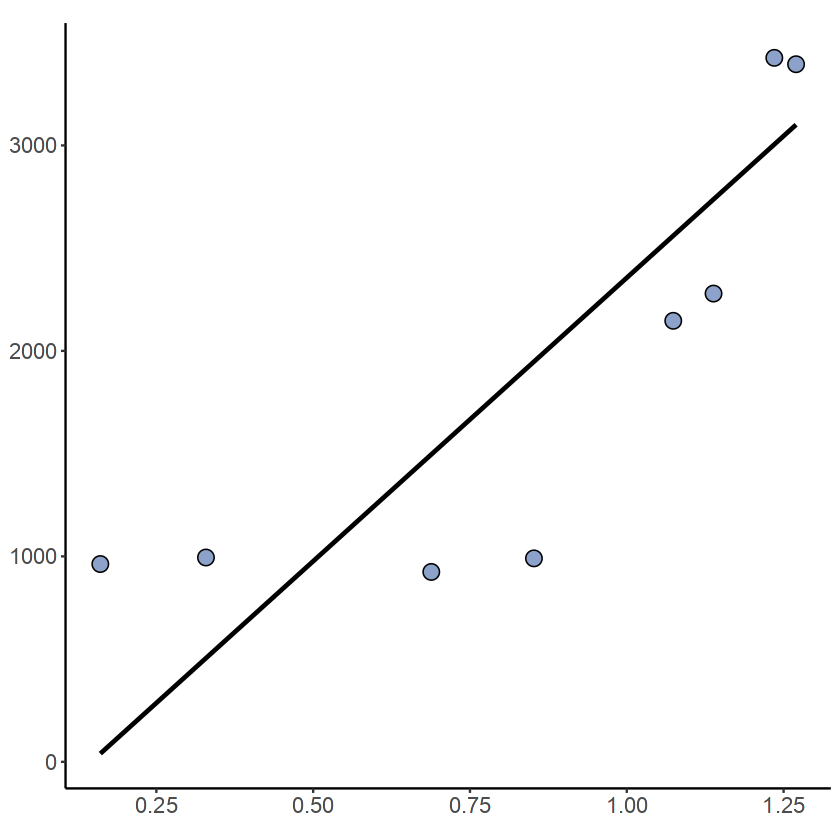

In [27]:


# 	3.	Graphique b1.2 :
# 	•	Titre : Relation entre le taux de croissance et la quantité d’ARN ribosomique par cellule.
# 	•	Ce graphique examine la relation entre le taux de croissance (en générant GpH) et la quantité d’ARN ribosomique (rRNA) par cellule. Les points moyens (en fonction de GpH) sont visualisés et un modèle linéaire est ajusté pour montrer cette relation.

b1.2 <- ggplot(odRNAb.m15, aes(x = GpH, y = rRNA, fill = factor(GpH))) +
  stat_summary(fun = mean, geom = "point", size = 4, fill = "#8CA2CB", shape = 21) +
  geom_smooth(aes(fill = GpH), method = "lm", se = FALSE, color = "black") +
  ylab("mean rRNA counts/cell") +
  xlab("growth rate (generations/hour)") +
  scale_fill_manual(values = c("#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB")) +
  theme(
    panel.background = element_rect(fill = 'transparent'),
    plot.background = element_rect(fill = 'transparent', color = NA),
    axis.line = element_line(size = 0.5, color = "black"),
    aspect.ratio = 1,
    text = element_text(size=16),
    axis.title = element_blank()
  ) +
  NoLegend()
b1.2

In [28]:
x <- c(mean(m15OD0.5.RNA$GpH), 
       mean(m15OD1.0.RNA$GpH), 
       mean(m15OD1.3.RNA$GpH), 
       mean(m15OD1.6.RNA$GpH),
       mean(m15OD2.8.RNA$GpH),
       mean(m15OD3.6.RNA$GpH),
       mean(m15OD5.3.RNA$GpH),
       mean(m15OD6.0.RNA$GpH))

y <- c(mean(m15OD0.5.RNA$rRNA), 
       mean(m15OD1.0.RNA$rRNA), 
       mean(m15OD1.3.RNA$rRNA), 
       mean(m15OD1.6.RNA$rRNA),
       mean(m15OD2.8.RNA$rRNA),
       mean(m15OD3.6.RNA$rRNA),
       mean(m15OD5.3.RNA$rRNA),
       mean(m15OD6.0.RNA$rRNA))

summary(lm(y~x))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-917.96 -342.82  -13.41  555.44  691.54 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)    70.71     543.89   0.130   0.9008  
x            2156.69     584.73   3.688   0.0102 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 648.6 on 6 degrees of freedom
Multiple R-squared:  0.6939,	Adjusted R-squared:  0.6429 
F-statistic:  13.6 on 1 and 6 DF,  p-value: 0.01023


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”



Call:
lm(formula = log10(odRNAb.m15$rRNA) ~ odRNAb.m15$GpH)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59370 -0.25788 -0.02237  0.21839  1.10481 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.75197    0.01993  138.09   <2e-16 ***
odRNAb.m15$GpH  0.47244    0.01761   26.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3223 on 5459 degrees of freedom
Multiple R-squared:  0.1165,	Adjusted R-squared:  0.1164 
F-statistic:   720 on 1 and 5459 DF,  p-value: < 2.2e-16


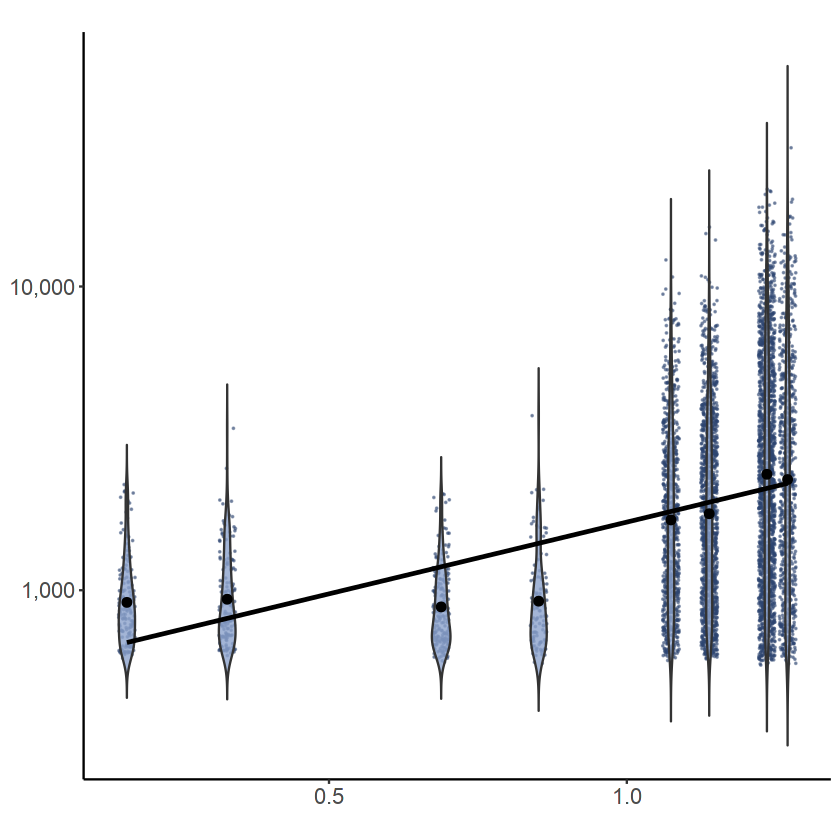

In [29]:
# 	4.	Graphique b1.3 :
# 	•	Titre : Distribution de log10(rRNA) en fonction du taux de croissance.
# 	•	Ce graphique montre la distribution de la quantité d’ARN ribosomique en utilisant log10(rRNA) en fonction du taux de croissance (GpH). Il combine un graphique de type violon (distribution des données) avec des points de résumé pour la moyenne et une ligne de régression linéaire ajustée.

# Ces graphiques sont générés de manière transparente avec un fond et des axes stylisés, et certains ont des ajustements spécifiques comme l’absence de légende ou une échelle log pour l’axe des ordonnées.

b1.3 <- ggplot(odRNAb.m15, aes(x = GpH, y = log10(rRNA), fill = factor(GpH))) +
  geom_jitter(aes(color = "#2c4470"), alpha = 0.5, size = 0.01) +
  geom_violin(trim = FALSE, alpha = 0.8) +
  stat_summary(fun = mean, geom = "point", size = 2) +
  geom_smooth(aes(fill = GpH), method = "lm", se = FALSE, color = "black") +
  ylab("log10(rRNA counts/cell)") +
  xlab("growth rate (generations/hour)") +
  scale_fill_manual(values = c("#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB")) +
  scale_color_manual(values = c("#2c4470")) +
  theme(
    panel.background = element_rect(fill = 'transparent'),
    plot.background = element_rect(fill = 'transparent', color = NA),
    axis.line = element_line(size = 0.5, color = "black"),
    aspect.ratio = 1,
    text = element_text(size=16),
    axis.title = element_blank()
  ) +
  scale_y_continuous(breaks = c(2,3,4,5),labels = c("100","1,000", "10,000", "100,000")) +
  NoLegend()
b1.3

summary(lm(log10(odRNAb.m15$rRNA)~odRNAb.m15$GpH))




In [30]:
# Sauvegarde des objects seurats
#d'abord verrif de la presence des objets
ls()
#Creation d'un dossier pour les objets seurats
dir.create("7_Article/results/Seurat")

# Sauvegarde des objets Seurat sans les conditions 
saveRDS(GEO660.nr, "7_Article/results/Seurat/GEO660.nr.rds")
saveRDS(GEO660, "7_Article/results/Seurat/GEO660.rds")
saveRDS(GEO661.nr, "7_Article/results/Seurat/GEO661.nr.rds")
saveRDS(GEO661, "7_Article/results/Seurat/GEO661.rds")



# Sauvegarde des objets Seurat pour les données brutes avec tous les types d'ARN 
saveRDS(growcurvb.m15, "7_Article/results/Seurat/growcurvb.m15.rds")
saveRDS(growcurvb.m14, "7_Article/results/Seurat/growcurvb.m14.rds")

# Sauvegarde des objets Seurat pour les données brutes sans les rRNA
saveRDS(growcurvb.nr.m15, "7_Article/results/Seurat/growcurvb.nr.m15.rds")
saveRDS(growcurvb.nr.m14, "7_Article/results/Seurat/growcurvb.nr.m14.rds")


# Sauvegarde des objets Seurat
#ici les objets normalisés et mis à l'échelle des mRNAs
saveRDS(OD0.5.nr.m14.int, "7_Article/results/Seurat/OD0.5.nr.m14.int.rds")
saveRDS(OD1.0.nr.m14.int, "7_Article/results/Seurat/OD1.0.nr.m14.int.rds")
saveRDS(OD1.7.nr.m14.int, "7_Article/results/Seurat/OD1.7.nr.m14.int.rds")
saveRDS(OD2.0.nr.m14.int, "7_Article/results/Seurat/OD2.0.nr.m14.int.rds")
saveRDS(OD2.8.nr.m14.int, "7_Article/results/Seurat/OD2.8.nr.m14.int.rds")
saveRDS(OD3.2.nr.m14.int, "7_Article/results/Seurat/OD3.2.nr.m14.int.rds")


saveRDS(OD0.5.nr.m15.int, "7_Article/results/Seurat/OD0.5.nr.m15.int.rds")
saveRDS(OD1.0.nr.m15.int, "7_Article/results/Seurat/OD1.0.nr.m15.int.rds")
saveRDS(OD1.3.nr.m15.int, "7_Article/results/Seurat/OD1.3.nr.m15.int.rds")
saveRDS(OD1.6.nr.m15.int, "7_Article/results/Seurat/OD1.6.nr.m15.int.rds")
saveRDS(OD2.8.nr.m15.int, "7_Article/results/Seurat/OD2.8.nr.m15.int.rds")
saveRDS(OD3.6.nr.m15.int, "7_Article/results/Seurat/OD3.6.nr.m15.int.rds")
saveRDS(OD5.3.nr.m15.int, "7_Article/results/Seurat/OD5.3.nr.m15.int.rds")
saveRDS(OD6.0.nr.m15.int, "7_Article/results/Seurat/OD6.0.nr.m15.int.rds")



# if (file.exists(fichier_seurat2)) {
#     # Obtenir les informations sur le fichier
#     info_fichier2 <- file.info(fichier_seurat2)
    
#     # Afficher les informations
#     cat("✓ Fichier créé avec succès :", fichier_seurat2, "\n")
#     cat("Taille du fichier :", round(info_fichier2$size/1024/1024, 2), "MB\n")
#     cat("Date de création :", format(info_fichier2$mtime, "%Y-%m-%d %H:%M:%S"), "\n")
    
#     # Afficher les dimensions de l'objet Seurat
#     cat("\nInformations sur l'objet Seurat :\n")
#     cat("Nombre de cellules :", ncol(seurat_object_raw), "\n")
#     cat("Nombre de gènes :", nrow(seurat_object_raw), "\n")
# } else {
#     cat("❌ Erreur : Le fichier n'a pas été créé.")
# }

[1] "assign_cell_wells"                   "assign_metadata_bacteria_M14"       
 [3] "assign_metadata_bacteria_M15"        "assign_RNA_types_b"                 
 [5] "b1.1.1"                              "b1.1.2"                             
 [7] "b1.2"                                "b1.3"                               
 [9] "cell_dens_data"                      "cell_density"                       
[11] "convert_gene_names_bacteria"         "create_seurat_object_from_seq_files"
[13] "diagnose_seurat_objects"             "doublingrate"                       
[15] "fitb"                                "GEO660"                             
[17] "GEO660.nr"                           "GEO661"                             
[19] "GEO661.nr"                           "GpHb"                               
[21] "GpHb_data"                           "growcurvb.m14"                      
[23] "growcurvb.m15"                       "growcurvb.nr.m14"                   
[25] "growcurvb.nr.m15"                    "hour"                               
[27] "kb"                                  "Lb"                                 
[29] "m14OD0.5.RNA"                        "m14OD1.0.RNA"                       
[31] "m14OD1.7.RNA"                        "m14OD2.0.RNA"                       
[33] "m14OD2.8.RNA"                        "m14OD3.2.RNA"                       
[35] "m15OD0.5.RNA"                        "m15OD1.0.RNA"                       
[37] "m15OD1.3.RNA"                        "m15OD1.6.RNA"                       
[39] "m15OD2.8.RNA"                        "m15OD3.6.RNA"                       
[41] "m15OD5.3.RNA"                        "m15OD6.0.RNA"                       
[43] "OD0.5.m14"                           "OD0.5.m15"                          
[45] "OD0.5.nr.m14"                        "OD0.5.nr.m14.int"                   
[47] "OD0.5.nr.m15"                        "OD0.5.nr.m15.int"                   
[49] "OD1.0.m14"                           "OD1.0.m15"                          
[51] "OD1.0.nr.m14"                        "OD1.0.nr.m14.int"                   
[53] "OD1.0.nr.m15"                        "OD1.0.nr.m15.int"                   
[55] "OD1.3.m15"                           "OD1.3.nr.m15"                       
[57] "OD1.3.nr.m15.int"                    "OD1.6.m15"                          
[59] "OD1.6.nr.m15"                        "OD1.6.nr.m15.int"                   
[61] "OD1.7.m14"                           "OD1.7.nr.m14"                       
[63] "OD1.7.nr.m14.int"                    "OD2.0.m14"                          
[65] "OD2.0.nr.m14"                        "OD2.0.nr.m14.int"                   
[67] "OD2.8.m14"                           "OD2.8.m15"                          
[69] "OD2.8.nr.m14"                        "OD2.8.nr.m14.int"                   
[71] "OD2.8.nr.m15"                        "OD2.8.nr.m15.int"                   
[73] "OD3.2.m14"                           "OD3.2.nr.m14"                       
[75] "OD3.2.nr.m14.int"                    "OD3.6.m15"                          
[77] "OD3.6.nr.m15"                        "OD3.6.nr.m15.int"                   
[79] "OD5.3.m15"                           "OD5.3.nr.m15"                       
[81] "OD5.3.nr.m15.int"                    "OD6.0.m15"                          
[83] "OD6.0.nr.m15"                        "OD6.0.nr.m15.int"                   
[85] "OD600"                               "odRNAb.m14"                         
[87] "odRNAb.m15"                          "round_one_bc_collapse"              
[89] "scale_normalize_seurat_data"         "x"                                  
[91] "x0b"                                 "xb"                                 
[93] "y"

Warning message in dir.create("7_Article/results/Seurat"):
“'7_Article/results/Seurat' already exists”


`geom_smooth()` using formula = 'y ~ x'


Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


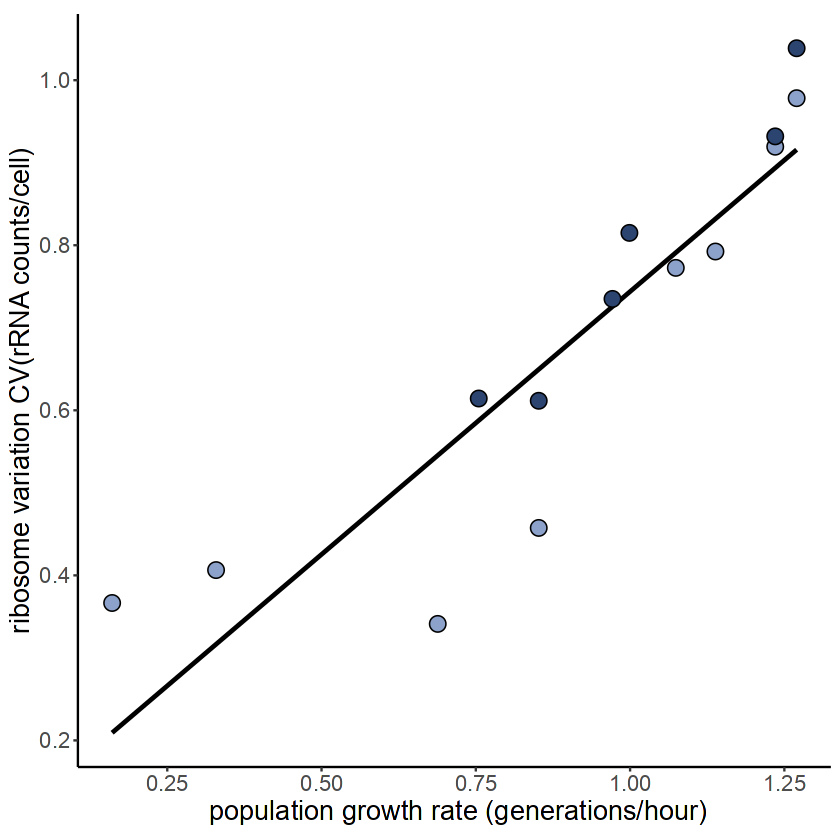

In [31]:


#--Figure 2-----------------------------------------------------------------------------

###======> doit conrespondre à la figure 3 c de l'article 

#1. Graphique b2.1 : Variation du coefficient de variation des ARN ribosomiques


# b2.1 <- ggplot(odRNAb.m15, aes(x = GpH, y = rcv, fill = factor(GpH))) +
#   stat_summary(fun = mean, geom = "point", size = 4, fill = "#8CA2CB", shape = 21) +
#   geom_smooth(aes(fill = GpH), method = "lm", se = FALSE, color = "black") +
#   stat_summary(data = odRNAb.m14, aes(x = GpH, y = rcv, fill = factor(GpH)), fun = mean, geom = "point", size = 4, fill = "#2c4470", shape = 21) +
#   ylab("ribosome variation CV(rRNA counts/cell)") +
#   xlab("growth rate (generations/hour)") +
#   theme(
#     panel.background = element_rect(fill = 'transparent'),
#     plot.background = element_rect(fill = 'transparent', color = NA),
#     axis.line = element_line(size = 0.5, color = "black"),
#     aspect.ratio = 1,
#     text = element_text(size=16),
#     axis.title = element_blank()
#   ) +
#   NoLegend() +
#   xlab("population GR") +
#   ylab("rRNA counts/cell CV")
# b2.1



b2.1 <- ggplot(odRNAb.m15, aes(x = GpH, y = rcv, fill = factor(GpH))) +
  stat_summary(fun = mean, geom = "point", size = 4, fill = "#8CA2CB", shape = 21) +
  geom_smooth(aes(fill = GpH), method = "lm", se = FALSE, color = "black") +
  stat_summary(data = odRNAb.m14, aes(x = GpH, y = rcv, fill = factor(GpH)), fun = mean, geom = "point", size = 4, fill = "#2c4470", shape = 21) +
  ylab("ribosome variation CV(rRNA counts/cell)") +
  xlab(" population growth rate (generations/hour)") +
  theme(
    panel.background = element_rect(fill = 'transparent'),
    plot.background = element_rect(fill = 'transparent', color = NA),
    axis.line = element_line(size = 0.5, color = "black"),
    aspect.ratio = 1,
    text = element_text(size=16)
  ) +
  NoLegend()
b2.1



# Graphique b2.1 :
# 	•	Axe des y : Le graphique montre la variation du coefficient de variation (CV) des comptages d’ARN ribosomiques par cellule (rcv). Le rcv est une mesure qui reflète la variation relative des comptages d’ARN ribosomiques dans les cellules.
# 	•	Axe des x : Il s’agit du taux de croissance de la population en générations par heure (GpH).
# 	•	But : Ce graphique examine si la variation des comptages d’ARN ribosomiques (rRNA) au niveau cellulaire est liée au taux de croissance de la population. Le coefficient de variation des rRNA par cellule est représenté en fonction du taux de croissance de la population.



`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


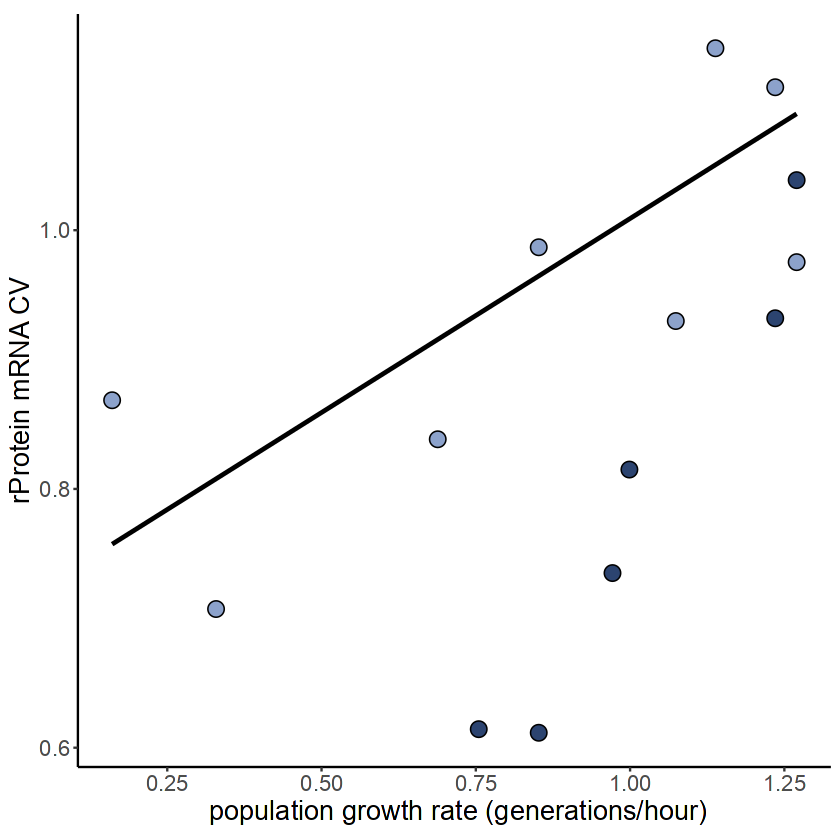

In [32]:



b2.2 <- ggplot(odRNAb.m15, aes(x = GpH, y = rpcv, fill = factor(GpH))) +
  stat_summary(fun = mean, geom = "point", size = 4, fill = "#8CA2CB", shape = 21) +
  geom_smooth(aes(fill = GpH), method = "lm", se = FALSE, color = "black") +
  stat_summary(data = odRNAb.m14, aes(x = GpH, y = rcv, fill = factor(GpH)), fun = mean, geom = "point", size = 4, fill = "#2c4470", shape = 21) +
  xlab("growth rate (generations/hour)") +
  theme(
    panel.background = element_rect(fill = 'transparent'),
    plot.background = element_rect(fill = 'transparent', color = NA),
    axis.line = element_line(size = 0.5, color = "black"),
    aspect.ratio = 1,
    text = element_text(size=16),
  ) +
  NoLegend() +
  ylab("rProtein mRNA CV") +
   xlab(" population growth rate (generations/hour)") 
b2.2

# Graphique b2.2 :
# 	•	Axe des y : Ce graphique montre la variation du coefficient de variation (CV) des mRNA des protéines ribosomiques par cellule (rpcv). Le rpcv est une mesure similaire, mais elle concerne spécifiquement les mRNA des protéines ribosomiques (par opposition aux ARN ribosomiques dans le graphique précédent).
# 	•	Axe des x : Comme dans b2.1, l’axe des x représente le taux de croissance de la population en générations par heure (GpH).
# 	•	But : Ce graphique examine si la variation des mRNA des protéines ribosomiques au niveau cellulaire est liée au taux de croissance de la population.



In [ ]:


#--Figure 3---------------------------------------------------------------------
OD1.0.nr.m15.clust <- find_neighbors_clusters(OD1.0.nr.m15.int, 10, 0.1)

OD1.0.nr.m15.clust$rRNA <- m15OD1.0.RNA$rRNA




Computing nearest neighbor graph



Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1817
Number of edges: 70960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9309
Number of communities: 2
Elapsed time: 0 seconds


14:59:45 UMAP embedding parameters a = 0.9922 b = 1.112

14:59:45 Read 1817 rows and found 10 numeric columns

14:59:45 Using Annoy for neighbor search, n_neighbors = 30

14:59:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:59:45 Writing NN index file to temp file /tmp/RtmpBQTVZM/file2ef4a5fcab810

14:59:45 Searching Annoy index using 1 thread, search_k = 3000

14:59:45 Annoy recall = 100%

14:59:46 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:59:46 Initializing from normalized Laplacian + noise (using RSpectra)

14:59:46 Commencing optimization for 500 epochs, with 78608 positive edges

14:59:49 Optimization finished



In [ ]:
OD1.3.nr.m15.clust <- find_neighbors_clusters(OD1.3.nr.m15.int, 10, 0.1)
OD1.3.nr.m15.clust$rRNA <- m15OD1.3.RNA$rRNA



Computing nearest neighbor graph



Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1404
Number of edges: 56816

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9433
Number of communities: 2
Elapsed time: 0 seconds


15:01:05 UMAP embedding parameters a = 0.9922 b = 1.112

15:01:05 Read 1404 rows and found 10 numeric columns

15:01:05 Using Annoy for neighbor search, n_neighbors = 30

15:01:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:01:06 Writing NN index file to temp file /tmp/RtmpBQTVZM/file2ef4a241fc5df

15:01:06 Searching Annoy index using 1 thread, search_k = 3000

15:01:06 Annoy recall = 100%

15:01:06 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:01:07 Initializing from normalized Laplacian + noise (using RSpectra)

15:01:07 Commencing optimization for 500 epochs, with 57704 positive edges

15:01:09 Optimization finished



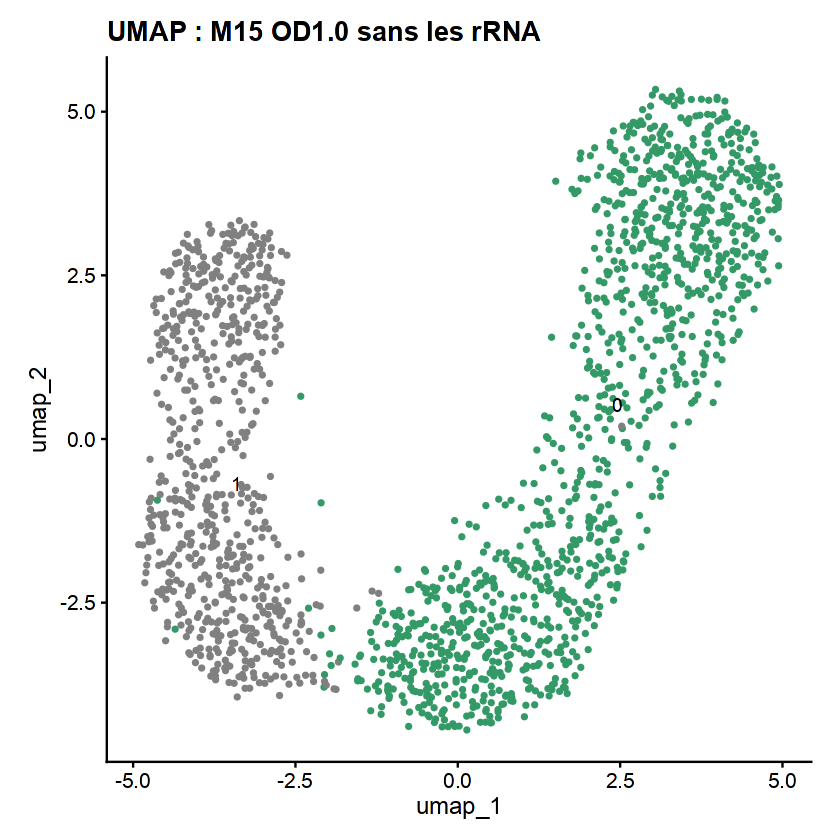

In [59]:
#UMAP :  M15 OD1.0 sans les rRNA

b3.1 <- DimPlot(OD1.0.nr.m15.clust, reduction = "umap", label = TRUE, repel = TRUE, pt.size = 1) + 
  NoLegend() + 
  theme(aspect.ratio = 1) +
  scale_color_manual(values = c("#339966", "#808080")) +
  ggtitle("UMAP : M15 OD1.0 sans les rRNA")
b3.1


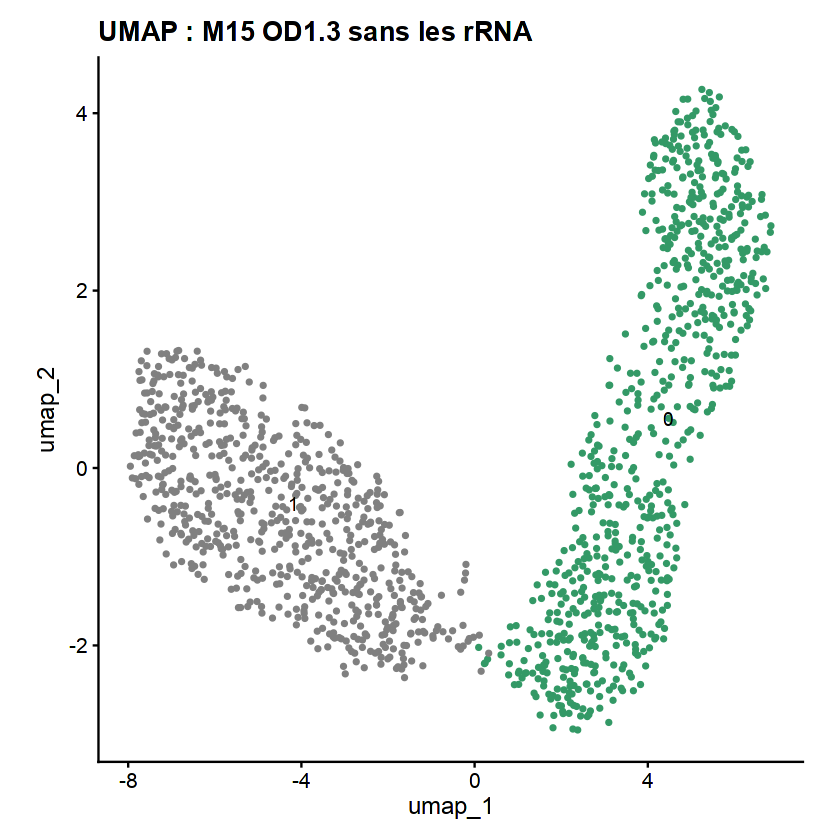

In [58]:
#UMAP : M15 OD1.3 sans les rRNA

b3.2 <- DimPlot(OD1.3.nr.m15.clust, reduction = "umap", label = TRUE, repel = TRUE, pt.size = 1) + 
  NoLegend() + 
  theme(aspect.ratio = 1) +
  scale_color_manual(values = c("#339966", "#808080")) +
  ggtitle("UMAP : M15 OD1.3 sans les rRNA")
b3.2

In [63]:
OD1.0.m15.zero <- subset(OD1.0.nr.m15.clust, subset = seurat_clusters == 0)
OD1.0.m15.one <- subset(OD1.0.nr.m15.clust, subset = seurat_clusters == 1)

OD1.0.m15.01 <- rbind(data.frame(rRNA = OD1.0.m15.zero$rRNA, cluster = 0), 
                 data.frame(rRNA = OD1.0.m15.one$rRNA, cluster = 1))

OD1.3.m15.zero <- subset(OD1.3.nr.m15.clust, subset = seurat_clusters == 0)
OD1.3.m15.one <- subset(OD1.3.nr.m15.clust, subset = seurat_clusters == 1)

OD1.3.m15.01 <- rbind(data.frame(rRNA = OD1.3.m15.zero$rRNA, cluster = 0), 
                  data.frame(rRNA = OD1.3.m15.one$rRNA, cluster = 1))


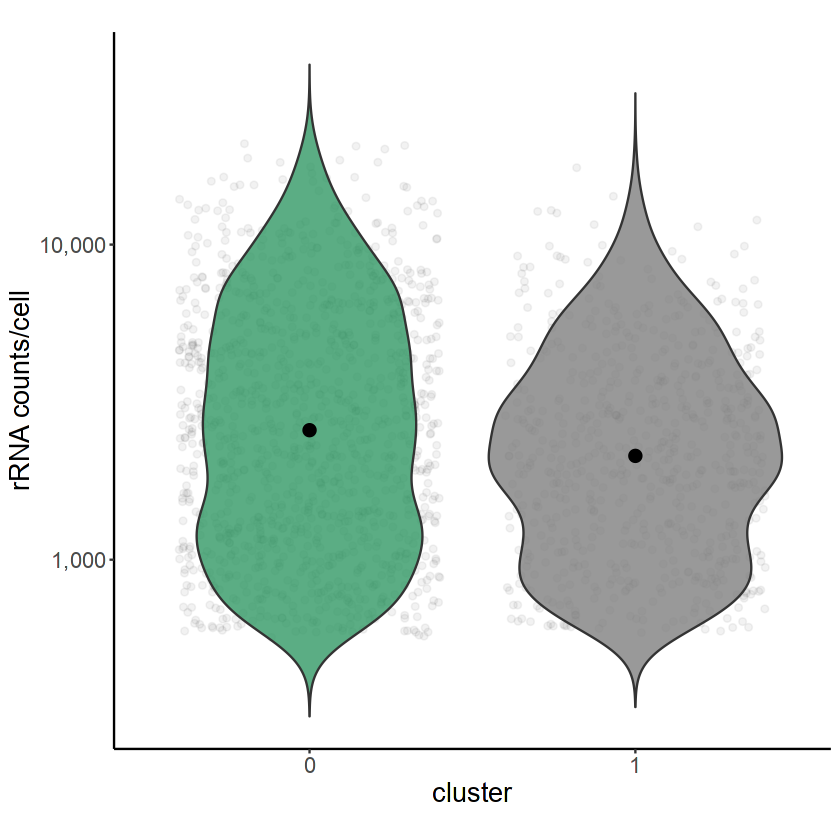

In [64]:
b3.2 <- ggplot(OD1.0.m15.01, aes(x = as.factor(cluster), y = log10(rRNA), fill = as.factor(cluster))) +
  geom_jitter(alpha = 0.05) +
  #geom_boxplot(notch = TRUE, alpha = 0.8) +
  geom_violin(trim = FALSE, alpha = 0.8) +
  stat_summary(fun = mean, geom = "point", size = 3) +
  scale_fill_manual(values = c("#339966", "#808080")) +
  theme_classic() +
  ylab("rRNA counts/cell") +
  xlab("cluster") +
  theme(
    panel.background = element_rect(fill = 'transparent'),
    plot.background = element_rect(fill = 'transparent', color = NA),
    axis.line = element_line(size = 0.5, color = "black"),
    aspect.ratio = 1,
    text = element_text(size=16)#,
    #axis.title = element_blank()
  ) +
  scale_y_continuous(breaks = c(3,4,5),labels = c("1,000", "10,000", "100,000")) +
  NoLegend()
b3.2


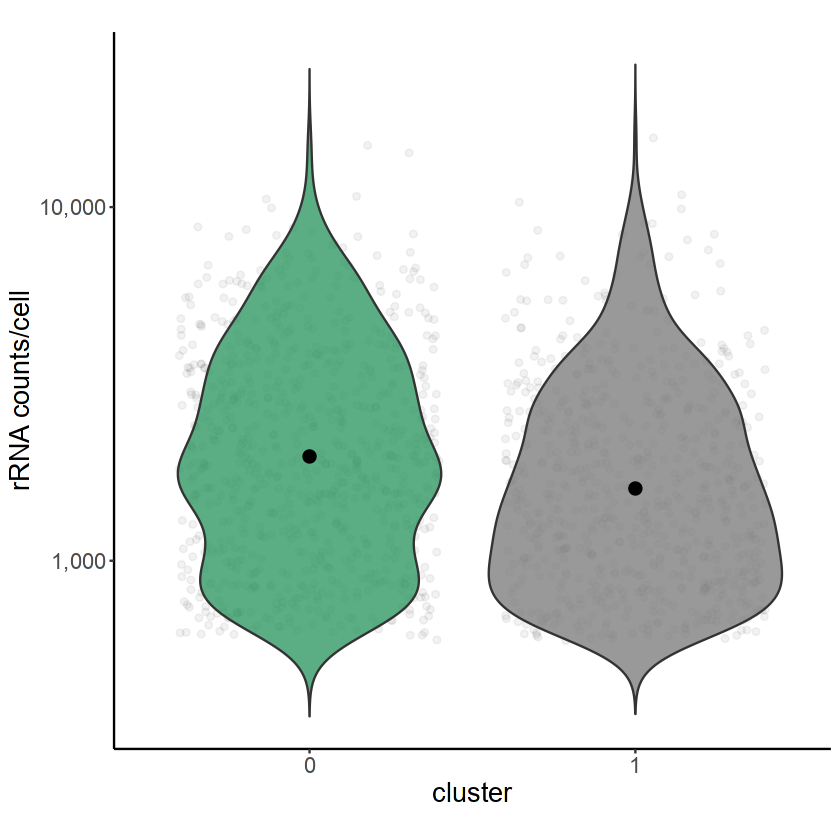

In [65]:
b3.4 <- ggplot(OD1.3.m15.01, aes(x = as.factor(cluster), y = log10(rRNA), fill = as.factor(cluster))) +
  geom_jitter(alpha = 0.05) +
  #geom_boxplot(notch = TRUE, alpha = 0.8) +
  geom_violin(trim = FALSE, alpha = 0.8) +
  stat_summary(fun = mean, geom = "point", size = 3) +
  scale_fill_manual(values = c("#339966", "#808080")) +
  theme_classic() +
  ylab("rRNA counts/cell") +
  xlab("cluster") +
  theme(
    panel.background = element_rect(fill = 'transparent'),
    plot.background = element_rect(fill = 'transparent', color = NA),
    axis.line = element_line(size = 0.5, color = "black"),
    aspect.ratio = 1,
    text = element_text(size=16)#,
    #axis.title = element_blank()
  ) +
  scale_y_continuous(breaks = c(3,4,5),labels = c("1,000", "10,000", "100,000")) +
  NoLegend()
b3.4

In [66]:

t.test(log10(OD1.0.m15.zero$rRNA),log10(OD1.0.m15.zero$rRNA))



	Welch Two Sample t-test

data:  log10(OD1.0.m15.zero$rRNA) and log10(OD1.0.m15.zero$rRNA)
t = 0, df = 2332, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03095891  0.03095891
sample estimates:
mean of x mean of y 
 3.410971  3.410971 


In [67]:
differentially_expressed_genes(OD1.0.nr.m15.clust)
differentially_expressed_genes(OD1.3.nr.m15.clust)

Calculating cluster 0

Calculating cluster 1



                 p_val avg_log2FC pct.1 pct.2     p_val_adj cluster     gene
bs-yvzJ   7.535040e-19   7.023679 0.119 0.003  3.385493e-15       0  bs-yvzJ
bs-bglH  7.827514e-109   4.306908 0.621 0.095 3.516902e-105       0  bs-bglH
bs-manP  2.752156e-190   4.142998 0.859 0.192 1.236544e-186       0  bs-manP
bs-bglP   1.652151e-99   4.020300 0.610 0.122  7.423115e-96       0  bs-bglP
bs-yjdF   2.337880e-65   4.002113 0.422 0.043  1.050409e-61       0  bs-yjdF
bs-manA  7.883895e-168   3.725287 0.821 0.182 3.542234e-164       0  bs-manA
bs-maeN   2.772902e-13   3.530214 0.121 0.022  1.245865e-09       0  bs-maeN
bs-ykuH   7.949766e-10   3.022773 0.070 0.006  3.571830e-06       0  bs-ykuH
bs-pabC   1.802875e-09   2.977236 0.088 0.017  8.100316e-06       0  bs-pabC
bs-glpT   3.277665e-32   2.864468 0.278 0.048  1.472655e-28       0  bs-glpT
bs-glpQA  2.887140e-23   2.804463 0.219 0.043  1.297192e-19       0 bs-glpQA
bs-manR   1.397126e-47   2.710045 0.439 0.118  6.277285e-44       0  bs-manR

Calculating cluster 0

Calculating cluster 1



                        p_val avg_log2FC pct.1 pct.2     p_val_adj cluster
bs-gswA          6.147855e-14  10.863855 0.081 0.000  2.762231e-10       0
bs-ptsG          2.842162e-82   6.168037 0.460 0.014  1.276984e-78       0
bs-rpmD          5.516657e-21   4.327596 0.143 0.008  2.478634e-17       0
bs-treP          1.885372e-24   4.218014 0.203 0.029  8.470975e-21       0
bs-rplX          3.551984e-33   4.195654 0.238 0.020  1.595906e-29       0
bs-infA          9.581628e-32   3.943870 0.238 0.024  4.305025e-28       0
bs-rplL          1.286236e-12   3.928682 0.110 0.017  5.779058e-09       0
bs-rplF          4.223508e-56   3.879047 0.388 0.039  1.897622e-52       0
bs-treA          8.338886e-29   3.870807 0.246 0.039  3.746662e-25       0
bs-rpsH          2.465872e-62   3.774470 0.422 0.039  1.107916e-58       0
bs-rpsE          2.484912e-40   3.690762 0.292 0.027  1.116471e-36       0
bs-rplO          6.864499e-41   3.667368 0.310 0.038  3.084219e-37       0
bs-rpmC          2.633846

In [68]:
#--Figure 4---------------------------------------------------------------------

rRNAquarts <- function(odRNA){
  GpH <- levels(as.factor(odRNA$GpH))
  
  mins <- c()
  maxs <- c()
  
  for (i in 1:length(GpH)) {
    rRNA <- odRNA$rRNA[which(odRNA$GpH == GpH[i])]
    
    mins[i] <- min(rRNA)
    maxs[i] <- max(rRNA)
  }
  
  maxmins = max(mins)
  minmaxs = min(maxs)
  
  rRNArange <- odRNA$rRNA[which(odRNA$rRNA >= maxmins & odRNA$rRNA <= minmaxs)]
  names.r1 <- data.frame(names = row.names(odRNA[which(odRNA$rRNA >= summary(rRNArange)[1] & odRNA$rRNA < summary(rRNArange)[2]),]), quartile = 1)
  names.r2 <- data.frame(names = row.names(odRNA[which(odRNA$rRNA >= summary(rRNArange)[2] & odRNA$rRNA < summary(rRNArange)[3]),]), quartile = 2)
  names.r3 <- data.frame(names = row.names(odRNA[which(odRNA$rRNA >= summary(rRNArange)[3] & odRNA$rRNA < summary(rRNArange)[5]),]), quartile = 3)
  names.r4 <- data.frame(names = row.names(odRNA[which(odRNA$rRNA >= summary(rRNArange)[5] & odRNA$rRNA < summary(rRNArange)[6]),]), quartile = 4)
  
  quartile_bcs <- rbind(names.r1, names.r2, names.r3, names.r4)
  
  return(quartile_bcs)
}



In [70]:
#bacteria

quartiles <- rRNAquarts(odRNAb.m15)

bQ1.m15 <- growcurvb.nr.m15[,which(colnames(growcurvb.nr.m15@assays$RNA) %in% quartiles$names[which(quartiles$quartile == 1)])]
bQ4.m15 <- growcurvb.nr.m15[,which(colnames(growcurvb.nr.m15@assays$RNA) %in% quartiles$names[which(quartiles$quartile == 4)])]


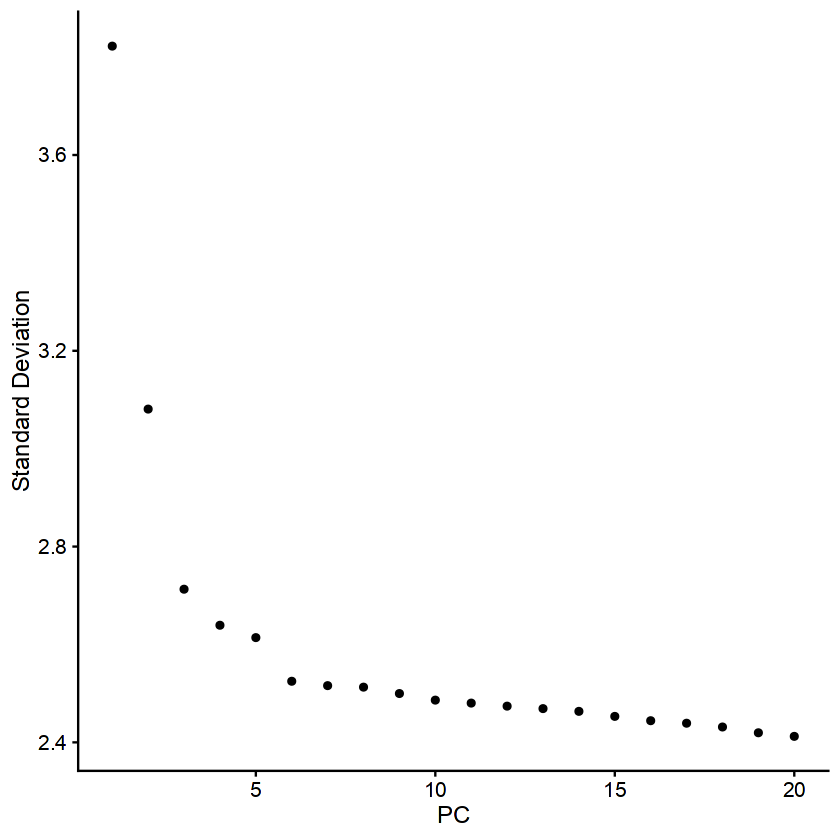

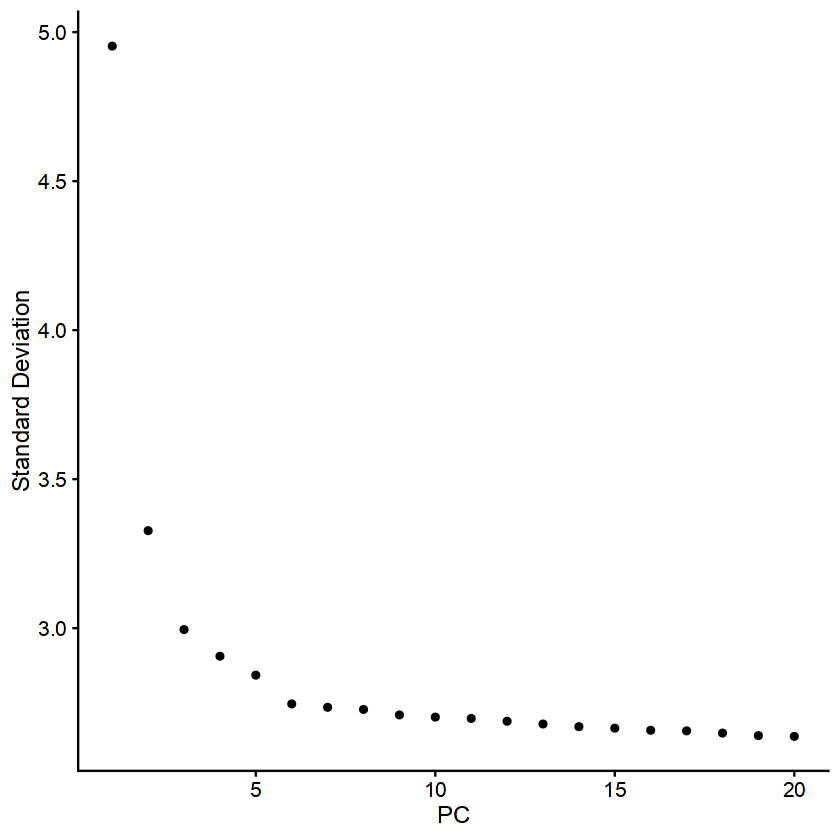

In [ ]:

bQ1.m15.int <- scale_normalize_seurat_data(bQ1.m15, 3000, 20, NULL)
bQ4.m15.int <- scale_normalize_seurat_data(bQ4.m15, 3000, 20, NULL)

In [72]:

bQ1.m15.clustered <- find_neighbors_clusters(bQ1.m15.int, 10, 0.2)
bQ4.m15.clustered <- find_neighbors_clusters(bQ4.m15.int, 10, 0.1)



Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 782
Number of edges: 34547

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8893
Number of communities: 3
Elapsed time: 0 seconds


15:49:39 UMAP embedding parameters a = 0.9922 b = 1.112

15:49:39 Read 782 rows and found 10 numeric columns

15:49:39 Using Annoy for neighbor search, n_neighbors = 30

15:49:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:49:39 Writing NN index file to temp file /tmp/RtmpBQTVZM/file2ef4a32a86eb2

15:49:39 Searching Annoy index using 1 thread, search_k = 3000

15:49:39 Annoy recall = 100%

15:49:40 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:49:40 Initializing from normalized Laplacian + noise (using RSpectra)

15:49:40 Commencing optimization for 500 epochs, with 30222 positive edges

15:49:41 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 781
Number of edges: 33920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9450
Number of communities: 3
Elapsed time: 0 seconds


15:49:42 UMAP embedding parameters a = 0.9922 b = 1.112

15:49:42 Read 781 rows and found 10 numeric columns

15:49:42 Using Annoy for neighbor search, n_neighbors = 30

15:49:42 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:49:42 Writing NN index file to temp file /tmp/RtmpBQTVZM/file2ef4a377e372

15:49:42 Searching Annoy index using 1 thread, search_k = 3000

15:49:42 Annoy recall = 100%

15:49:43 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:49:43 Initializing from normalized Laplacian + noise (using RSpectra)

15:49:43 Commencing optimization for 500 epochs, with 29834 positive edges

15:49:44 Optimization finished



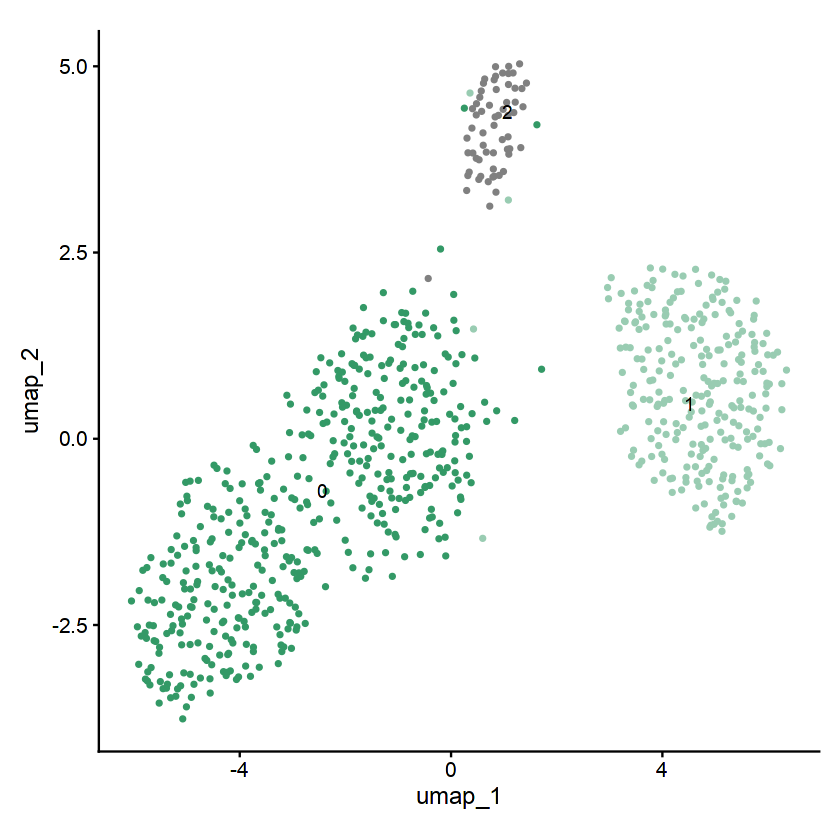

In [ ]:

b4.1 <- DimPlot(bQ4.m15.clustered, reduction = "umap", label = TRUE, repel = TRUE, pt.size = 1) + 
  NoLegend() + 
  theme(aspect.ratio = 1) + 
  scale_color_manual(values = c("#339966", "#99CCB2", "#808080"))
b4.1

In [74]:
differentially_expressed_genes(bQ4.m15.clustered)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



                       p_val avg_log2FC pct.1 pct.2    p_val_adj cluster
bs-gswA         1.323413e-07 10.5668878 0.084 0.000 5.946096e-04       0
bs-ptsG         7.684402e-36  6.5597164 0.404 0.009 3.452602e-32       0
bs-treP         5.718812e-15  4.7352562 0.239 0.038 2.569462e-11       0
bs-manA         8.917101e-31  4.7238136 0.398 0.038 4.006454e-27       0
bs-rplV         1.176284e-14  4.4076325 0.202 0.016 5.285045e-11       0
BSU-misc-RNA-47 1.205688e-06  4.2994680 0.086 0.006 5.417154e-03       0
bs-rpmC         7.875643e-25  4.2573169 0.329 0.025 3.538526e-21       0
bs-rpsNA        1.758035e-18  4.2085742 0.252 0.019 7.898852e-15       0
bs-rpmD         2.608687e-08  4.1250984 0.114 0.009 1.172083e-04       0
bs-rpsH         4.036082e-33  4.1232348 0.422 0.035 1.813412e-29       0
bs-treA         9.098886e-15  3.8932797 0.243 0.041 4.088130e-11       0
bs-rpsQ         2.832792e-31  3.7242893 0.424 0.047 1.272774e-27       0
bs-rpsJ         8.530082e-18  3.6952320 0.258 0.025

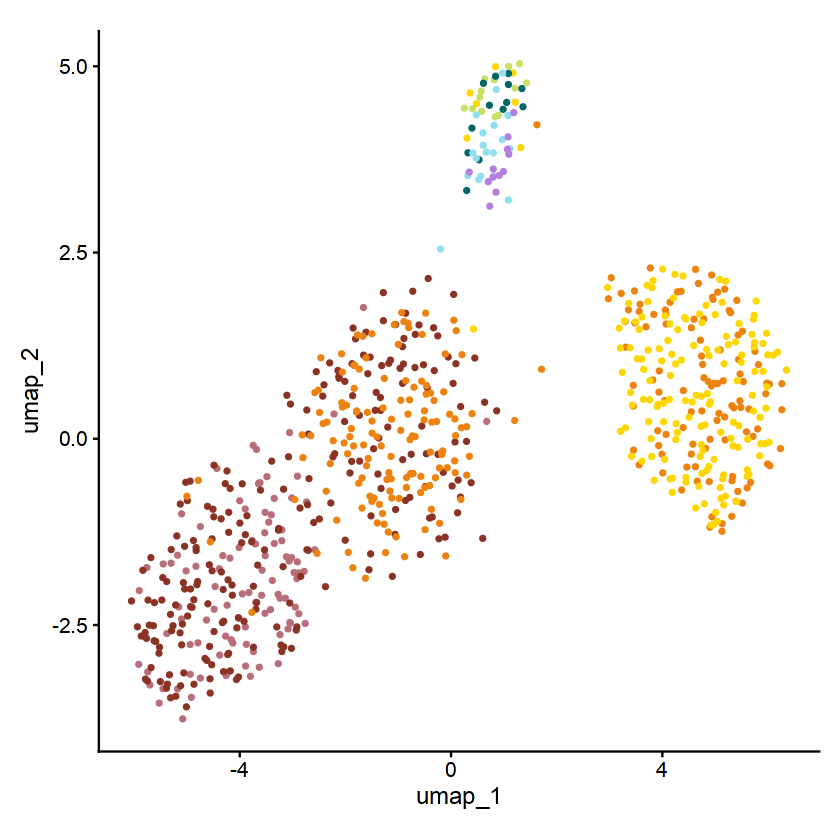

In [75]:
b4.2 <-DimPlot(bQ4.m15.clustered, reduction = "umap", group.by = "cond", label = FALSE, repel = TRUE, pt.size = 1) + 
  NoLegend() + 
  theme(aspect.ratio = 1) + 
  scale_color_manual(values = c("#B76E79","#8A3324","#ED820E","#FFD700","#C7E065","#006666","#90E0EF","#B47EDE")) + 
  labs(title = NULL)
b4.2

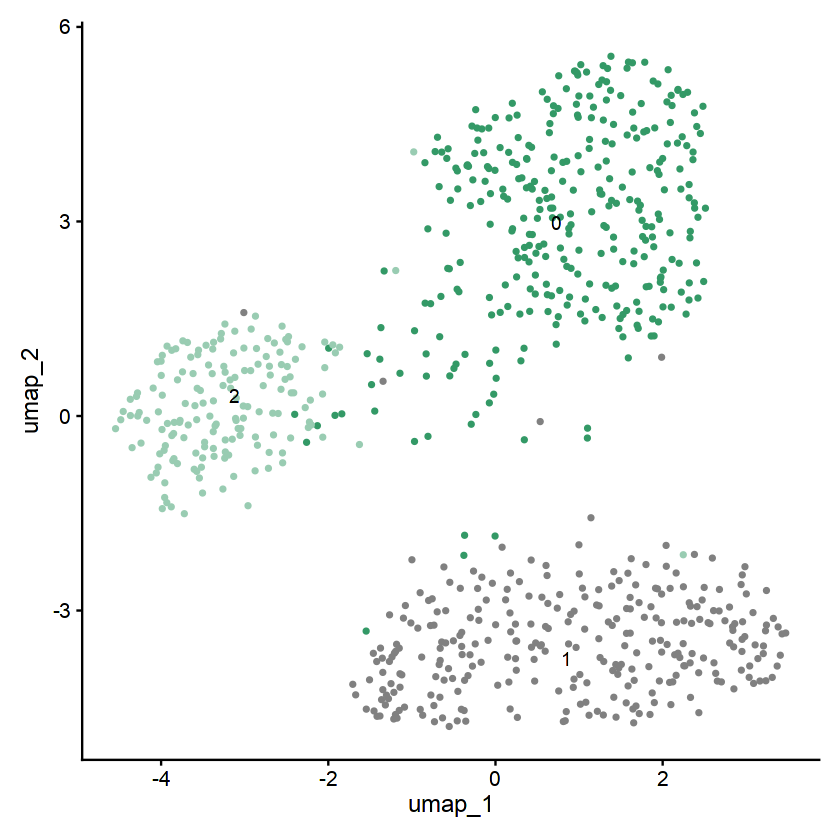

In [76]:

b4.3 <- DimPlot(bQ1.m15.clustered, reduction = "umap", label = TRUE, repel = TRUE, pt.size = 1) + 
  NoLegend() + 
  theme(aspect.ratio = 1) + 
  scale_color_manual(values = c("#339966", "#808080","#99CCB2"))
b4.3


In [81]:
differentially_expressed_genes(bQ1.m15.clustered)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



                     p_val avg_log2FC pct.1 pct.2    p_val_adj cluster
bs-ptsG       4.201281e-21   5.877779 0.195 0.004 1.887636e-17       0
bs-treP       8.025849e-13   5.398262 0.137 0.011 3.606014e-09       0
bs-ldsD       2.851099e-08   4.737238 0.079 0.004 1.280999e-04       0
bs-ldlJ       1.226900e-06   4.724377 0.058 0.002 5.512464e-03       0
bs-treA       1.222406e-07   4.651857 0.106 0.020 5.492268e-04       0
bs-rplK       1.033563e-22   4.605149 0.225 0.011 4.643801e-19       0
bs-rplA       3.596069e-13   4.384917 0.131 0.007 1.615714e-09       0
bs-yjdF       2.617872e-06   4.355816 0.055 0.002 1.176210e-02       0
bs-rpmD       1.364803e-07   4.307928 0.067 0.002 6.132058e-04       0
bs-ackA       3.106820e-07   3.986365 0.094 0.015 1.395894e-03       0
bs-rpmJ       1.058199e-06   3.933032 0.070 0.007 4.754490e-03       0
bs-rplU       7.050115e-20   3.932824 0.213 0.015 3.167617e-16       0
bs-bglH       1.790166e-09   3.926512 0.125 0.020 8.043214e-06       0
bs-rpl

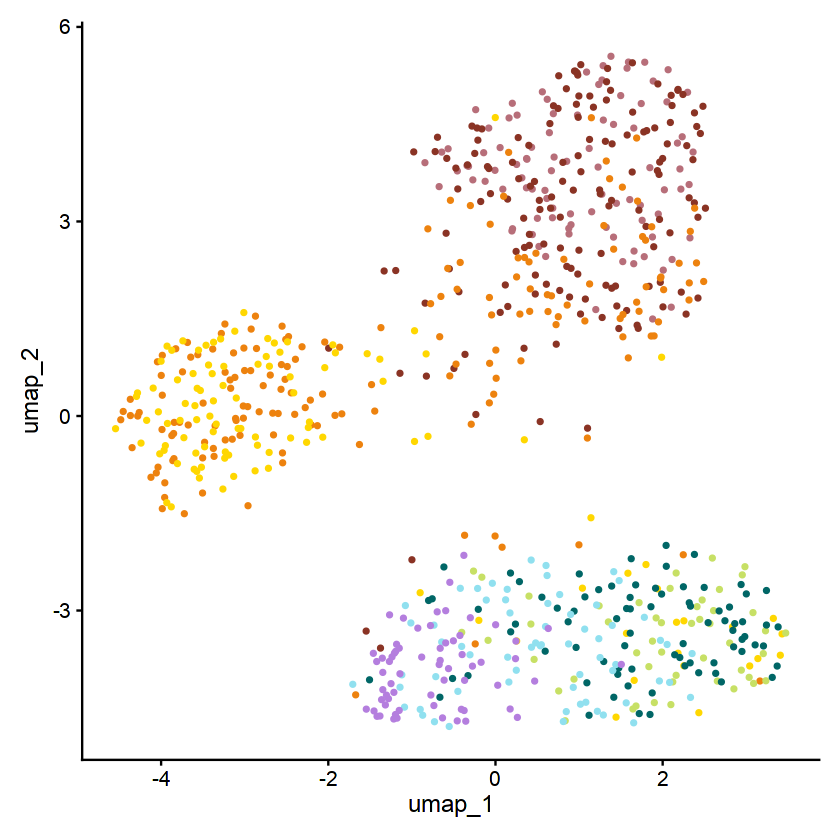

In [ ]:



b4.4 <-DimPlot(bQ1.m15.clustered, reduction = "umap", group.by = "cond", label = FALSE, repel = TRUE, pt.size = 1) + 
  NoLegend() + 
  theme(aspect.ratio = 1) + 
  scale_color_manual(values = c("#B76E79","#8A3324","#ED820E","#FFD700","#C7E065","#006666","#90E0EF","#B47EDE")) + 
  labs(title = NULL)
b4.4





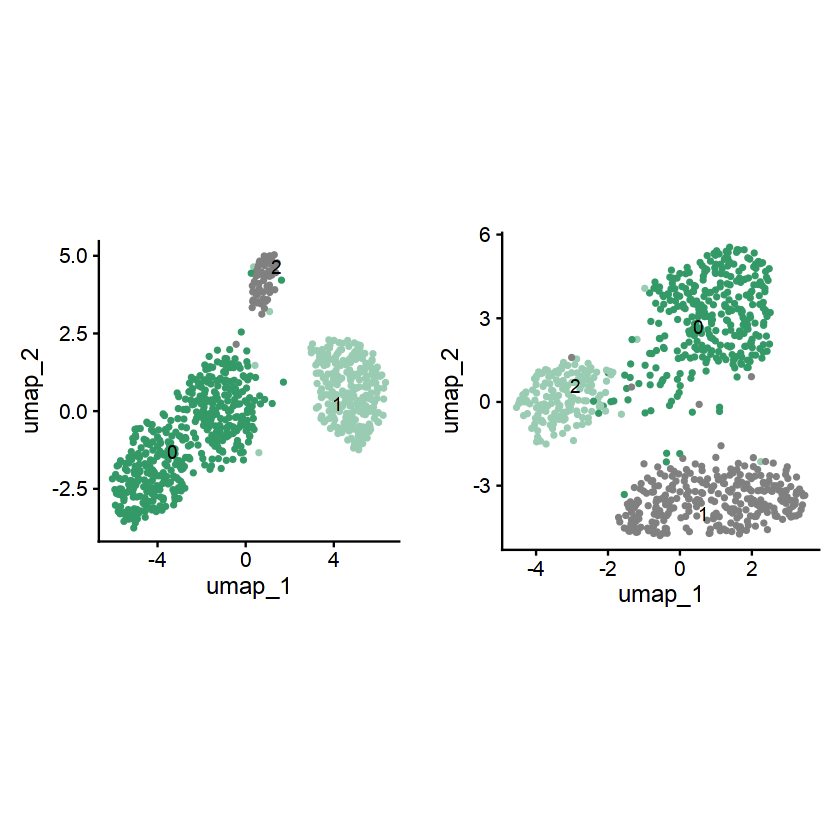

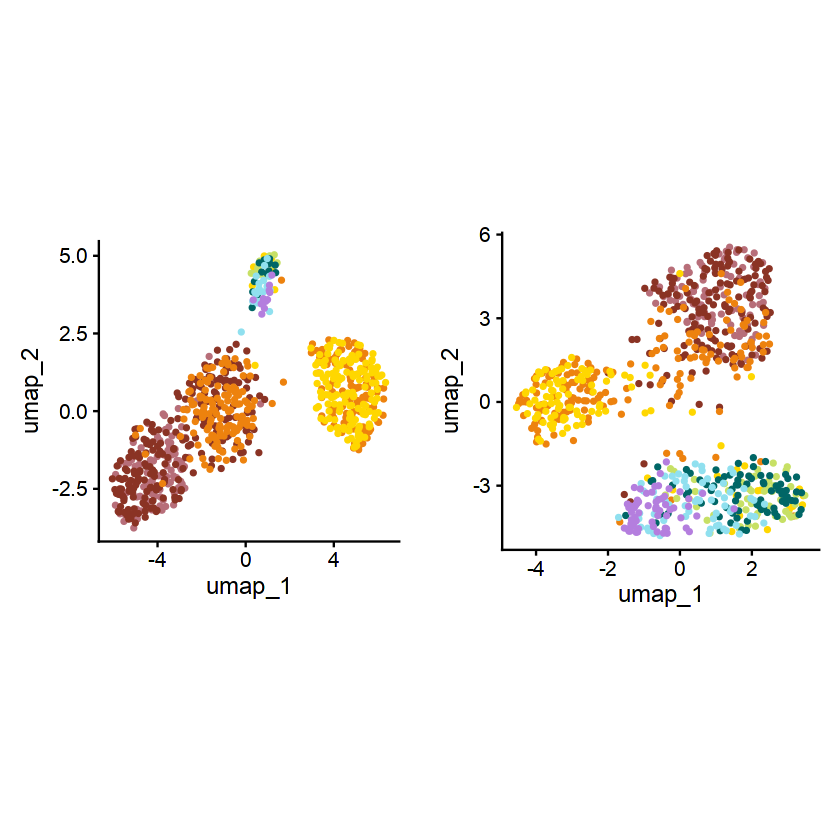

In [79]:

plot_grid(b4.1,b4.3)
plot_grid(b4.2,b4.4)


#--Figure 5---------------------------------------------------------------------

b5.1 <- ggplot(test, aes(x = GpH, y = mRNA.rRNA, fill = factor(GpH))) +
  stat_summary(fun = mean, geom = "point", size = 4, fill = "#8CA2CB", shape = 21) +
  geom_smooth(aes(fill = GpH), method = "lm", se = FALSE, color = "black") +
  ylab("mean rRNA counts/cell") +
  xlab("growth rate (generations/hour)") +
  scale_fill_manual(values = c("#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB")) +
  theme(
    panel.background = element_rect(fill = 'transparent'),
    plot.background = element_rect(fill = 'transparent', color = NA),
    axis.line = element_line(size = 0.5, color = "black"),
    aspect.ratio = 1,
    text = element_text(size=16),
    axis.title = element_blank()
  ) +
  NoLegend()
b5.1

b5.2 <- ggplot(test, aes(x = GpH, y = log10(mRNA), fill = factor(GpH))) +
  geom_jitter(aes(color = "#2c4470"), alpha = 0.5, size = 0.01) +
  geom_violin(trim = FALSE, alpha = 0.8) +
  stat_summary(fun = mean, geom = "point", size = 2) +
  geom_smooth(aes(fill = GpH), method = "lm", se = FALSE, color = "black") +
  ylab("log10(rRNA counts/cell)") +
  xlab("growth rate (generations/hour)") +
  scale_fill_manual(values = c("#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB")) +
  scale_color_manual(values = c("#2c4470")) +
  theme(
    panel.background = element_rect(fill = 'transparent'),
    plot.background = element_rect(fill = 'transparent', color = NA),
    axis.line = element_line(size = 0.5, color = "black"),
    aspect.ratio = 1,
    text = element_text(size=16),
    axis.title = element_blank()
  ) +
  scale_y_continuous(breaks = c(2,3,4,5),labels = c("100","1,000", "10,000", "100,000")) +
  NoLegend()
b5.2

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 20871
Number of edges: 696771

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9823
Number of communities: 4
Elapsed time: 4 seconds


16:09:40 UMAP embedding parameters a = 0.9922 b = 1.112

16:09:40 Read 20871 rows and found 10 numeric columns

16:09:40 Using Annoy for neighbor search, n_neighbors = 30

16:09:40 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:09:42 Writing NN index file to temp file /tmp/RtmpBQTVZM/file2ef4a73c62315

16:09:42 Searching Annoy index using 1 thread, search_k = 3000

16:09:50 Annoy recall = 100%

16:09:50 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

16:09:51 Initializing from normalized Laplacian + noise (using RSpectra)

16:09:52 Commencing optimization for 200 epochs, with 869762 positive edges

16:10:01 Optimization finished



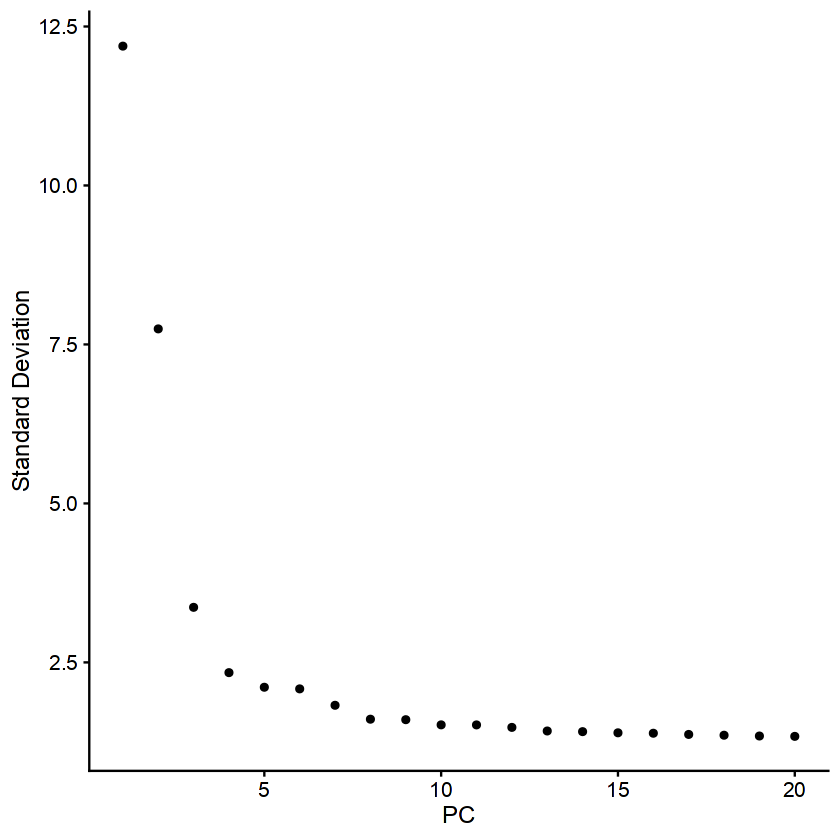

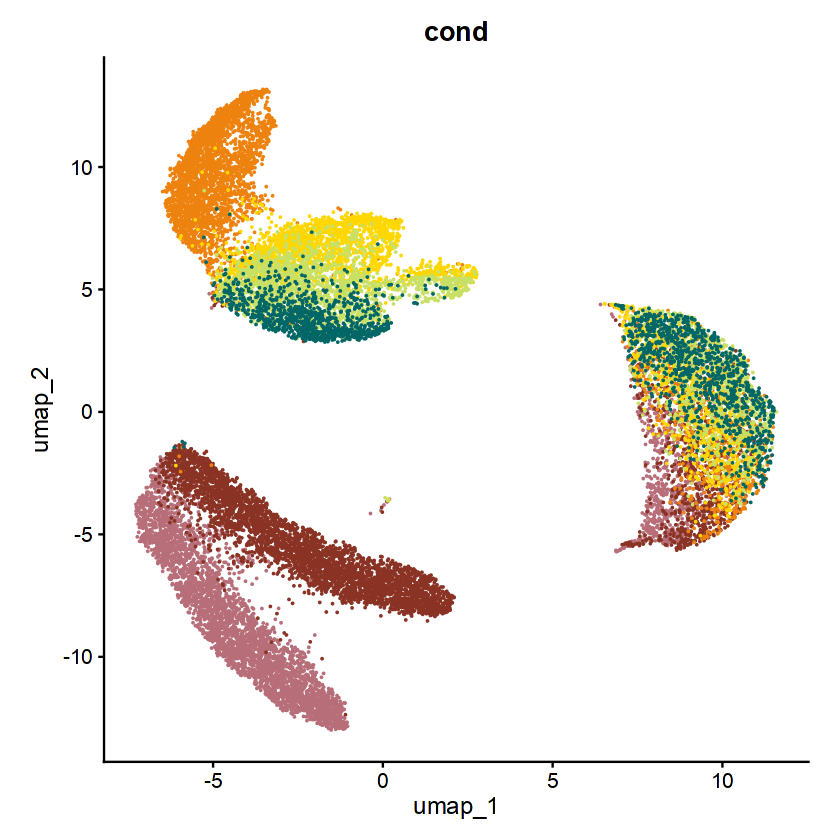

In [82]:

growcurvb.nr.m14.int <- scale_normalize_seurat_data(growcurvb.nr.m14, 3000, 20, NULL)
growcurvb.nr.m14.clust <- find_neighbors_clusters(growcurvb.nr.m14.int, 10, 0.05)
growcurvb.nr.m14.clust$mRNA.rRNA <- odRNAb.m14$mRNA.rRNA

b5.3 <- DimPlot(growcurvb.nr.m14.clust, reduction = "umap", group.by = "cond", label = FALSE, repel = TRUE, pt.size = 0.01) + 
  theme(aspect.ratio = 1) +
  scale_color_manual(values = c("#B76E79","#8A3324","#ED820E","#FFD700","#C7E065","#006666"))+ NoLegend()
b5.3


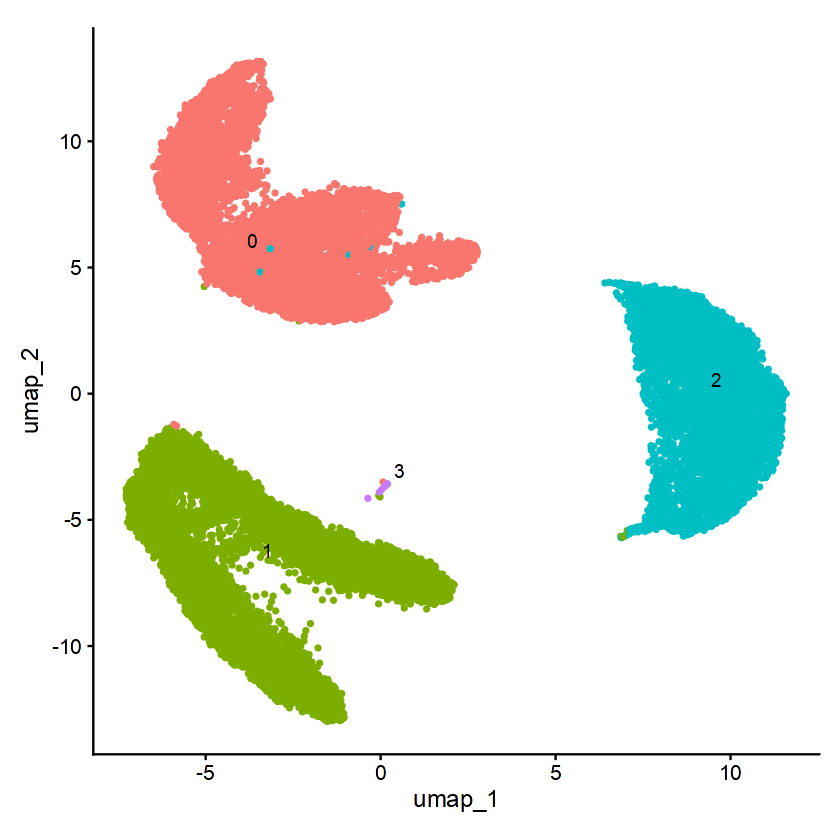

In [85]:
DimPlot(growcurvb.nr.m14.clust, reduction = "umap", label = TRUE, repel = TRUE, pt.size = 1) + 
  NoLegend() + 
  theme(aspect.ratio = 1)

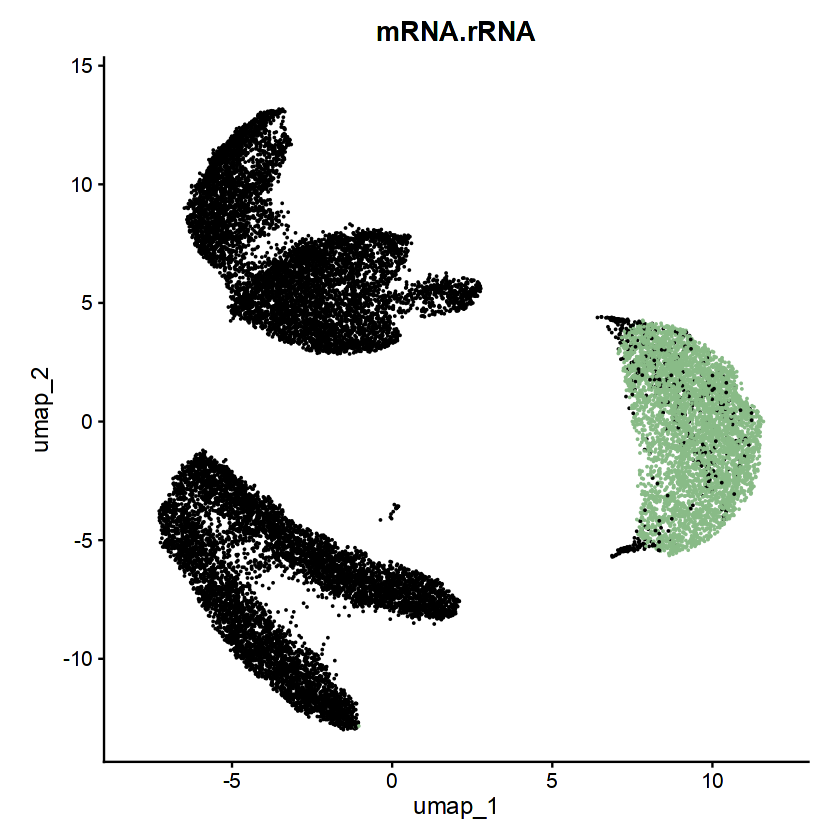

In [86]:
b5.4 <- FeaturePlot(growcurvb.nr.m14.clust, reduction = "umap", features = "mRNA.rRNA", cols = c("black","#8CA2CB", "#89BB87"), pt.size = 0.01)+ 
  theme(aspect.ratio = 1) + NoLegend()
b5.4

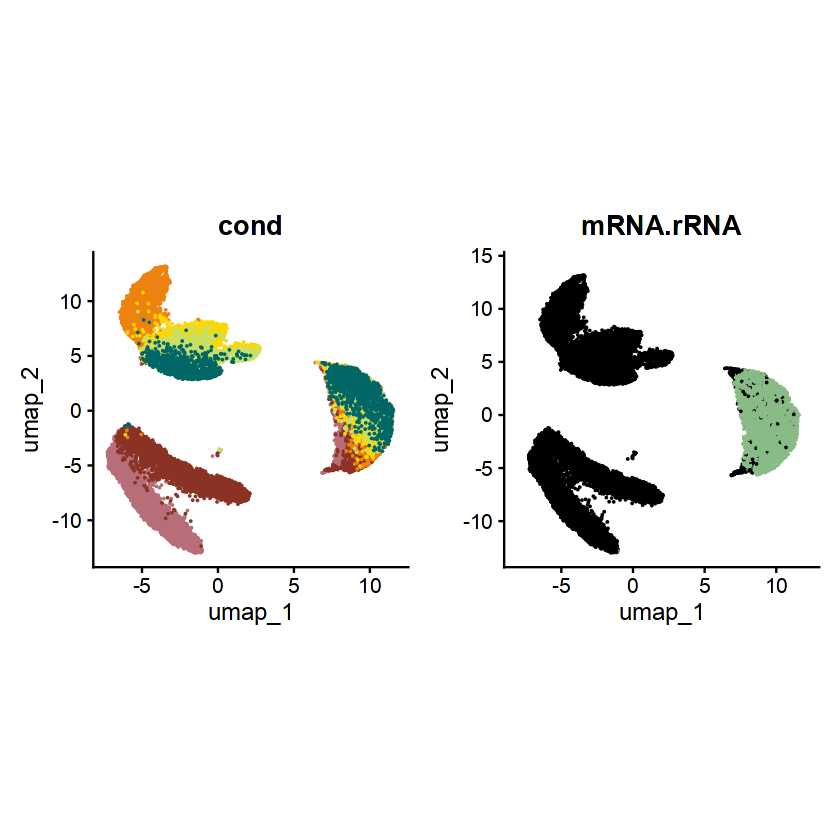

In [87]:
b5.3+b5.4

In [88]:
differentially_expressed_genes(growcurvb.nr.m14.clust)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3



                 p_val avg_log2FC pct.1 pct.2     p_val_adj cluster     gene
bs-acoA   0.000000e+00   6.595815 0.423 0.039  0.000000e+00       0  bs-acoA
bs-acoC   0.000000e+00   6.282888 0.404 0.059  0.000000e+00       0  bs-acoC
bs-gapB   0.000000e+00   6.215166 0.724 0.112  0.000000e+00       0  bs-gapB
bs-acoB   0.000000e+00   6.083086 0.367 0.057  0.000000e+00       0  bs-acoB
bs-sboA   3.348762e-74   5.844808 0.036 0.004  1.504599e-70       0  bs-sboA
bs-hpf    0.000000e+00   5.688488 0.226 0.025  0.000000e+00       0   bs-hpf
bs-sboX   8.835949e-37   5.428790 0.031 0.008  3.969992e-33       0  bs-sboX
bs-pckA   0.000000e+00   5.425043 0.280 0.059  0.000000e+00       0  bs-pckA
bs-licA   0.000000e+00   5.199400 0.279 0.064  0.000000e+00       0  bs-licA
bs-rgpA   9.432290e-08   5.115595 0.012 0.005  4.237928e-04       0  bs-rgpA
bs-licH   0.000000e+00   5.091766 0.365 0.099  0.000000e+00       0  bs-licH
bs-rapA  2.773621e-168   4.921781 0.121 0.028 1.246188e-164       0  bs-rapA

truc à faire demain :
voir ce qu'est nFeaturesRNA
fusionner les tableaux en un grand objet Anndata 
voir les doublons qui ont été supprimés 
convertir en objet seurat

In [34]:
AUTRe


ERROR: Error: object 'AUTRe' not found


# info sur les objets de type Anndata
https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html

# info sur l'utilisation de Scanpy 
https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html

In [ ]:
import pandas as pd
import scanpy as sc
import numpy as np
from scipy.sparse import csr_matrix

# Charger les fichiers CSV
barcodes = pd.read_csv("7_Article/data/GSE_extracted/GSM4594094_M11_barcodes.csv", header=None)[0]  # Liste des cellules
genes = pd.read_csv("7_Article/data/GSE_extracted/GSM4594094_M11_genes.csv", header=None)[0]  # Liste des gènes
dcm = pd.read_csv("7_Article/data/GSE_extracted/GSM4594094_M11_dcm.csv", header=None)  # Matrice d'expression (comptages)

# Vérifier les dimensions
print(f"Barcodes: {len(barcodes)}, Genes: {len(genes)}, DCM shape: {dcm.shape}")

In [ ]:
# Conversion en matrice sparse pour économiser de la mémoire
X = csr_matrix(dcm.values)  # Convertir en format sparse si les données sont volumineuses

# Création de l'objet AnnData
adata = sc.AnnData(X=X)

# Ajouter les noms des cellules et des gènes
adata.obs_names = barcodes  # Identifiants des cellules
adata.var_names = genes  # Identifiants des gènes

# Vérifier l'objet créé
print(adata)

In [ ]:
adata

In [ ]:
import os
#print(os.getcwd())  # Affiche le répertoire de travail actuel
os.makedirs("7_Article/results", exist_ok=True)  # Crée le dossier s'il n'existe pas
adata.write("7_Article/results/data.h5ad")  # Sauvegarde dans le dossier "results"
print(os.path.exists("7_Article/results/data.h5ad"))  # True si le fichier est bien enregistré

In [ ]:
# Charger les données
adata = sc.read("7_Article/results/data.h5ad")
# Afficher les dimensions
print(adata)  # Affiche les dimensions de la matrice d'expression

In [ ]:
# Afficher les 5 premières cellules et les 5 premiers gènes
print(adata[:5, :5].to_df())


Qualité et filtrage 

In [ ]:
# Nombre total de gènes et d'UMI par cellule
adata.var["mt"] = adata.var_names.str.startswith("MT-")  # Marquer les gènes mitochondriaux

#voir ceux qui sont des gènes mitochondriaux et ceux qui ne le sont pas : faaire le compte
adata.var["mt"]

# voir ceux true et ceux false
adata.var["mt"].value_counts()



In [ ]:
adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)  # Nombre de gènes détectés par cellule
print(adata.obs["n_genes"])


In [ ]:
adata.obs["n_counts"] = adata.X.sum(axis=1)  # Nombre total d'UMI par cellule
print(adata.obs["n_counts"])

In [ ]:
adata.obs["percent_mito"] = (np.array(adata[:, adata.var["mt"].values].X.sum(axis=1)).flatten() / adata.obs["n_counts"]) * 100

sc.pl.violin(adata, ["n_genes", "n_counts", "percent_mito"], jitter=0.4, multi_panel=True)

In [ ]:
sc.pp.filter_cells(adata, min_genes=200)  # Garde cellules avec au moins 200 gènes
sc.pp.filter_genes(adata, min_cells=3)  # Garde gènes exprimés dans au moins 3 cellules

Normalisation et Transformation

In [ ]:
#Normaliser les valeurs d’expression (ex: TPM-like transformation)
sc.pp.normalize_total(adata, target_sum=1e4)  # Normalisation par le total d'UMIs par cellule
sc.pp.log1p(adata)  # Transformation log

In [ ]:
#Identifier les gènes les plus variables :
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

 Réduction de Dimensionnalité

In [ ]:
# PCA pour réduire la dimensionnalité
sc.pp.pca(adata, n_comps=50)
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
#UMAP ou t-SNE pour visualisation :
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["n_counts", "percent_mito"]) 
# Coloration par expression  
# ncount correspond au nombre d'UMI par cellule
# il n'y a pas de gene mitochonrial donc pas de coloration

Clustering des Cellules

In [ ]:
# calcul du clustering (Louvain ou Leiden)
sc.tl.leiden(adata, resolution=0.5)  # Modifier la résolution si besoin
sc.pl.umap(adata, color=["leiden"])  # Visualisation du clustering

In [ ]:
#Identifier les marqueurs de chaque cluster :
sc.tl.rank_genes_groups(adata, "leiden", method="t-test")  # Test statistique
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)  # Visualisation

In [ ]:
adata.write("7_Article/results/processed_data.h5ad")  # Sauvegarde l'objet AnnData

adata.obs.to_csv("7_Article/results/metadata.csv")  # Sauvegarde les métadonnées
adata.to_df().to_csv("7_Article/results/expression_matrix.csv")  # Sauvegarde la matrice d'expression